## Processing with aboveground biomass data based on my fieldworks and other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["Stem_bark_t_ha", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Stem_bark_t_ha                                                    \
                    count       mean        std  min     25%    50%     75%   
Species_ID                                                                    
0                   371.0   7.894070   4.128113  0.3   4.900   7.70  10.350   
1                     7.0  34.728571  23.382095  8.3  13.950  35.70  52.750   
2                   120.0  11.320000   7.552123  0.8   6.375   9.45  15.250   
3                   115.0  15.307826   8.294197  2.1   7.950  15.30  21.450   
4                    66.0  11.296970   6.528234  1.6   6.500   9.25  16.575   
5                    68.0  29.010294  12.702287  2.5  18.400  29.70  39.675   

                 ALL_STEM_t_ha                                              \
             max         count        mean        std   min     25%    50%   
Species_ID                                                                   
0           23.2         457.0   97.049891  61.854506   1.8  47.500   92.7   
1           65.7           7.0  123.814286  61.879895  46.3  70.650  133.9   
2           38.8         120.0   74.495000  44.523333   5.1  37.275   68.1   
3           41.1         115.0  107.607826  55.589186  11.0  62.700  106.8   
4           28.7          66.0   84.946970  58.875162   8.2  40.750   61.2   
5           48.8          90.0  173.065556  99.100647   5.0  93.075  161.3   

                            
                75%    max  
Species_ID                  
0           135.900  310.7  
1           174.550  196.1  
2           103.075  193.5  
3           145.450  251.6  
4           125.000  245.4  
5           253.375  363.9

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "Stem_bark_t_ha"
indep_variables = ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     Species_ID  Origin_ID   H_m  DBH_cm  BA_sq_m_ha  GS_cub_m  ALL_STEM_t_ha  \
10            5        0.0  18.2    19.6        18.3     159.0          101.8   
11            1        0.0   8.8     5.2        15.5     105.0           46.3   
12            1        0.0  10.2     6.7        16.2     122.0           54.1   
13            1        0.0  14.1    10.0        19.9     194.0           87.2   
14            1        0.0  19.4    15.9        26.8     299.0          133.9   
..          ...        ...   ...     ...         ...       ...            ...   
852           3        0.0   7.8     4.4         9.2      39.8           17.8   
853           3        0.0  12.7     9.0        20.5     123.6           47.1   
854           3        0.0  12.2     8.1        20.3     141.7           51.9   
855           2        0.0  14.3    12.4        25.1     176.5          100.7   
856           2        0.0  21.1    25.6        21.0     191.6           99.9   

     Stem_wood_t_ha  Stem_b

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
10,5,0.0,18.2,19.6,18.3
11,1,0.0,8.8,5.2,15.5
12,1,0.0,10.2,6.7,16.2
13,1,0.0,14.1,10.0,19.9
14,1,0.0,19.4,15.9,26.8


In [11]:
# Columns in "y" data collections
y.head()

,Stem_bark_t_ha
10,16.4
11,8.3
12,9.1
13,18.8
14,35.7


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.8918944519135216, 0.834512659748259, 0.8783374312194229]
    Mean: 0.868
    Std: 0.024

 --------------------
Root-mean-square error (RMSE): 

    Scores: [3.74716684 3.44502502 3.26565012]
    Mean: 3.486
    Std: 0.199

 --------------------
Mean absolute error (MAE): 

    Scores: [2.277107512855147, 2.2106343861085826, 2.040357042627641]
    Mean: 2.176
    Std: 0.100

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.6618637554923994                 # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.17264037949538136                # gamma
print('Gamma: ' + str(p2))

p3 = 0.24268238044305301                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 3            # max_depth
print('Max_depth: ' + str(p4))

p5 = 76         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.6733615714796921                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.6618637554923994
Gamma: 0.17264037949538136
Learning_rate: 0.24268238044305301
Max_depth: 3
N_estimators: 76
Subsample: 0.6733615714796921


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:12.42307	validation_1-rmse:9.69618
[1]	validation_0-rmse:10.07378	validation_1-rmse:7.59365
[2]	validation_0-rmse:8.26368	validation_1-rmse:6.07041
[3]	validation_0-rmse:7.01391	validation_1-rmse:5.03221
[4]	validation_0-rmse:6.07968	validation_1-rmse:4.14944
[5]	validation_0-rmse:5.31671	validation_1-rmse:3.64073
[6]	validation_0-rmse:4.72984	validation_1-rmse:3.24319


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:4.34634	validation_1-rmse:2.99128
[8]	validation_0-rmse:4.03565	validation_1-rmse:2.81517
[9]	validation_0-rmse:3.87774	validation_1-rmse:2.75402
[10]	validation_0-rmse:3.70521	validation_1-rmse:2.71268
[11]	validation_0-rmse:3.56991	validation_1-rmse:2.64753
[12]	validation_0-rmse:3.48585	validation_1-rmse:2.59171
[13]	validation_0-rmse:3.36987	validation_1-rmse:2.56922
[14]	validation_0-rmse:3.32723	validation_1-rmse:2.55654
[15]	validation_0-rmse:3.27275	validation_1-rmse:2.53354
[16]	validation_0-rmse:3.25704	validation_1-rmse:2.53113
[17]	validation_0-rmse:3.21742	validation_1-rmse:2.53700
[18]	validation_0-rmse:3.13428	validation_1-rmse:2.54937
[19]	validation_0-rmse:3.12237	validation_1-rmse:2.54049
[20]	validation_0-rmse:3.09153	validation_1-rmse:2.53804
[21]	validation_0-rmse:3.05897	validation_1-rmse:2.53088
[22]	validation_0-rmse:3.03414	validation_1-rmse:2.52381
[23]	validation_0-rmse:3.02103	validation_1-rmse:2.52343
[24]	validation_0-rmse:2.97676	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.78981	validation_1-rmse:12.81842
[1]	validation_0-rmse:9.38663	validation_1-rmse:10.67648


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.70571	validation_1-rmse:9.23588
[3]	validation_0-rmse:6.44487	validation_1-rmse:8.08232
[4]	validation_0-rmse:5.48530	validation_1-rmse:7.18136
[5]	validation_0-rmse:4.80930	validation_1-rmse:6.54225
[6]	validation_0-rmse:4.33088	validation_1-rmse:6.17567
[7]	validation_0-rmse:3.97778	validation_1-rmse:5.83857
[8]	validation_0-rmse:3.79716	validation_1-rmse:5.48258
[9]	validation_0-rmse:3.62987	validation_1-rmse:5.29839
[10]	validation_0-rmse:3.53389	validation_1-rmse:5.19911
[11]	validation_0-rmse:3.42267	validation_1-rmse:5.04752
[12]	validation_0-rmse:3.36509	validation_1-rmse:5.01189
[13]	validation_0-rmse:3.29015	validation_1-rmse:4.94481
[14]	validation_0-rmse:3.24467	validation_1-rmse:4.88459
[15]	validation_0-rmse:3.19093	validation_1-rmse:4.79315
[16]	validation_0-rmse:3.15967	validation_1-rmse:4.76983
[17]	validation_0-rmse:3.09817	validation_1-rmse:4.68875
[18]	validation_0-rmse:3.04016	validation_1-rmse:4.64988
[19]	validation_0-rmse:3.02041	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.43374	validation_1-rmse:9.71247
[1]	validation_0-rmse:10.05685	validation_1-rmse:7.79793
[2]	validation_0-rmse:8.23591	validation_1-rmse:6.34306
[3]	validation_0-rmse:6.87542	validation_1-rmse:5.46781
[4]	validation_0-rmse:5.80857	validation_1-rmse:4.83587
[5]	validation_0-rmse:5.16322	validation_1-rmse:4.43091
[6]	validation_0-rmse:4.54708	validation_1-rmse:4.18295
[7]	validation_0-rmse:4.15057	validation_1-rmse:4.08106
[8]	validation_0-rmse:3.81258	validation_1-rmse:3.92464
[9]	validation_0-rmse:3.65334	validation_1-rmse:3.88655
[10]	validation_0-rmse:3.53336	validation_1-rmse:3.84943
[11]	validation_0-rmse:3.39574	validation_1-rmse:3.81408
[12]	validation_0-rmse:3.31107	validation_1-rmse:3.80975


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:3.25270	validation_1-rmse:3.78988
[14]	validation_0-rmse:3.18441	validation_1-rmse:3.74635
[15]	validation_0-rmse:3.05782	validation_1-rmse:3.68589
[16]	validation_0-rmse:3.01010	validation_1-rmse:3.67178
[17]	validation_0-rmse:2.94534	validation_1-rmse:3.62841
[18]	validation_0-rmse:2.89340	validation_1-rmse:3.61132
[19]	validation_0-rmse:2.86049	validation_1-rmse:3.62595
[20]	validation_0-rmse:2.78138	validation_1-rmse:3.59877
[21]	validation_0-rmse:2.74332	validation_1-rmse:3.56963
[22]	validation_0-rmse:2.71757	validation_1-rmse:3.55738
[23]	validation_0-rmse:2.69306	validation_1-rmse:3.55474
[24]	validation_0-rmse:2.66652	validation_1-rmse:3.55787
[25]	validation_0-rmse:2.62678	validation_1-rmse:3.54025
[26]	validation_0-rmse:2.59447	validation_1-rmse:3.52104
[27]	validation_0-rmse:2.55965	validation_1-rmse:3.50392
[28]	validation_0-rmse:2.53697	validation_1-rmse:3.56607
[29]	validation_0-rmse:2.51330	validation_1-rmse:3.56140
[30]	validation_0-rmse:2.47706	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.06017	validation_1-rmse:11.70739
[1]	validation_0-rmse:9.67847	validation_1-rmse:9.07495
[2]	validation_0-rmse:8.00047	validation_1-rmse:7.32549
[3]	validation_0-rmse:6.85151	validation_1-rmse:5.99616
[4]	validation_0-rmse:5.82214	validation_1-rmse:4.78973
[5]	validation_0-rmse:5.28943	validation_1-rmse:4.21925
[6]	validation_0-rmse:4.66304	validation_1-rmse:3.78876
[7]	validation_0-rmse:4.33304	validation_1-rmse:3.43588


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:4.02494	validation_1-rmse:3.21479
[9]	validation_0-rmse:3.82810	validation_1-rmse:3.15607
[10]	validation_0-rmse:3.60548	validation_1-rmse:3.10760
[11]	validation_0-rmse:3.47289	validation_1-rmse:2.98649
[12]	validation_0-rmse:3.40482	validation_1-rmse:2.94003
[13]	validation_0-rmse:3.23452	validation_1-rmse:2.92141
[14]	validation_0-rmse:3.15044	validation_1-rmse:2.92070
[15]	validation_0-rmse:3.09591	validation_1-rmse:2.88550
[16]	validation_0-rmse:3.06909	validation_1-rmse:2.90172
[17]	validation_0-rmse:3.03223	validation_1-rmse:2.87946
[18]	validation_0-rmse:3.00496	validation_1-rmse:2.87331
[19]	validation_0-rmse:2.97233	validation_1-rmse:2.88492
[20]	validation_0-rmse:2.93569	validation_1-rmse:2.90974
[21]	validation_0-rmse:2.87158	validation_1-rmse:2.88491
[22]	validation_0-rmse:2.83512	validation_1-rmse:2.89151
[23]	validation_0-rmse:2.81657	validation_1-rmse:2.88532
[24]	validation_0-rmse:2.79325	validation_1-rmse:2.85131
[25]	validation_0-rmse:2.70381	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.84021	validation_1-rmse:12.54725
[1]	validation_0-rmse:9.52625	validation_1-rmse:10.33684
[2]	validation_0-rmse:7.81443	validation_1-rmse:8.29281
[3]	validation_0-rmse:6.62602	validation_1-rmse:7.19168
[4]	validation_0-rmse:5.64537	validation_1-rmse:6.15093
[5]	validation_0-rmse:5.10821	validation_1-rmse:5.63243


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:4.52499	validation_1-rmse:5.04984
[7]	validation_0-rmse:4.11783	validation_1-rmse:4.58886
[8]	validation_0-rmse:3.81276	validation_1-rmse:4.17451
[9]	validation_0-rmse:3.63985	validation_1-rmse:4.06220
[10]	validation_0-rmse:3.49323	validation_1-rmse:3.94238
[11]	validation_0-rmse:3.39973	validation_1-rmse:3.81808
[12]	validation_0-rmse:3.30439	validation_1-rmse:3.74355
[13]	validation_0-rmse:3.14266	validation_1-rmse:3.54876
[14]	validation_0-rmse:3.08779	validation_1-rmse:3.47655
[15]	validation_0-rmse:3.02063	validation_1-rmse:3.44035
[16]	validation_0-rmse:2.99925	validation_1-rmse:3.42830
[17]	validation_0-rmse:2.96782	validation_1-rmse:3.45599
[18]	validation_0-rmse:2.89607	validation_1-rmse:3.38487
[19]	validation_0-rmse:2.87553	validation_1-rmse:3.36809
[20]	validation_0-rmse:2.84735	validation_1-rmse:3.35823
[21]	validation_0-rmse:2.82422	validation_1-rmse:3.35759
[22]	validation_0-rmse:2.78188	validation_1-rmse:3.31301
[23]	validation_0-rmse:2.74426	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.74958	validation_1-rmse:13.02125
[1]	validation_0-rmse:9.58694	validation_1-rmse:10.74994
[2]	validation_0-rmse:7.81109	validation_1-rmse:8.83696
[3]	validation_0-rmse:6.71733	validation_1-rmse:7.69391
[4]	validation_0-rmse:5.69135	validation_1-rmse:6.52993
[5]	validation_0-rmse:5.09961	validation_1-rmse:5.96667
[6]	validation_0-rmse:4.54143	validation_1-rmse:5.31858
[7]	validation_0-rmse:4.17235	validation_1-rmse:4.94642
[8]	validation_0-rmse:3.84427	validation_1-rmse:4.57173
[9]	validation_0-rmse:3.69699	validation_1-rmse:4.44825
[10]	validation_0-rmse:3.56259	validation_1-rmse:4.32518
[11]	validation_0-rmse:3.45827	validation_1-rmse:4.19912
[12]	validation_0-rmse:3.35520	validation_1-rmse:4.14843
[13]	validation_0-rmse:3.20547	validation_1-rmse:4.10343
[14]	validation_0-rmse:3.17315	validation_1-rmse:4.04752
[15]	validation_0-rmse:3.12881	validation_1-rmse:4.01115
[16]	validation_0-rmse:3.09875	validation_1-rmse:3.94220
[17]	validation_0-rmse:3.04613	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.35881	validation_1-rmse:10.05992


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:10.01994	validation_1-rmse:7.91074
[2]	validation_0-rmse:8.14304	validation_1-rmse:6.49436
[3]	validation_0-rmse:6.86135	validation_1-rmse:5.47902
[4]	validation_0-rmse:5.82445	validation_1-rmse:4.66782
[5]	validation_0-rmse:5.12755	validation_1-rmse:4.31403
[6]	validation_0-rmse:4.56865	validation_1-rmse:4.02241
[7]	validation_0-rmse:4.16071	validation_1-rmse:3.78780
[8]	validation_0-rmse:3.90064	validation_1-rmse:3.68333
[9]	validation_0-rmse:3.72191	validation_1-rmse:3.66607
[10]	validation_0-rmse:3.63321	validation_1-rmse:3.72185
[11]	validation_0-rmse:3.49850	validation_1-rmse:3.71090
[12]	validation_0-rmse:3.39579	validation_1-rmse:3.66713
[13]	validation_0-rmse:3.22525	validation_1-rmse:3.56982
[14]	validation_0-rmse:3.17639	validation_1-rmse:3.55739
[15]	validation_0-rmse:3.06049	validation_1-rmse:3.55503
[16]	validation_0-rmse:3.03566	validation_1-rmse:3.54897
[17]	validation_0-rmse:2.99978	validation_1-rmse:3.56605
[18]	validation_0-rmse:2.95552	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.88627	validation_1-rmse:12.56619
[1]	validation_0-rmse:9.62077	validation_1-rmse:10.17765
[2]	validation_0-rmse:8.05244	validation_1-rmse:8.41714
[3]	validation_0-rmse:6.86331	validation_1-rmse:7.12612
[4]	validation_0-rmse:5.91903	validation_1-rmse:6.16033


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:5.20333	validation_1-rmse:5.35513
[6]	validation_0-rmse:4.67307	validation_1-rmse:4.91822
[7]	validation_0-rmse:4.29224	validation_1-rmse:4.48817
[8]	validation_0-rmse:3.90333	validation_1-rmse:4.24730
[9]	validation_0-rmse:3.73825	validation_1-rmse:4.09455
[10]	validation_0-rmse:3.54338	validation_1-rmse:3.88096
[11]	validation_0-rmse:3.36543	validation_1-rmse:3.80656
[12]	validation_0-rmse:3.27793	validation_1-rmse:3.72397
[13]	validation_0-rmse:3.20693	validation_1-rmse:3.68178
[14]	validation_0-rmse:3.17113	validation_1-rmse:3.64015
[15]	validation_0-rmse:3.09481	validation_1-rmse:3.57056
[16]	validation_0-rmse:3.08026	validation_1-rmse:3.58488
[17]	validation_0-rmse:3.04139	validation_1-rmse:3.55644
[18]	validation_0-rmse:3.01018	validation_1-rmse:3.56284
[19]	validation_0-rmse:2.98440	validation_1-rmse:3.55290
[20]	validation_0-rmse:2.96291	validation_1-rmse:3.55357
[21]	validation_0-rmse:2.89657	validation_1-rmse:3.58157
[22]	validation_0-rmse:2.85273	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:11.88759	validation_1-rmse:12.50163
[1]	validation_0-rmse:9.49403	validation_1-rmse:10.32067
[2]	validation_0-rmse:7.62694	validation_1-rmse:8.67148


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.40894	validation_1-rmse:7.71339
[4]	validation_0-rmse:5.43289	validation_1-rmse:6.93701
[5]	validation_0-rmse:4.74587	validation_1-rmse:6.46485
[6]	validation_0-rmse:4.21273	validation_1-rmse:6.04993
[7]	validation_0-rmse:3.84752	validation_1-rmse:5.80418
[8]	validation_0-rmse:3.59146	validation_1-rmse:5.58655
[9]	validation_0-rmse:3.41518	validation_1-rmse:5.54691
[10]	validation_0-rmse:3.29673	validation_1-rmse:5.28566
[11]	validation_0-rmse:3.19410	validation_1-rmse:5.23419
[12]	validation_0-rmse:3.09351	validation_1-rmse:5.17785
[13]	validation_0-rmse:3.02803	validation_1-rmse:5.12309
[14]	validation_0-rmse:2.98547	validation_1-rmse:5.10971
[15]	validation_0-rmse:2.96087	validation_1-rmse:5.11651
[16]	validation_0-rmse:2.92297	validation_1-rmse:5.09139
[17]	validation_0-rmse:2.82152	validation_1-rmse:4.89111
[18]	validation_0-rmse:2.78983	validation_1-rmse:4.88033
[19]	validation_0-rmse:2.77296	validation_1-rmse:4.85906
[20]	validation_0-rmse:2.70285	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:11.76130	validation_1-rmse:13.15841
[1]	validation_0-rmse:9.55618	validation_1-rmse:10.85434
[2]	validation_0-rmse:7.80077	validation_1-rmse:9.22143


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.54512	validation_1-rmse:8.01990
[4]	validation_0-rmse:5.53857	validation_1-rmse:7.12982
[5]	validation_0-rmse:4.93504	validation_1-rmse:6.57844
[6]	validation_0-rmse:4.37834	validation_1-rmse:5.76343
[7]	validation_0-rmse:4.00572	validation_1-rmse:5.40881
[8]	validation_0-rmse:3.74561	validation_1-rmse:5.24436
[9]	validation_0-rmse:3.59974	validation_1-rmse:5.17127
[10]	validation_0-rmse:3.50326	validation_1-rmse:5.07530
[11]	validation_0-rmse:3.35857	validation_1-rmse:4.94389
[12]	validation_0-rmse:3.30943	validation_1-rmse:4.91026
[13]	validation_0-rmse:3.20615	validation_1-rmse:4.89531
[14]	validation_0-rmse:3.17072	validation_1-rmse:4.89275
[15]	validation_0-rmse:3.09017	validation_1-rmse:4.63090
[16]	validation_0-rmse:3.01156	validation_1-rmse:4.63400
[17]	validation_0-rmse:2.93338	validation_1-rmse:4.36969
[18]	validation_0-rmse:2.90922	validation_1-rmse:4.38215
[19]	validation_0-rmse:2.88297	validation_1-rmse:4.39461
[20]	validation_0-rmse:2.84559	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.93755	validation_1-rmse:12.04594


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.61883	validation_1-rmse:10.00365
[2]	validation_0-rmse:7.97898	validation_1-rmse:8.61958
[3]	validation_0-rmse:6.70344	validation_1-rmse:7.48813
[4]	validation_0-rmse:5.70459	validation_1-rmse:6.69191
[5]	validation_0-rmse:5.03192	validation_1-rmse:6.29158
[6]	validation_0-rmse:4.49473	validation_1-rmse:5.89676
[7]	validation_0-rmse:4.10859	validation_1-rmse:5.51297
[8]	validation_0-rmse:3.82543	validation_1-rmse:5.33659
[9]	validation_0-rmse:3.69157	validation_1-rmse:5.24995
[10]	validation_0-rmse:3.56344	validation_1-rmse:5.17165
[11]	validation_0-rmse:3.40657	validation_1-rmse:5.01210
[12]	validation_0-rmse:3.33355	validation_1-rmse:4.95780
[13]	validation_0-rmse:3.22552	validation_1-rmse:4.83661
[14]	validation_0-rmse:3.15707	validation_1-rmse:4.81607
[15]	validation_0-rmse:3.10449	validation_1-rmse:4.79237
[16]	validation_0-rmse:3.07426	validation_1-rmse:4.77807
[17]	validation_0-rmse:2.99552	validation_1-rmse:4.73012
[18]	validation_0-rmse:2.95682	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.95380	validation_1-rmse:12.21897
[1]	validation_0-rmse:9.64768	validation_1-rmse:9.72362
[2]	validation_0-rmse:7.99792	validation_1-rmse:8.08111
[3]	validation_0-rmse:6.78449	validation_1-rmse:6.90561
[4]	validation_0-rmse:5.81526	validation_1-rmse:5.79274
[5]	validation_0-rmse:5.10231	validation_1-rmse:5.07042
[6]	validation_0-rmse:4.52598	validation_1-rmse:4.67428
[7]	validation_0-rmse:4.18572	validation_1-rmse:4.32642
[8]	validation_0-rmse:3.91112	validation_1-rmse:4.09458
[9]	validation_0-rmse:3.73594	validation_1-rmse:3.98538
[10]	validation_0-rmse:3.64289	validation_1-rmse:3.88914
[11]	validation_0-rmse:3.53699	validation_1-rmse:3.80595
[12]	validation_0-rmse:3.48408	validation_1-rmse:3.74139
[13]	validation_0-rmse:3.42174	validation_1-rmse:3.70221
[14]	validation_0-rmse:3.36737	validation_1-rmse:3.69074
[15]	validation_0-rmse:3.30795	validation_1-rmse:3.67157
[16]	validation_0-rmse:3.26761	validation_1-rmse:3.63792
[17]	validation_0-rmse:3.22405	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.13310	validation_1-rmse:11.59420
[1]	validation_0-rmse:9.68322	validation_1-rmse:9.33325
[2]	validation_0-rmse:7.85632	validation_1-rmse:7.57374


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.69117	validation_1-rmse:6.40313
[4]	validation_0-rmse:5.83047	validation_1-rmse:5.55068
[5]	validation_0-rmse:5.18495	validation_1-rmse:4.98779
[6]	validation_0-rmse:4.58847	validation_1-rmse:4.57060
[7]	validation_0-rmse:4.22619	validation_1-rmse:4.22382
[8]	validation_0-rmse:3.91599	validation_1-rmse:3.96162
[9]	validation_0-rmse:3.73078	validation_1-rmse:3.85663
[10]	validation_0-rmse:3.52597	validation_1-rmse:3.64891
[11]	validation_0-rmse:3.38021	validation_1-rmse:3.63980
[12]	validation_0-rmse:3.26104	validation_1-rmse:3.65025
[13]	validation_0-rmse:3.20199	validation_1-rmse:3.60817
[14]	validation_0-rmse:3.12504	validation_1-rmse:3.58810
[15]	validation_0-rmse:3.08392	validation_1-rmse:3.51045
[16]	validation_0-rmse:3.05833	validation_1-rmse:3.48851
[17]	validation_0-rmse:3.01791	validation_1-rmse:3.47995
[18]	validation_0-rmse:2.99153	validation_1-rmse:3.42433
[19]	validation_0-rmse:2.96548	validation_1-rmse:3.42803
[20]	validation_0-rmse:2.95752	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.33207	validation_1-rmse:10.56831


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.86988	validation_1-rmse:8.43096
[2]	validation_0-rmse:7.99917	validation_1-rmse:6.81006
[3]	validation_0-rmse:6.77096	validation_1-rmse:5.85095
[4]	validation_0-rmse:5.71560	validation_1-rmse:5.08972
[5]	validation_0-rmse:5.03895	validation_1-rmse:4.55947
[6]	validation_0-rmse:4.49508	validation_1-rmse:4.26422
[7]	validation_0-rmse:4.12496	validation_1-rmse:4.03889
[8]	validation_0-rmse:3.84388	validation_1-rmse:3.87828
[9]	validation_0-rmse:3.68183	validation_1-rmse:3.80553
[10]	validation_0-rmse:3.50376	validation_1-rmse:3.78092
[11]	validation_0-rmse:3.37560	validation_1-rmse:3.77041
[12]	validation_0-rmse:3.28531	validation_1-rmse:3.70759
[13]	validation_0-rmse:3.21717	validation_1-rmse:3.66327
[14]	validation_0-rmse:3.16579	validation_1-rmse:3.64859
[15]	validation_0-rmse:3.05612	validation_1-rmse:3.64382
[16]	validation_0-rmse:3.04244	validation_1-rmse:3.63948
[17]	validation_0-rmse:3.00505	validation_1-rmse:3.66788
[18]	validation_0-rmse:2.97784	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.22297	validation_1-rmse:11.43805
[1]	validation_0-rmse:9.85097	validation_1-rmse:9.13196
[2]	validation_0-rmse:8.06862	validation_1-rmse:7.30322


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.91174	validation_1-rmse:6.04946
[4]	validation_0-rmse:6.01445	validation_1-rmse:5.16875
[5]	validation_0-rmse:5.36336	validation_1-rmse:4.53438
[6]	validation_0-rmse:4.75175	validation_1-rmse:4.15270
[7]	validation_0-rmse:4.41771	validation_1-rmse:3.81117
[8]	validation_0-rmse:4.09948	validation_1-rmse:3.59919
[9]	validation_0-rmse:3.94841	validation_1-rmse:3.53520
[10]	validation_0-rmse:3.72888	validation_1-rmse:3.45625
[11]	validation_0-rmse:3.61054	validation_1-rmse:3.41102
[12]	validation_0-rmse:3.53377	validation_1-rmse:3.36478
[13]	validation_0-rmse:3.40888	validation_1-rmse:3.31727
[14]	validation_0-rmse:3.33365	validation_1-rmse:3.34746
[15]	validation_0-rmse:3.25829	validation_1-rmse:3.27870
[16]	validation_0-rmse:3.19884	validation_1-rmse:3.34572
[17]	validation_0-rmse:3.15804	validation_1-rmse:3.32251
[18]	validation_0-rmse:3.05995	validation_1-rmse:3.30968
[19]	validation_0-rmse:3.02485	validation_1-rmse:3.32328
[20]	validation_0-rmse:2.99470	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.18659	validation_1-rmse:10.68393
[1]	validation_0-rmse:9.86892	validation_1-rmse:8.49431
[2]	validation_0-rmse:8.17068	validation_1-rmse:6.98493
[3]	validation_0-rmse:6.91349	validation_1-rmse:5.95804
[4]	validation_0-rmse:5.92629	validation_1-rmse:4.99696
[5]	validation_0-rmse:5.19640	validation_1-rmse:4.33748
[6]	validation_0-rmse:4.66348	validation_1-rmse:3.89332
[7]	validation_0-rmse:4.26564	validation_1-rmse:3.59621
[8]	validation_0-rmse:3.92577	validation_1-rmse:3.34222
[9]	validation_0-rmse:3.74954	validation_1-rmse:3.24658
[10]	validation_0-rmse:3.65776	validation_1-rmse:3.16254
[11]	validation_0-rmse:3.53723	validation_1-rmse:3.08921
[12]	validation_0-rmse:3.46423	validation_1-rmse:3.05995
[13]	validation_0-rmse:3.33771	validation_1-rmse:3.00909
[14]	validation_0-rmse:3.28668	validation_1-rmse:3.00529
[15]	validation_0-rmse:3.19967	validation_1-rmse:2.98660
[16]	validation_0-rmse:3.17748	validation_1-rmse:2.95233
[17]	validation_0-rmse:3.07024	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.09225	validation_1-rmse:12.16660
[1]	validation_0-rmse:9.76447	validation_1-rmse:9.62140
[2]	validation_0-rmse:8.15414	validation_1-rmse:7.77672
[3]	validation_0-rmse:6.87704	validation_1-rmse:6.59335


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.97676	validation_1-rmse:5.60257
[5]	validation_0-rmse:5.15984	validation_1-rmse:4.86888
[6]	validation_0-rmse:4.58360	validation_1-rmse:4.35634
[7]	validation_0-rmse:4.25380	validation_1-rmse:4.00842
[8]	validation_0-rmse:3.93030	validation_1-rmse:3.80333
[9]	validation_0-rmse:3.79404	validation_1-rmse:3.69875
[10]	validation_0-rmse:3.67724	validation_1-rmse:3.63690
[11]	validation_0-rmse:3.58604	validation_1-rmse:3.65800
[12]	validation_0-rmse:3.45073	validation_1-rmse:3.63095
[13]	validation_0-rmse:3.36198	validation_1-rmse:3.65050
[14]	validation_0-rmse:3.30116	validation_1-rmse:3.67259
[15]	validation_0-rmse:3.16746	validation_1-rmse:3.66313
[16]	validation_0-rmse:3.15100	validation_1-rmse:3.62001
[17]	validation_0-rmse:3.12166	validation_1-rmse:3.60513
[18]	validation_0-rmse:3.00373	validation_1-rmse:3.55568
[19]	validation_0-rmse:2.96744	validation_1-rmse:3.52243
[20]	validation_0-rmse:2.92204	validation_1-rmse:3.54239
[21]	validation_0-rmse:2.83823	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.13543	validation_1-rmse:11.59162
[1]	validation_0-rmse:9.82698	validation_1-rmse:9.48953
[2]	validation_0-rmse:8.05062	validation_1-rmse:7.89968
[3]	validation_0-rmse:6.81999	validation_1-rmse:6.84574
[4]	validation_0-rmse:5.76049	validation_1-rmse:5.96220
[5]	validation_0-rmse:5.12724	validation_1-rmse:5.25541
[6]	validation_0-rmse:4.60796	validation_1-rmse:4.69361
[7]	validation_0-rmse:4.23597	validation_1-rmse:4.44487
[8]	validation_0-rmse:3.91911	validation_1-rmse:4.14069
[9]	validation_0-rmse:3.75817	validation_1-rmse:3.93219
[10]	validation_0-rmse:3.62965	validation_1-rmse:3.84333
[11]	validation_0-rmse:3.49629	validation_1-rmse:3.73533
[12]	validation_0-rmse:3.42192	validation_1-rmse:3.69585
[13]	validation_0-rmse:3.30304	validation_1-rmse:3.66472
[14]	validation_0-rmse:3.24341	validation_1-rmse:3.62206
[15]	validation_0-rmse:3.13527	validation_1-rmse:3.45178
[16]	validation_0-rmse:3.10373	validation_1-rmse:3.45388
[17]	validation_0-rmse:3.03814	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.12613	validation_1-rmse:11.23016
[1]	validation_0-rmse:9.81985	validation_1-rmse:8.81849
[2]	validation_0-rmse:8.13262	validation_1-rmse:7.04056
[3]	validation_0-rmse:6.86753	validation_1-rmse:5.90458
[4]	validation_0-rmse:5.92807	validation_1-rmse:5.11229
[5]	validation_0-rmse:5.22381	validation_1-rmse:4.41143
[6]	validation_0-rmse:4.65817	validation_1-rmse:3.98213
[7]	validation_0-rmse:4.26661	validation_1-rmse:3.59674
[8]	validation_0-rmse:3.89588	validation_1-rmse:3.28713
[9]	validation_0-rmse:3.71889	validation_1-rmse:3.16059
[10]	validation_0-rmse:3.52422	validation_1-rmse:3.07172
[11]	validation_0-rmse:3.38440	validation_1-rmse:3.02393
[12]	validation_0-rmse:3.30779	validation_1-rmse:3.01207
[13]	validation_0-rmse:3.19495	validation_1-rmse:2.96021
[14]	validation_0-rmse:3.12801	validation_1-rmse:2.95828
[15]	validation_0-rmse:3.07435	validation_1-rmse:2.92634
[16]	validation_0-rmse:3.04921	validation_1-rmse:2.92311
[17]	validation_0-rmse:3.01554	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.15023	validation_1-rmse:11.31755
[1]	validation_0-rmse:9.82702	validation_1-rmse:9.14508
[2]	validation_0-rmse:8.07455	validation_1-rmse:7.71713
[3]	validation_0-rmse:6.82313	validation_1-rmse:6.53228


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.79422	validation_1-rmse:5.50784
[5]	validation_0-rmse:5.11056	validation_1-rmse:4.98540
[6]	validation_0-rmse:4.59536	validation_1-rmse:4.49310
[7]	validation_0-rmse:4.13793	validation_1-rmse:4.16292
[8]	validation_0-rmse:3.82033	validation_1-rmse:4.01992
[9]	validation_0-rmse:3.62641	validation_1-rmse:3.94944
[10]	validation_0-rmse:3.47644	validation_1-rmse:3.81961
[11]	validation_0-rmse:3.33836	validation_1-rmse:3.76799
[12]	validation_0-rmse:3.27583	validation_1-rmse:3.70710
[13]	validation_0-rmse:3.19063	validation_1-rmse:3.67653
[14]	validation_0-rmse:3.11489	validation_1-rmse:3.70925
[15]	validation_0-rmse:3.06455	validation_1-rmse:3.63743
[16]	validation_0-rmse:3.01015	validation_1-rmse:3.61457
[17]	validation_0-rmse:2.97555	validation_1-rmse:3.58708
[18]	validation_0-rmse:2.90838	validation_1-rmse:3.52059
[19]	validation_0-rmse:2.85530	validation_1-rmse:3.53367
[20]	validation_0-rmse:2.81497	validation_1-rmse:3.52295
[21]	validation_0-rmse:2.76898	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.93490	validation_1-rmse:11.26181


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.61903	validation_1-rmse:9.04471
[2]	validation_0-rmse:7.97353	validation_1-rmse:7.47802
[3]	validation_0-rmse:6.71149	validation_1-rmse:6.35700
[4]	validation_0-rmse:5.73890	validation_1-rmse:5.51296
[5]	validation_0-rmse:5.12078	validation_1-rmse:5.04197
[6]	validation_0-rmse:4.55070	validation_1-rmse:4.60217
[7]	validation_0-rmse:4.18192	validation_1-rmse:4.30030
[8]	validation_0-rmse:3.89162	validation_1-rmse:4.07952
[9]	validation_0-rmse:3.74486	validation_1-rmse:3.99011
[10]	validation_0-rmse:3.58730	validation_1-rmse:3.86134
[11]	validation_0-rmse:3.45678	validation_1-rmse:3.73110
[12]	validation_0-rmse:3.38215	validation_1-rmse:3.66808
[13]	validation_0-rmse:3.24605	validation_1-rmse:3.58575
[14]	validation_0-rmse:3.13845	validation_1-rmse:3.53284
[15]	validation_0-rmse:3.10260	validation_1-rmse:3.53917
[16]	validation_0-rmse:3.04936	validation_1-rmse:3.57489
[17]	validation_0-rmse:3.00295	validation_1-rmse:3.49921
[18]	validation_0-rmse:2.97890	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.88091	validation_1-rmse:12.35538
[1]	validation_0-rmse:9.57967	validation_1-rmse:10.00932
[2]	validation_0-rmse:7.97464	validation_1-rmse:8.43955
[3]	validation_0-rmse:6.73770	validation_1-rmse:7.21353
[4]	validation_0-rmse:5.82645	validation_1-rmse:6.24220
[5]	validation_0-rmse:5.15230	validation_1-rmse:5.56802
[6]	validation_0-rmse:4.53108	validation_1-rmse:5.13047
[7]	validation_0-rmse:4.10632	validation_1-rmse:4.82333
[8]	validation_0-rmse:3.77291	validation_1-rmse:4.54705
[9]	validation_0-rmse:3.56623	validation_1-rmse:4.42280
[10]	validation_0-rmse:3.45407	validation_1-rmse:4.35466
[11]	validation_0-rmse:3.33267	validation_1-rmse:4.24691
[12]	validation_0-rmse:3.24812	validation_1-rmse:4.22803
[13]	validation_0-rmse:3.17694	validation_1-rmse:4.22343
[14]	validation_0-rmse:3.12947	validation_1-rmse:4.21287
[15]	validation_0-rmse:3.07084	validation_1-rmse:4.18538
[16]	validation_0-rmse:3.03907	validation_1-rmse:4.17392
[17]	validation_0-rmse:3.00101	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.97864	validation_1-rmse:12.77029
[1]	validation_0-rmse:9.56960	validation_1-rmse:10.35752
[2]	validation_0-rmse:7.95598	validation_1-rmse:8.89671
[3]	validation_0-rmse:6.73952	validation_1-rmse:7.75301
[4]	validation_0-rmse:5.77011	validation_1-rmse:6.71085
[5]	validation_0-rmse:5.02135	validation_1-rmse:5.94698
[6]	validation_0-rmse:4.49311	validation_1-rmse:5.44255
[7]	validation_0-rmse:4.09189	validation_1-rmse:4.99020
[8]	validation_0-rmse:3.79141	validation_1-rmse:4.69389
[9]	validation_0-rmse:3.63988	validation_1-rmse:4.57519
[10]	validation_0-rmse:3.52667	validation_1-rmse:4.50273
[11]	validation_0-rmse:3.37122	validation_1-rmse:4.34949
[12]	validation_0-rmse:3.29132	validation_1-rmse:4.30682
[13]	validation_0-rmse:3.22458	validation_1-rmse:4.25439
[14]	validation_0-rmse:3.18685	validation_1-rmse:4.21674
[15]	validation_0-rmse:3.09941	validation_1-rmse:4.01654
[16]	validation_0-rmse:3.03117	validation_1-rmse:4.09074
[17]	validation_0-rmse:2.98536	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.90226	validation_1-rmse:12.13792
[1]	validation_0-rmse:9.48051	validation_1-rmse:9.84484
[2]	validation_0-rmse:7.75801	validation_1-rmse:8.35993


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.57788	validation_1-rmse:7.34351
[4]	validation_0-rmse:5.62262	validation_1-rmse:6.54939
[5]	validation_0-rmse:5.05445	validation_1-rmse:6.06598
[6]	validation_0-rmse:4.49939	validation_1-rmse:5.45535
[7]	validation_0-rmse:4.19302	validation_1-rmse:5.21981
[8]	validation_0-rmse:3.89365	validation_1-rmse:4.84479
[9]	validation_0-rmse:3.69620	validation_1-rmse:4.70399
[10]	validation_0-rmse:3.58854	validation_1-rmse:4.62916
[11]	validation_0-rmse:3.48383	validation_1-rmse:4.61490
[12]	validation_0-rmse:3.36457	validation_1-rmse:4.57647
[13]	validation_0-rmse:3.22296	validation_1-rmse:4.42398
[14]	validation_0-rmse:3.16025	validation_1-rmse:4.33610
[15]	validation_0-rmse:3.11684	validation_1-rmse:4.30692
[16]	validation_0-rmse:3.09944	validation_1-rmse:4.30799
[17]	validation_0-rmse:2.99629	validation_1-rmse:4.15989
[18]	validation_0-rmse:2.97257	validation_1-rmse:4.14962
[19]	validation_0-rmse:2.94709	validation_1-rmse:4.14842
[20]	validation_0-rmse:2.89437	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.26261	validation_1-rmse:10.38932
[1]	validation_0-rmse:9.91904	validation_1-rmse:8.14217
[2]	validation_0-rmse:8.08285	validation_1-rmse:6.33821
[3]	validation_0-rmse:6.79960	validation_1-rmse:5.19666
[4]	validation_0-rmse:5.85990	validation_1-rmse:4.40280
[5]	validation_0-rmse:5.15611	validation_1-rmse:3.82577
[6]	validation_0-rmse:4.61817	validation_1-rmse:3.47982
[7]	validation_0-rmse:4.20533	validation_1-rmse:3.25910
[8]	validation_0-rmse:3.90395	validation_1-rmse:3.12633
[9]	validation_0-rmse:3.76523	validation_1-rmse:3.09525
[10]	validation_0-rmse:3.60002	validation_1-rmse:3.07340
[11]	validation_0-rmse:3.47744	validation_1-rmse:3.06020
[12]	validation_0-rmse:3.37345	validation_1-rmse:3.06961
[13]	validation_0-rmse:3.28996	validation_1-rmse:3.00547
[14]	validation_0-rmse:3.18897	validation_1-rmse:3.01899
[15]	validation_0-rmse:3.06152	validation_1-rmse:3.03456
[16]	validation_0-rmse:3.02730	validation_1-rmse:3.06397
[17]	validation_0-rmse:2.95213	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.82507	validation_1-rmse:13.59289
[1]	validation_0-rmse:9.58795	validation_1-rmse:10.96701
[2]	validation_0-rmse:7.93429	validation_1-rmse:9.17144
[3]	validation_0-rmse:6.71031	validation_1-rmse:7.79264
[4]	validation_0-rmse:5.76529	validation_1-rmse:6.72917
[5]	validation_0-rmse:5.09546	validation_1-rmse:5.92120
[6]	validation_0-rmse:4.56746	validation_1-rmse:5.32474
[7]	validation_0-rmse:4.23392	validation_1-rmse:4.92736
[8]	validation_0-rmse:3.99374	validation_1-rmse:4.64072
[9]	validation_0-rmse:3.82395	validation_1-rmse:4.47742
[10]	validation_0-rmse:3.64844	validation_1-rmse:4.27306
[11]	validation_0-rmse:3.51066	validation_1-rmse:4.21312
[12]	validation_0-rmse:3.44254	validation_1-rmse:4.16934
[13]	validation_0-rmse:3.28104	validation_1-rmse:3.94865
[14]	validation_0-rmse:3.21703	validation_1-rmse:3.88841
[15]	validation_0-rmse:3.15213	validation_1-rmse:3.84367
[16]	validation_0-rmse:3.12128	validation_1-rmse:3.82517
[17]	validation_0-rmse:3.05658	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.81863	validation_1-rmse:12.69450
[1]	validation_0-rmse:9.50796	validation_1-rmse:10.35334
[2]	validation_0-rmse:7.82048	validation_1-rmse:8.55697
[3]	validation_0-rmse:6.66268	validation_1-rmse:7.39313
[4]	validation_0-rmse:5.65970	validation_1-rmse:6.48212
[5]	validation_0-rmse:5.01171	validation_1-rmse:5.84006
[6]	validation_0-rmse:4.44012	validation_1-rmse:5.16437
[7]	validation_0-rmse:4.14576	validation_1-rmse:4.96409
[8]	validation_0-rmse:3.89307	validation_1-rmse:4.78363
[9]	validation_0-rmse:3.71463	validation_1-rmse:4.63240
[10]	validation_0-rmse:3.51949	validation_1-rmse:4.38683
[11]	validation_0-rmse:3.37371	validation_1-rmse:4.18088
[12]	validation_0-rmse:3.28434	validation_1-rmse:4.11251
[13]	validation_0-rmse:3.23613	validation_1-rmse:4.06259
[14]	validation_0-rmse:3.18572	validation_1-rmse:4.05395
[15]	validation_0-rmse:3.07151	validation_1-rmse:3.92126
[16]	validation_0-rmse:2.99755	validation_1-rmse:3.88779
[17]	validation_0-rmse:2.96070	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.78801	validation_1-rmse:12.80428
[1]	validation_0-rmse:9.54377	validation_1-rmse:10.43389
[2]	validation_0-rmse:7.96958	validation_1-rmse:8.76402


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.73755	validation_1-rmse:7.46275
[4]	validation_0-rmse:5.76745	validation_1-rmse:6.45004
[5]	validation_0-rmse:5.09906	validation_1-rmse:5.77008
[6]	validation_0-rmse:4.53105	validation_1-rmse:5.08763
[7]	validation_0-rmse:4.15864	validation_1-rmse:4.67186
[8]	validation_0-rmse:3.93352	validation_1-rmse:4.39315
[9]	validation_0-rmse:3.74213	validation_1-rmse:4.36094
[10]	validation_0-rmse:3.51098	validation_1-rmse:4.05799
[11]	validation_0-rmse:3.40923	validation_1-rmse:3.95039
[12]	validation_0-rmse:3.34232	validation_1-rmse:3.88989
[13]	validation_0-rmse:3.30909	validation_1-rmse:3.83489
[14]	validation_0-rmse:3.26727	validation_1-rmse:3.76892
[15]	validation_0-rmse:3.19968	validation_1-rmse:3.67906
[16]	validation_0-rmse:3.15542	validation_1-rmse:3.64966
[17]	validation_0-rmse:3.05563	validation_1-rmse:3.74336
[18]	validation_0-rmse:3.00500	validation_1-rmse:3.71130
[19]	validation_0-rmse:2.97556	validation_1-rmse:3.68290
[20]	validation_0-rmse:2.93355	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.23511	validation_1-rmse:10.24685
[1]	validation_0-rmse:9.89188	validation_1-rmse:8.01765
[2]	validation_0-rmse:8.16697	validation_1-rmse:6.39242
[3]	validation_0-rmse:6.92975	validation_1-rmse:5.17929
[4]	validation_0-rmse:5.91191	validation_1-rmse:4.45686
[5]	validation_0-rmse:5.18090	validation_1-rmse:3.85247
[6]	validation_0-rmse:4.68076	validation_1-rmse:3.50520
[7]	validation_0-rmse:4.35466	validation_1-rmse:3.29286
[8]	validation_0-rmse:4.03393	validation_1-rmse:3.25206
[9]	validation_0-rmse:3.89550	validation_1-rmse:3.25761
[10]	validation_0-rmse:3.71416	validation_1-rmse:3.26338
[11]	validation_0-rmse:3.61270	validation_1-rmse:3.23760
[12]	validation_0-rmse:3.53303	validation_1-rmse:3.24676
[13]	validation_0-rmse:3.45987	validation_1-rmse:3.25475
[14]	validation_0-rmse:3.37882	validation_1-rmse:3.24037
[15]	validation_0-rmse:3.29557	validation_1-rmse:3.28694
[16]	validation_0-rmse:3.20719	validation_1-rmse:3.29030
[17]	validation_0-rmse:3.15486	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.65169	validation_1-rmse:13.68625
[1]	validation_0-rmse:9.39096	validation_1-rmse:11.41781
[2]	validation_0-rmse:7.74564	validation_1-rmse:9.75208
[3]	validation_0-rmse:6.53192	validation_1-rmse:8.71702


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.48852	validation_1-rmse:7.59661
[5]	validation_0-rmse:4.82223	validation_1-rmse:6.90778
[6]	validation_0-rmse:4.29484	validation_1-rmse:6.42037
[7]	validation_0-rmse:3.97556	validation_1-rmse:6.14033
[8]	validation_0-rmse:3.72395	validation_1-rmse:5.90654
[9]	validation_0-rmse:3.56605	validation_1-rmse:5.62724
[10]	validation_0-rmse:3.46014	validation_1-rmse:5.53624
[11]	validation_0-rmse:3.33011	validation_1-rmse:5.42991
[12]	validation_0-rmse:3.27781	validation_1-rmse:5.40223
[13]	validation_0-rmse:3.17674	validation_1-rmse:5.27795
[14]	validation_0-rmse:3.09463	validation_1-rmse:5.27453
[15]	validation_0-rmse:3.03635	validation_1-rmse:5.21124
[16]	validation_0-rmse:3.00795	validation_1-rmse:5.21409
[17]	validation_0-rmse:2.93751	validation_1-rmse:5.19809
[18]	validation_0-rmse:2.90108	validation_1-rmse:5.16496
[19]	validation_0-rmse:2.87238	validation_1-rmse:5.18373
[20]	validation_0-rmse:2.84624	validation_1-rmse:5.10349
[21]	validation_0-rmse:2.82342	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.77102	validation_1-rmse:12.86414
[1]	validation_0-rmse:9.56172	validation_1-rmse:10.51986
[2]	validation_0-rmse:7.83905	validation_1-rmse:8.73165
[3]	validation_0-rmse:6.67770	validation_1-rmse:7.41032
[4]	validation_0-rmse:5.72871	validation_1-rmse:6.33125
[5]	validation_0-rmse:5.06885	validation_1-rmse:5.57401
[6]	validation_0-rmse:4.53518	validation_1-rmse:4.98467
[7]	validation_0-rmse:4.15564	validation_1-rmse:4.64022
[8]	validation_0-rmse:3.85924	validation_1-rmse:4.32695
[9]	validation_0-rmse:3.69529	validation_1-rmse:4.25551
[10]	validation_0-rmse:3.55355	validation_1-rmse:4.08561
[11]	validation_0-rmse:3.43977	validation_1-rmse:3.97651
[12]	validation_0-rmse:3.35133	validation_1-rmse:3.94063
[13]	validation_0-rmse:3.20497	validation_1-rmse:3.75541
[14]	validation_0-rmse:3.15085	validation_1-rmse:3.73697
[15]	validation_0-rmse:3.09781	validation_1-rmse:3.65687
[16]	validation_0-rmse:3.05862	validation_1-rmse:3.63014
[17]	validation_0-rmse:2.98257	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.02141	validation_1-rmse:12.44640
[1]	validation_0-rmse:9.69522	validation_1-rmse:10.33052
[2]	validation_0-rmse:8.01976	validation_1-rmse:8.89624
[3]	validation_0-rmse:6.80919	validation_1-rmse:7.79541
[4]	validation_0-rmse:5.84574	validation_1-rmse:7.04225
[5]	validation_0-rmse:5.10606	validation_1-rmse:6.39514
[6]	validation_0-rmse:4.54983	validation_1-rmse:5.69564
[7]	validation_0-rmse:4.17001	validation_1-rmse:5.23448
[8]	validation_0-rmse:3.85527	validation_1-rmse:4.92624
[9]	validation_0-rmse:3.71752	validation_1-rmse:4.75018
[10]	validation_0-rmse:3.51722	validation_1-rmse:4.51284
[11]	validation_0-rmse:3.39346	validation_1-rmse:4.41895
[12]	validation_0-rmse:3.30865	validation_1-rmse:4.39180
[13]	validation_0-rmse:3.23977	validation_1-rmse:4.30612
[14]	validation_0-rmse:3.18915	validation_1-rmse:4.28164
[15]	validation_0-rmse:3.05841	validation_1-rmse:4.11026
[16]	validation_0-rmse:3.01936	validation_1-rmse:4.04424
[17]	validation_0-rmse:2.97001	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.03507	validation_1-rmse:12.03864
[1]	validation_0-rmse:9.59190	validation_1-rmse:9.94354
[2]	validation_0-rmse:7.91458	validation_1-rmse:8.54748
[3]	validation_0-rmse:6.66815	validation_1-rmse:7.32618
[4]	validation_0-rmse:5.71188	validation_1-rmse:6.68641
[5]	validation_0-rmse:4.96343	validation_1-rmse:5.99618
[6]	validation_0-rmse:4.38680	validation_1-rmse:5.45833
[7]	validation_0-rmse:4.00495	validation_1-rmse:5.26125
[8]	validation_0-rmse:3.74202	validation_1-rmse:5.04456
[9]	validation_0-rmse:3.62199	validation_1-rmse:4.96335
[10]	validation_0-rmse:3.50780	validation_1-rmse:4.90045
[11]	validation_0-rmse:3.38126	validation_1-rmse:4.78646
[12]	validation_0-rmse:3.28702	validation_1-rmse:4.81411
[13]	validation_0-rmse:3.16184	validation_1-rmse:4.87094
[14]	validation_0-rmse:3.11577	validation_1-rmse:4.84254
[15]	validation_0-rmse:3.01356	validation_1-rmse:4.68814
[16]	validation_0-rmse:2.97054	validation_1-rmse:4.66593
[17]	validation_0-rmse:2.91980	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.76545	validation_1-rmse:12.79209
[1]	validation_0-rmse:9.47050	validation_1-rmse:10.62233
[2]	validation_0-rmse:7.83487	validation_1-rmse:9.03152
[3]	validation_0-rmse:6.62765	validation_1-rmse:7.90281
[4]	validation_0-rmse:5.64400	validation_1-rmse:7.04195
[5]	validation_0-rmse:4.94685	validation_1-rmse:6.22856
[6]	validation_0-rmse:4.39464	validation_1-rmse:5.68058
[7]	validation_0-rmse:4.02997	validation_1-rmse:5.34539
[8]	validation_0-rmse:3.73287	validation_1-rmse:5.06113
[9]	validation_0-rmse:3.56338	validation_1-rmse:4.96184
[10]	validation_0-rmse:3.40257	validation_1-rmse:4.73729
[11]	validation_0-rmse:3.25943	validation_1-rmse:4.63713
[12]	validation_0-rmse:3.17668	validation_1-rmse:4.58783
[13]	validation_0-rmse:3.11153	validation_1-rmse:4.56791
[14]	validation_0-rmse:3.06895	validation_1-rmse:4.53068
[15]	validation_0-rmse:3.00886	validation_1-rmse:4.51204
[16]	validation_0-rmse:2.94509	validation_1-rmse:4.48963
[17]	validation_0-rmse:2.89473	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.22207	validation_1-rmse:11.49156
[1]	validation_0-rmse:9.92116	validation_1-rmse:9.39185
[2]	validation_0-rmse:8.17255	validation_1-rmse:7.82532
[3]	validation_0-rmse:6.98148	validation_1-rmse:6.72314
[4]	validation_0-rmse:5.85964	validation_1-rmse:5.64383
[5]	validation_0-rmse:5.18395	validation_1-rmse:5.10356
[6]	validation_0-rmse:4.70958	validation_1-rmse:4.66582
[7]	validation_0-rmse:4.36440	validation_1-rmse:4.24591
[8]	validation_0-rmse:4.01982	validation_1-rmse:3.92209
[9]	validation_0-rmse:3.80613	validation_1-rmse:3.87743
[10]	validation_0-rmse:3.61149	validation_1-rmse:3.78980
[11]	validation_0-rmse:3.46004	validation_1-rmse:3.76088
[12]	validation_0-rmse:3.37401	validation_1-rmse:3.64130
[13]	validation_0-rmse:3.21508	validation_1-rmse:3.56539
[14]	validation_0-rmse:3.15870	validation_1-rmse:3.51876
[15]	validation_0-rmse:3.03706	validation_1-rmse:3.43469
[16]	validation_0-rmse:2.98467	validation_1-rmse:3.39727
[17]	validation_0-rmse:2.92670	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.90221	validation_1-rmse:12.77113
[1]	validation_0-rmse:9.57612	validation_1-rmse:10.59851
[2]	validation_0-rmse:7.78238	validation_1-rmse:8.74763
[3]	validation_0-rmse:6.64819	validation_1-rmse:7.63085
[4]	validation_0-rmse:5.64394	validation_1-rmse:6.54063
[5]	validation_0-rmse:5.05936	validation_1-rmse:5.97436
[6]	validation_0-rmse:4.53002	validation_1-rmse:5.42940
[7]	validation_0-rmse:4.18733	validation_1-rmse:5.03341
[8]	validation_0-rmse:3.92447	validation_1-rmse:4.73615
[9]	validation_0-rmse:3.75956	validation_1-rmse:4.49008
[10]	validation_0-rmse:3.61221	validation_1-rmse:4.42593
[11]	validation_0-rmse:3.49739	validation_1-rmse:4.33536
[12]	validation_0-rmse:3.41739	validation_1-rmse:4.35010
[13]	validation_0-rmse:3.25350	validation_1-rmse:4.06580
[14]	validation_0-rmse:3.16499	validation_1-rmse:4.03033
[15]	validation_0-rmse:3.10774	validation_1-rmse:4.04541
[16]	validation_0-rmse:3.07892	validation_1-rmse:4.00200
[17]	validation_0-rmse:3.00444	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:11.85110	validation_1-rmse:12.90130
[1]	validation_0-rmse:9.41008	validation_1-rmse:10.39493


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.84311	validation_1-rmse:8.67185
[3]	validation_0-rmse:6.60664	validation_1-rmse:7.24600
[4]	validation_0-rmse:5.64760	validation_1-rmse:6.19039
[5]	validation_0-rmse:5.03860	validation_1-rmse:5.45751
[6]	validation_0-rmse:4.49020	validation_1-rmse:4.91019
[7]	validation_0-rmse:4.13325	validation_1-rmse:4.50389
[8]	validation_0-rmse:3.86531	validation_1-rmse:4.16600
[9]	validation_0-rmse:3.68605	validation_1-rmse:3.95003
[10]	validation_0-rmse:3.51653	validation_1-rmse:3.75005
[11]	validation_0-rmse:3.38791	validation_1-rmse:3.64747
[12]	validation_0-rmse:3.30845	validation_1-rmse:3.57681
[13]	validation_0-rmse:3.17697	validation_1-rmse:3.47060
[14]	validation_0-rmse:3.12900	validation_1-rmse:3.45255
[15]	validation_0-rmse:3.05345	validation_1-rmse:3.36745
[16]	validation_0-rmse:3.03741	validation_1-rmse:3.36024
[17]	validation_0-rmse:2.99653	validation_1-rmse:3.37207
[18]	validation_0-rmse:2.97067	validation_1-rmse:3.34578
[19]	validation_0-rmse:2.94925	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.12881	validation_1-rmse:11.40033
[1]	validation_0-rmse:9.88054	validation_1-rmse:9.25743
[2]	validation_0-rmse:8.17108	validation_1-rmse:7.58442
[3]	validation_0-rmse:6.89969	validation_1-rmse:6.42073
[4]	validation_0-rmse:5.88928	validation_1-rmse:5.52171
[5]	validation_0-rmse:5.14378	validation_1-rmse:4.94066
[6]	validation_0-rmse:4.59275	validation_1-rmse:4.53863
[7]	validation_0-rmse:4.20029	validation_1-rmse:4.20501
[8]	validation_0-rmse:3.89056	validation_1-rmse:4.07470
[9]	validation_0-rmse:3.70054	validation_1-rmse:3.97641
[10]	validation_0-rmse:3.49083	validation_1-rmse:3.93549
[11]	validation_0-rmse:3.35480	validation_1-rmse:3.92366
[12]	validation_0-rmse:3.25755	validation_1-rmse:3.87846
[13]	validation_0-rmse:3.14021	validation_1-rmse:3.92117
[14]	validation_0-rmse:3.08015	validation_1-rmse:3.90075
[15]	validation_0-rmse:3.02506	validation_1-rmse:3.86549
[16]	validation_0-rmse:2.97340	validation_1-rmse:3.84998
[17]	validation_0-rmse:2.93761	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.50553	validation_1-rmse:13.45521
[1]	validation_0-rmse:9.24196	validation_1-rmse:11.00079
[2]	validation_0-rmse:7.68761	validation_1-rmse:9.23731
[3]	validation_0-rmse:6.55120	validation_1-rmse:7.95990
[4]	validation_0-rmse:5.66504	validation_1-rmse:6.98814
[5]	validation_0-rmse:5.00618	validation_1-rmse:6.24039
[6]	validation_0-rmse:4.51902	validation_1-rmse:5.80213
[7]	validation_0-rmse:4.12750	validation_1-rmse:5.32853
[8]	validation_0-rmse:3.84919	validation_1-rmse:4.90747
[9]	validation_0-rmse:3.69296	validation_1-rmse:4.84648
[10]	validation_0-rmse:3.60027	validation_1-rmse:4.73099
[11]	validation_0-rmse:3.50289	validation_1-rmse:4.63264
[12]	validation_0-rmse:3.42478	validation_1-rmse:4.58717
[13]	validation_0-rmse:3.35791	validation_1-rmse:4.49897
[14]	validation_0-rmse:3.30094	validation_1-rmse:4.46835
[15]	validation_0-rmse:3.24532	validation_1-rmse:4.41034
[16]	validation_0-rmse:3.20773	validation_1-rmse:4.37335
[17]	validation_0-rmse:3.06425	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.73927	validation_1-rmse:12.77544
[1]	validation_0-rmse:9.51092	validation_1-rmse:10.12784
[2]	validation_0-rmse:7.81007	validation_1-rmse:8.28865
[3]	validation_0-rmse:6.58160	validation_1-rmse:7.12693
[4]	validation_0-rmse:5.66536	validation_1-rmse:5.97578
[5]	validation_0-rmse:5.01923	validation_1-rmse:5.15708
[6]	validation_0-rmse:4.49135	validation_1-rmse:4.58569
[7]	validation_0-rmse:4.10602	validation_1-rmse:4.25181
[8]	validation_0-rmse:3.82110	validation_1-rmse:3.88932
[9]	validation_0-rmse:3.66665	validation_1-rmse:3.77337
[10]	validation_0-rmse:3.58057	validation_1-rmse:3.69856
[11]	validation_0-rmse:3.43301	validation_1-rmse:3.62123
[12]	validation_0-rmse:3.34849	validation_1-rmse:3.49574
[13]	validation_0-rmse:3.25423	validation_1-rmse:3.46033
[14]	validation_0-rmse:3.21034	validation_1-rmse:3.41986
[15]	validation_0-rmse:3.18013	validation_1-rmse:3.37558
[16]	validation_0-rmse:3.11992	validation_1-rmse:3.35852
[17]	validation_0-rmse:3.08253	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.02188	validation_1-rmse:11.50699
[1]	validation_0-rmse:9.84620	validation_1-rmse:9.45645


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.06746	validation_1-rmse:7.71005
[3]	validation_0-rmse:6.87549	validation_1-rmse:6.49685
[4]	validation_0-rmse:5.90911	validation_1-rmse:5.50059
[5]	validation_0-rmse:5.28853	validation_1-rmse:4.88847
[6]	validation_0-rmse:4.71856	validation_1-rmse:4.41093
[7]	validation_0-rmse:4.31687	validation_1-rmse:4.10461
[8]	validation_0-rmse:4.04758	validation_1-rmse:3.77862
[9]	validation_0-rmse:3.89406	validation_1-rmse:3.72910
[10]	validation_0-rmse:3.67936	validation_1-rmse:3.67257
[11]	validation_0-rmse:3.58730	validation_1-rmse:3.58064
[12]	validation_0-rmse:3.47144	validation_1-rmse:3.50392
[13]	validation_0-rmse:3.38984	validation_1-rmse:3.48218
[14]	validation_0-rmse:3.29886	validation_1-rmse:3.46892
[15]	validation_0-rmse:3.21855	validation_1-rmse:3.38857
[16]	validation_0-rmse:3.16384	validation_1-rmse:3.34206
[17]	validation_0-rmse:3.04578	validation_1-rmse:3.31331
[18]	validation_0-rmse:2.97408	validation_1-rmse:3.27403
[19]	validation_0-rmse:2.95487	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.08643	validation_1-rmse:11.58423
[1]	validation_0-rmse:9.76098	validation_1-rmse:9.35399
[2]	validation_0-rmse:7.96007	validation_1-rmse:7.82667
[3]	validation_0-rmse:6.73157	validation_1-rmse:6.77203
[4]	validation_0-rmse:5.75480	validation_1-rmse:5.96734
[5]	validation_0-rmse:5.03768	validation_1-rmse:5.46597
[6]	validation_0-rmse:4.47495	validation_1-rmse:5.06366
[7]	validation_0-rmse:4.10857	validation_1-rmse:4.82783
[8]	validation_0-rmse:3.79387	validation_1-rmse:4.57041
[9]	validation_0-rmse:3.62913	validation_1-rmse:4.47828
[10]	validation_0-rmse:3.51281	validation_1-rmse:4.43680
[11]	validation_0-rmse:3.38544	validation_1-rmse:4.38225
[12]	validation_0-rmse:3.28942	validation_1-rmse:4.31645
[13]	validation_0-rmse:3.09530	validation_1-rmse:4.26284
[14]	validation_0-rmse:3.02369	validation_1-rmse:4.24448
[15]	validation_0-rmse:2.89043	validation_1-rmse:4.22211
[16]	validation_0-rmse:2.84403	validation_1-rmse:4.20993
[17]	validation_0-rmse:2.81042	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.37396	validation_1-rmse:10.90247
[1]	validation_0-rmse:10.00193	validation_1-rmse:8.66176
[2]	validation_0-rmse:8.18086	validation_1-rmse:7.16223
[3]	validation_0-rmse:6.86933	validation_1-rmse:6.14660
[4]	validation_0-rmse:5.85413	validation_1-rmse:5.09474
[5]	validation_0-rmse:5.17344	validation_1-rmse:4.56003
[6]	validation_0-rmse:4.60489	validation_1-rmse:4.09965
[7]	validation_0-rmse:4.17060	validation_1-rmse:3.85243
[8]	validation_0-rmse:3.87847	validation_1-rmse:3.67107
[9]	validation_0-rmse:3.74557	validation_1-rmse:3.58580
[10]	validation_0-rmse:3.61115	validation_1-rmse:3.57773
[11]	validation_0-rmse:3.48394	validation_1-rmse:3.52121
[12]	validation_0-rmse:3.43234	validation_1-rmse:3.47921
[13]	validation_0-rmse:3.29799	validation_1-rmse:3.34234
[14]	validation_0-rmse:3.24826	validation_1-rmse:3.32032
[15]	validation_0-rmse:3.13790	validation_1-rmse:3.19529
[16]	validation_0-rmse:3.11466	validation_1-rmse:3.16806
[17]	validation_0-rmse:3.03874	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:11.81773	validation_1-rmse:12.36523
[1]	validation_0-rmse:9.55097	validation_1-rmse:9.88401
[2]	validation_0-rmse:7.94033	validation_1-rmse:8.26554
[3]	validation_0-rmse:6.73515	validation_1-rmse:7.09893
[4]	validation_0-rmse:5.77109	validation_1-rmse:6.06847


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:5.21167	validation_1-rmse:5.41195
[6]	validation_0-rmse:4.58922	validation_1-rmse:4.83818
[7]	validation_0-rmse:4.17288	validation_1-rmse:4.50957
[8]	validation_0-rmse:3.85406	validation_1-rmse:4.21337
[9]	validation_0-rmse:3.71326	validation_1-rmse:4.11364
[10]	validation_0-rmse:3.60855	validation_1-rmse:3.98856
[11]	validation_0-rmse:3.43024	validation_1-rmse:3.91236
[12]	validation_0-rmse:3.35346	validation_1-rmse:3.86358
[13]	validation_0-rmse:3.23469	validation_1-rmse:3.85067
[14]	validation_0-rmse:3.13840	validation_1-rmse:3.71277
[15]	validation_0-rmse:3.05303	validation_1-rmse:3.74165
[16]	validation_0-rmse:3.02714	validation_1-rmse:3.75261
[17]	validation_0-rmse:2.99820	validation_1-rmse:3.76377
[18]	validation_0-rmse:2.90396	validation_1-rmse:3.72454
[19]	validation_0-rmse:2.87605	validation_1-rmse:3.71060
[20]	validation_0-rmse:2.84398	validation_1-rmse:3.71499
[21]	validation_0-rmse:2.78605	validation_1-rmse:3.70778
[22]	validation_0-rmse:2.75533	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.04942	validation_1-rmse:11.70010
[1]	validation_0-rmse:9.75712	validation_1-rmse:9.28388
[2]	validation_0-rmse:8.04433	validation_1-rmse:7.55557
[3]	validation_0-rmse:6.82456	validation_1-rmse:6.26200
[4]	validation_0-rmse:5.84088	validation_1-rmse:5.39893
[5]	validation_0-rmse:5.21627	validation_1-rmse:4.80822
[6]	validation_0-rmse:4.68333	validation_1-rmse:4.37162
[7]	validation_0-rmse:4.31331	validation_1-rmse:3.97902
[8]	validation_0-rmse:4.01101	validation_1-rmse:3.80859
[9]	validation_0-rmse:3.78663	validation_1-rmse:3.58994
[10]	validation_0-rmse:3.68392	validation_1-rmse:3.50761
[11]	validation_0-rmse:3.53112	validation_1-rmse:3.45037
[12]	validation_0-rmse:3.43272	validation_1-rmse:3.34478
[13]	validation_0-rmse:3.35404	validation_1-rmse:3.29903
[14]	validation_0-rmse:3.28402	validation_1-rmse:3.20855
[15]	validation_0-rmse:3.20236	validation_1-rmse:3.22502
[16]	validation_0-rmse:3.14083	validation_1-rmse:3.22547
[17]	validation_0-rmse:3.01554	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.06368	validation_1-rmse:11.83750
[1]	validation_0-rmse:9.77708	validation_1-rmse:9.73902


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.04891	validation_1-rmse:8.18640
[3]	validation_0-rmse:6.78355	validation_1-rmse:7.05667
[4]	validation_0-rmse:5.80177	validation_1-rmse:6.09102
[5]	validation_0-rmse:5.20527	validation_1-rmse:5.52702
[6]	validation_0-rmse:4.64313	validation_1-rmse:5.06422
[7]	validation_0-rmse:4.30993	validation_1-rmse:4.77487
[8]	validation_0-rmse:3.97938	validation_1-rmse:4.61701
[9]	validation_0-rmse:3.73863	validation_1-rmse:4.49635
[10]	validation_0-rmse:3.53784	validation_1-rmse:4.30801
[11]	validation_0-rmse:3.38510	validation_1-rmse:4.29583
[12]	validation_0-rmse:3.27912	validation_1-rmse:4.27325
[13]	validation_0-rmse:3.20942	validation_1-rmse:4.21875
[14]	validation_0-rmse:3.13290	validation_1-rmse:4.19186
[15]	validation_0-rmse:3.03836	validation_1-rmse:4.19646
[16]	validation_0-rmse:3.00128	validation_1-rmse:4.18442
[17]	validation_0-rmse:2.93745	validation_1-rmse:4.18771
[18]	validation_0-rmse:2.88124	validation_1-rmse:4.15711
[19]	validation_0-rmse:2.85608	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.20572	validation_1-rmse:10.96768
[1]	validation_0-rmse:9.83016	validation_1-rmse:8.72988
[2]	validation_0-rmse:8.04761	validation_1-rmse:7.18236


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.77139	validation_1-rmse:6.11152
[4]	validation_0-rmse:5.75028	validation_1-rmse:5.16335
[5]	validation_0-rmse:5.04720	validation_1-rmse:4.56091
[6]	validation_0-rmse:4.56053	validation_1-rmse:4.07934
[7]	validation_0-rmse:4.18118	validation_1-rmse:3.80129
[8]	validation_0-rmse:3.88811	validation_1-rmse:3.57033
[9]	validation_0-rmse:3.73579	validation_1-rmse:3.52697
[10]	validation_0-rmse:3.59239	validation_1-rmse:3.45507
[11]	validation_0-rmse:3.44318	validation_1-rmse:3.40870
[12]	validation_0-rmse:3.38864	validation_1-rmse:3.37806
[13]	validation_0-rmse:3.24429	validation_1-rmse:3.26920
[14]	validation_0-rmse:3.20150	validation_1-rmse:3.26055
[15]	validation_0-rmse:3.15761	validation_1-rmse:3.20741
[16]	validation_0-rmse:3.11143	validation_1-rmse:3.17716
[17]	validation_0-rmse:3.06502	validation_1-rmse:3.15693
[18]	validation_0-rmse:2.99120	validation_1-rmse:3.13470
[19]	validation_0-rmse:2.96863	validation_1-rmse:3.12836
[20]	validation_0-rmse:2.94539	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:11.51354	validation_1-rmse:14.10823
[1]	validation_0-rmse:9.20634	validation_1-rmse:12.02755
[2]	validation_0-rmse:7.52767	validation_1-rmse:10.77250
[3]	validation_0-rmse:6.34166	validation_1-rmse:9.81982
[4]	validation_0-rmse:5.34763	validation_1-rmse:8.89960


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.67833	validation_1-rmse:8.17990
[6]	validation_0-rmse:4.11783	validation_1-rmse:7.69201
[7]	validation_0-rmse:3.78549	validation_1-rmse:7.39928
[8]	validation_0-rmse:3.54470	validation_1-rmse:7.16901
[9]	validation_0-rmse:3.37963	validation_1-rmse:6.97378
[10]	validation_0-rmse:3.29242	validation_1-rmse:6.93665
[11]	validation_0-rmse:3.17586	validation_1-rmse:6.69139
[12]	validation_0-rmse:3.05576	validation_1-rmse:6.64127
[13]	validation_0-rmse:2.98172	validation_1-rmse:6.60304
[14]	validation_0-rmse:2.93763	validation_1-rmse:6.56405
[15]	validation_0-rmse:2.89513	validation_1-rmse:6.53453
[16]	validation_0-rmse:2.82663	validation_1-rmse:6.54019
[17]	validation_0-rmse:2.75988	validation_1-rmse:6.35460
[18]	validation_0-rmse:2.70527	validation_1-rmse:6.31890
[19]	validation_0-rmse:2.69026	validation_1-rmse:6.23748
[20]	validation_0-rmse:2.68000	validation_1-rmse:6.21406
[21]	validation_0-rmse:2.64019	validation_1-rmse:6.13055
[22]	validation_0-rmse:2.63195	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:11.80955	validation_1-rmse:12.85549
[1]	validation_0-rmse:9.53202	validation_1-rmse:10.65326
[2]	validation_0-rmse:7.83958	validation_1-rmse:8.91553


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.61637	validation_1-rmse:7.82567
[4]	validation_0-rmse:5.58820	validation_1-rmse:6.94848
[5]	validation_0-rmse:4.94979	validation_1-rmse:6.24505
[6]	validation_0-rmse:4.45140	validation_1-rmse:5.80965
[7]	validation_0-rmse:4.11559	validation_1-rmse:5.58465
[8]	validation_0-rmse:3.82282	validation_1-rmse:5.28049
[9]	validation_0-rmse:3.71181	validation_1-rmse:5.14418
[10]	validation_0-rmse:3.53209	validation_1-rmse:4.87704
[11]	validation_0-rmse:3.46027	validation_1-rmse:4.88564
[12]	validation_0-rmse:3.38669	validation_1-rmse:4.83471
[13]	validation_0-rmse:3.25116	validation_1-rmse:4.48115
[14]	validation_0-rmse:3.19262	validation_1-rmse:4.46984
[15]	validation_0-rmse:3.14543	validation_1-rmse:4.46027
[16]	validation_0-rmse:3.13632	validation_1-rmse:4.46826
[17]	validation_0-rmse:3.03669	validation_1-rmse:4.21950
[18]	validation_0-rmse:2.98320	validation_1-rmse:4.13255
[19]	validation_0-rmse:2.95871	validation_1-rmse:4.12067
[20]	validation_0-rmse:2.90553	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.02388	validation_1-rmse:11.72548
[1]	validation_0-rmse:9.83370	validation_1-rmse:9.47043
[2]	validation_0-rmse:8.18676	validation_1-rmse:7.77092
[3]	validation_0-rmse:6.89457	validation_1-rmse:6.66644


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.84658	validation_1-rmse:5.75762
[5]	validation_0-rmse:5.14731	validation_1-rmse:5.13788
[6]	validation_0-rmse:4.60799	validation_1-rmse:4.64477
[7]	validation_0-rmse:4.18564	validation_1-rmse:4.36625
[8]	validation_0-rmse:3.88956	validation_1-rmse:4.10610
[9]	validation_0-rmse:3.73173	validation_1-rmse:4.00816
[10]	validation_0-rmse:3.60171	validation_1-rmse:3.93279
[11]	validation_0-rmse:3.50911	validation_1-rmse:3.88123
[12]	validation_0-rmse:3.46563	validation_1-rmse:3.84934
[13]	validation_0-rmse:3.31961	validation_1-rmse:3.67527
[14]	validation_0-rmse:3.26882	validation_1-rmse:3.63201
[15]	validation_0-rmse:3.20421	validation_1-rmse:3.58422
[16]	validation_0-rmse:3.15030	validation_1-rmse:3.50684
[17]	validation_0-rmse:3.06637	validation_1-rmse:3.44237
[18]	validation_0-rmse:3.02252	validation_1-rmse:3.42242
[19]	validation_0-rmse:3.00291	validation_1-rmse:3.39762
[20]	validation_0-rmse:2.95220	validation_1-rmse:3.35410
[21]	validation_0-rmse:2.89568	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.24147	validation_1-rmse:11.19972
[1]	validation_0-rmse:9.98348	validation_1-rmse:9.21272
[2]	validation_0-rmse:8.21209	validation_1-rmse:7.70454
[3]	validation_0-rmse:6.86976	validation_1-rmse:6.46935
[4]	validation_0-rmse:5.95970	validation_1-rmse:5.55832
[5]	validation_0-rmse:5.27061	validation_1-rmse:4.95545
[6]	validation_0-rmse:4.61464	validation_1-rmse:4.52596
[7]	validation_0-rmse:4.25745	validation_1-rmse:4.28363
[8]	validation_0-rmse:3.96622	validation_1-rmse:3.99106
[9]	validation_0-rmse:3.80629	validation_1-rmse:3.86410
[10]	validation_0-rmse:3.71834	validation_1-rmse:3.79303
[11]	validation_0-rmse:3.61021	validation_1-rmse:3.75324
[12]	validation_0-rmse:3.54434	validation_1-rmse:3.70850
[13]	validation_0-rmse:3.35484	validation_1-rmse:3.68176
[14]	validation_0-rmse:3.26182	validation_1-rmse:3.62724
[15]	validation_0-rmse:3.18596	validation_1-rmse:3.57920
[16]	validation_0-rmse:3.17033	validation_1-rmse:3.57957
[17]	validation_0-rmse:3.13073	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.18476	validation_1-rmse:10.61365
[1]	validation_0-rmse:9.87988	validation_1-rmse:8.37558
[2]	validation_0-rmse:8.12600	validation_1-rmse:6.82977
[3]	validation_0-rmse:6.90159	validation_1-rmse:5.84528
[4]	validation_0-rmse:5.81385	validation_1-rmse:4.99998
[5]	validation_0-rmse:5.10336	validation_1-rmse:4.49993
[6]	validation_0-rmse:4.52664	validation_1-rmse:4.19170
[7]	validation_0-rmse:4.14077	validation_1-rmse:4.03925
[8]	validation_0-rmse:3.84145	validation_1-rmse:3.84572
[9]	validation_0-rmse:3.68872	validation_1-rmse:3.80772
[10]	validation_0-rmse:3.53384	validation_1-rmse:3.73919
[11]	validation_0-rmse:3.44456	validation_1-rmse:3.66890
[12]	validation_0-rmse:3.36012	validation_1-rmse:3.64944
[13]	validation_0-rmse:3.24944	validation_1-rmse:3.59789
[14]	validation_0-rmse:3.19151	validation_1-rmse:3.56985
[15]	validation_0-rmse:3.15898	validation_1-rmse:3.53110
[16]	validation_0-rmse:3.12925	validation_1-rmse:3.50402
[17]	validation_0-rmse:3.03845	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.26580	validation_1-rmse:11.07426
[1]	validation_0-rmse:9.84707	validation_1-rmse:8.59866
[2]	validation_0-rmse:8.09596	validation_1-rmse:6.95788
[3]	validation_0-rmse:6.84011	validation_1-rmse:5.89708
[4]	validation_0-rmse:5.80654	validation_1-rmse:5.06122


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:5.10359	validation_1-rmse:4.57355
[6]	validation_0-rmse:4.52699	validation_1-rmse:4.16112
[7]	validation_0-rmse:4.14024	validation_1-rmse:3.89889
[8]	validation_0-rmse:3.82037	validation_1-rmse:3.86171
[9]	validation_0-rmse:3.66829	validation_1-rmse:3.78935
[10]	validation_0-rmse:3.49766	validation_1-rmse:3.72027
[11]	validation_0-rmse:3.34202	validation_1-rmse:3.68303
[12]	validation_0-rmse:3.27344	validation_1-rmse:3.64789
[13]	validation_0-rmse:3.15213	validation_1-rmse:3.64840
[14]	validation_0-rmse:3.07615	validation_1-rmse:3.66502
[15]	validation_0-rmse:3.04824	validation_1-rmse:3.67453
[16]	validation_0-rmse:3.02795	validation_1-rmse:3.68028
[17]	validation_0-rmse:2.97557	validation_1-rmse:3.71200
[18]	validation_0-rmse:2.90417	validation_1-rmse:3.74147
[19]	validation_0-rmse:2.89581	validation_1-rmse:3.73706
[20]	validation_0-rmse:2.84918	validation_1-rmse:3.77123
[21]	validation_0-rmse:2.82553	validation_1-rmse:3.74285
[22]	validation_0-rmse:2.76341	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:11.91000	validation_1-rmse:12.56614


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.61661	validation_1-rmse:10.42226
[2]	validation_0-rmse:7.87432	validation_1-rmse:8.43976
[3]	validation_0-rmse:6.62479	validation_1-rmse:7.28855
[4]	validation_0-rmse:5.62610	validation_1-rmse:6.49096
[5]	validation_0-rmse:4.92528	validation_1-rmse:5.80959
[6]	validation_0-rmse:4.34863	validation_1-rmse:5.21165
[7]	validation_0-rmse:4.02042	validation_1-rmse:4.89167
[8]	validation_0-rmse:3.75667	validation_1-rmse:4.64847
[9]	validation_0-rmse:3.60325	validation_1-rmse:4.51336
[10]	validation_0-rmse:3.41964	validation_1-rmse:4.26833
[11]	validation_0-rmse:3.32382	validation_1-rmse:4.18659
[12]	validation_0-rmse:3.23929	validation_1-rmse:4.17058
[13]	validation_0-rmse:3.11528	validation_1-rmse:4.00801
[14]	validation_0-rmse:3.05745	validation_1-rmse:4.00513
[15]	validation_0-rmse:3.01450	validation_1-rmse:3.99593
[16]	validation_0-rmse:2.97738	validation_1-rmse:3.92445
[17]	validation_0-rmse:2.94786	validation_1-rmse:3.91482
[18]	validation_0-rmse:2.86659	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.94689	validation_1-rmse:11.13739
[1]	validation_0-rmse:9.58462	validation_1-rmse:9.11001
[2]	validation_0-rmse:7.82091	validation_1-rmse:7.60168
[3]	validation_0-rmse:6.62918	validation_1-rmse:6.62030
[4]	validation_0-rmse:5.62413	validation_1-rmse:5.82928
[5]	validation_0-rmse:4.96311	validation_1-rmse:5.41266
[6]	validation_0-rmse:4.40559	validation_1-rmse:4.93881
[7]	validation_0-rmse:4.05473	validation_1-rmse:4.65506
[8]	validation_0-rmse:3.77312	validation_1-rmse:4.52098
[9]	validation_0-rmse:3.61286	validation_1-rmse:4.55658
[10]	validation_0-rmse:3.52249	validation_1-rmse:4.52282
[11]	validation_0-rmse:3.41437	validation_1-rmse:4.47718
[12]	validation_0-rmse:3.34699	validation_1-rmse:4.43809
[13]	validation_0-rmse:3.26847	validation_1-rmse:4.38788
[14]	validation_0-rmse:3.20222	validation_1-rmse:4.38518
[15]	validation_0-rmse:3.17016	validation_1-rmse:4.37006
[16]	validation_0-rmse:3.14059	validation_1-rmse:4.35435
[17]	validation_0-rmse:3.03566	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.88365	validation_1-rmse:12.17994
[1]	validation_0-rmse:9.63099	validation_1-rmse:10.10384
[2]	validation_0-rmse:7.94451	validation_1-rmse:8.74670
[3]	validation_0-rmse:6.72311	validation_1-rmse:7.65520
[4]	validation_0-rmse:5.67084	validation_1-rmse:6.64216
[5]	validation_0-rmse:4.96997	validation_1-rmse:6.07856
[6]	validation_0-rmse:4.41348	validation_1-rmse:5.50685
[7]	validation_0-rmse:3.99309	validation_1-rmse:5.25356
[8]	validation_0-rmse:3.68927	validation_1-rmse:4.97070
[9]	validation_0-rmse:3.51325	validation_1-rmse:4.91421
[10]	validation_0-rmse:3.41581	validation_1-rmse:4.89099
[11]	validation_0-rmse:3.32797	validation_1-rmse:4.85742
[12]	validation_0-rmse:3.24244	validation_1-rmse:4.81373
[13]	validation_0-rmse:3.09347	validation_1-rmse:4.55654
[14]	validation_0-rmse:3.04327	validation_1-rmse:4.51363
[15]	validation_0-rmse:2.95417	validation_1-rmse:4.38490
[16]	validation_0-rmse:2.90082	validation_1-rmse:4.40906
[17]	validation_0-rmse:2.85552	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.76874	validation_1-rmse:13.00707
[1]	validation_0-rmse:9.54164	validation_1-rmse:10.56666
[2]	validation_0-rmse:7.94315	validation_1-rmse:8.80455
[3]	validation_0-rmse:6.75003	validation_1-rmse:7.45923
[4]	validation_0-rmse:5.76557	validation_1-rmse:6.54655
[5]	validation_0-rmse:5.08986	validation_1-rmse:5.91414
[6]	validation_0-rmse:4.46177	validation_1-rmse:5.28803
[7]	validation_0-rmse:4.03405	validation_1-rmse:5.02526
[8]	validation_0-rmse:3.70622	validation_1-rmse:4.81832
[9]	validation_0-rmse:3.51094	validation_1-rmse:4.67160
[10]	validation_0-rmse:3.42709	validation_1-rmse:4.61727
[11]	validation_0-rmse:3.30456	validation_1-rmse:4.62182
[12]	validation_0-rmse:3.21565	validation_1-rmse:4.56032
[13]	validation_0-rmse:3.16036	validation_1-rmse:4.53601
[14]	validation_0-rmse:3.08057	validation_1-rmse:4.49603
[15]	validation_0-rmse:3.01414	validation_1-rmse:4.49821
[16]	validation_0-rmse:2.97480	validation_1-rmse:4.48455
[17]	validation_0-rmse:2.88762	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.69196	validation_1-rmse:13.52579
[1]	validation_0-rmse:9.54989	validation_1-rmse:11.14374


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.91833	validation_1-rmse:9.24176
[3]	validation_0-rmse:6.76817	validation_1-rmse:7.96912
[4]	validation_0-rmse:5.73250	validation_1-rmse:6.84369
[5]	validation_0-rmse:5.02963	validation_1-rmse:6.06093
[6]	validation_0-rmse:4.46976	validation_1-rmse:5.55779
[7]	validation_0-rmse:4.10193	validation_1-rmse:5.12682
[8]	validation_0-rmse:3.80260	validation_1-rmse:4.73892
[9]	validation_0-rmse:3.66624	validation_1-rmse:4.60572
[10]	validation_0-rmse:3.47430	validation_1-rmse:4.52904
[11]	validation_0-rmse:3.33571	validation_1-rmse:4.46138
[12]	validation_0-rmse:3.26613	validation_1-rmse:4.45737
[13]	validation_0-rmse:3.09767	validation_1-rmse:4.34063
[14]	validation_0-rmse:3.05213	validation_1-rmse:4.30106
[15]	validation_0-rmse:2.99537	validation_1-rmse:4.23129
[16]	validation_0-rmse:2.95229	validation_1-rmse:4.21302
[17]	validation_0-rmse:2.92371	validation_1-rmse:4.20668
[18]	validation_0-rmse:2.82493	validation_1-rmse:4.16473
[19]	validation_0-rmse:2.78946	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.04918	validation_1-rmse:12.05584


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.69348	validation_1-rmse:9.78575
[2]	validation_0-rmse:7.90309	validation_1-rmse:8.11400
[3]	validation_0-rmse:6.66506	validation_1-rmse:6.91858
[4]	validation_0-rmse:5.71814	validation_1-rmse:5.87622
[5]	validation_0-rmse:5.12818	validation_1-rmse:5.21808
[6]	validation_0-rmse:4.63306	validation_1-rmse:4.63351
[7]	validation_0-rmse:4.26484	validation_1-rmse:4.29988
[8]	validation_0-rmse:3.98141	validation_1-rmse:4.00479
[9]	validation_0-rmse:3.74482	validation_1-rmse:3.72158
[10]	validation_0-rmse:3.63964	validation_1-rmse:3.55521
[11]	validation_0-rmse:3.51555	validation_1-rmse:3.48649
[12]	validation_0-rmse:3.40371	validation_1-rmse:3.47111
[13]	validation_0-rmse:3.26890	validation_1-rmse:3.39072
[14]	validation_0-rmse:3.21465	validation_1-rmse:3.34855
[15]	validation_0-rmse:3.17266	validation_1-rmse:3.32859
[16]	validation_0-rmse:3.13952	validation_1-rmse:3.30600
[17]	validation_0-rmse:3.05927	validation_1-rmse:3.30531
[18]	validation_0-rmse:2.99774	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.99067	validation_1-rmse:12.05438
[1]	validation_0-rmse:9.75286	validation_1-rmse:9.72928
[2]	validation_0-rmse:8.17511	validation_1-rmse:7.96528
[3]	validation_0-rmse:7.04217	validation_1-rmse:6.75643
[4]	validation_0-rmse:6.03509	validation_1-rmse:5.81614
[5]	validation_0-rmse:5.25473	validation_1-rmse:4.93276
[6]	validation_0-rmse:4.64511	validation_1-rmse:4.39442
[7]	validation_0-rmse:4.26436	validation_1-rmse:4.00637
[8]	validation_0-rmse:3.94487	validation_1-rmse:3.76000
[9]	validation_0-rmse:3.73758	validation_1-rmse:3.72031
[10]	validation_0-rmse:3.55613	validation_1-rmse:3.64021
[11]	validation_0-rmse:3.39403	validation_1-rmse:3.55176
[12]	validation_0-rmse:3.31783	validation_1-rmse:3.49008
[13]	validation_0-rmse:3.16735	validation_1-rmse:3.45870
[14]	validation_0-rmse:3.12443	validation_1-rmse:3.43829
[15]	validation_0-rmse:3.07018	validation_1-rmse:3.41029
[16]	validation_0-rmse:3.00139	validation_1-rmse:3.40903
[17]	validation_0-rmse:2.96054	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.23913	validation_1-rmse:10.36348


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.91919	validation_1-rmse:8.31460
[2]	validation_0-rmse:8.15050	validation_1-rmse:6.80867
[3]	validation_0-rmse:6.87439	validation_1-rmse:5.76681
[4]	validation_0-rmse:5.81856	validation_1-rmse:5.05218
[5]	validation_0-rmse:5.12256	validation_1-rmse:4.55779
[6]	validation_0-rmse:4.55582	validation_1-rmse:4.22091
[7]	validation_0-rmse:4.18469	validation_1-rmse:4.05026
[8]	validation_0-rmse:3.82878	validation_1-rmse:3.88383
[9]	validation_0-rmse:3.65694	validation_1-rmse:3.86723
[10]	validation_0-rmse:3.55026	validation_1-rmse:3.83724
[11]	validation_0-rmse:3.40362	validation_1-rmse:3.85759
[12]	validation_0-rmse:3.27828	validation_1-rmse:3.90214
[13]	validation_0-rmse:3.19846	validation_1-rmse:3.84184
[14]	validation_0-rmse:3.14518	validation_1-rmse:3.87511
[15]	validation_0-rmse:3.00262	validation_1-rmse:3.83905
[16]	validation_0-rmse:2.97431	validation_1-rmse:3.80463
[17]	validation_0-rmse:2.88266	validation_1-rmse:3.79868
[18]	validation_0-rmse:2.84362	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.74176	validation_1-rmse:12.97934
[1]	validation_0-rmse:9.53226	validation_1-rmse:10.81223
[2]	validation_0-rmse:7.92716	validation_1-rmse:9.46717
[3]	validation_0-rmse:6.71966	validation_1-rmse:8.41724
[4]	validation_0-rmse:5.76602	validation_1-rmse:7.51193
[5]	validation_0-rmse:5.03852	validation_1-rmse:6.81030
[6]	validation_0-rmse:4.53498	validation_1-rmse:6.36669
[7]	validation_0-rmse:4.12611	validation_1-rmse:5.73433
[8]	validation_0-rmse:3.83582	validation_1-rmse:5.34697
[9]	validation_0-rmse:3.59374	validation_1-rmse:5.22004
[10]	validation_0-rmse:3.47772	validation_1-rmse:4.86948
[11]	validation_0-rmse:3.33492	validation_1-rmse:4.80252
[12]	validation_0-rmse:3.24280	validation_1-rmse:4.73482
[13]	validation_0-rmse:3.17239	validation_1-rmse:4.67571
[14]	validation_0-rmse:3.11341	validation_1-rmse:4.63334
[15]	validation_0-rmse:3.01906	validation_1-rmse:4.42700
[16]	validation_0-rmse:2.98060	validation_1-rmse:4.45445
[17]	validation_0-rmse:2.94125	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.61207	validation_1-rmse:14.00699
[1]	validation_0-rmse:9.30255	validation_1-rmse:11.84444
[2]	validation_0-rmse:7.54819	validation_1-rmse:9.92437
[3]	validation_0-rmse:6.33216	validation_1-rmse:8.81150
[4]	validation_0-rmse:5.32985	validation_1-rmse:7.86059
[5]	validation_0-rmse:4.73832	validation_1-rmse:7.32739
[6]	validation_0-rmse:4.21592	validation_1-rmse:6.75796
[7]	validation_0-rmse:3.85085	validation_1-rmse:6.43066
[8]	validation_0-rmse:3.57267	validation_1-rmse:6.18470
[9]	validation_0-rmse:3.43687	validation_1-rmse:6.01957
[10]	validation_0-rmse:3.31410	validation_1-rmse:5.72928
[11]	validation_0-rmse:3.18500	validation_1-rmse:5.59885
[12]	validation_0-rmse:3.11419	validation_1-rmse:5.53242
[13]	validation_0-rmse:3.05370	validation_1-rmse:5.53193
[14]	validation_0-rmse:3.00015	validation_1-rmse:5.41881
[15]	validation_0-rmse:2.94888	validation_1-rmse:5.36958
[16]	validation_0-rmse:2.92110	validation_1-rmse:5.36020
[17]	validation_0-rmse:2.88879	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.90040	validation_1-rmse:12.21849
[1]	validation_0-rmse:9.66910	validation_1-rmse:9.66581
[2]	validation_0-rmse:7.85860	validation_1-rmse:7.72592
[3]	validation_0-rmse:6.77390	validation_1-rmse:6.45617
[4]	validation_0-rmse:5.74835	validation_1-rmse:5.44670
[5]	validation_0-rmse:5.13435	validation_1-rmse:4.77665
[6]	validation_0-rmse:4.59842	validation_1-rmse:4.29402
[7]	validation_0-rmse:4.13154	validation_1-rmse:3.95289
[8]	validation_0-rmse:3.85394	validation_1-rmse:3.73716
[9]	validation_0-rmse:3.69905	validation_1-rmse:3.73161
[10]	validation_0-rmse:3.59337	validation_1-rmse:3.61410
[11]	validation_0-rmse:3.43641	validation_1-rmse:3.68228
[12]	validation_0-rmse:3.34889	validation_1-rmse:3.61262
[13]	validation_0-rmse:3.28088	validation_1-rmse:3.53984
[14]	validation_0-rmse:3.19726	validation_1-rmse:3.52347
[15]	validation_0-rmse:3.12921	validation_1-rmse:3.53306
[16]	validation_0-rmse:3.10602	validation_1-rmse:3.52715
[17]	validation_0-rmse:3.06661	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.99907	validation_1-rmse:11.92049
[1]	validation_0-rmse:9.72751	validation_1-rmse:9.84817
[2]	validation_0-rmse:7.88711	validation_1-rmse:7.99945
[3]	validation_0-rmse:6.76081	validation_1-rmse:6.95708
[4]	validation_0-rmse:5.84902	validation_1-rmse:6.10143
[5]	validation_0-rmse:5.23025	validation_1-rmse:5.53430
[6]	validation_0-rmse:4.75107	validation_1-rmse:5.02468
[7]	validation_0-rmse:4.39046	validation_1-rmse:4.75111
[8]	validation_0-rmse:4.09733	validation_1-rmse:4.52925
[9]	validation_0-rmse:3.92443	validation_1-rmse:4.41312
[10]	validation_0-rmse:3.67837	validation_1-rmse:4.36285
[11]	validation_0-rmse:3.60190	validation_1-rmse:4.26376
[12]	validation_0-rmse:3.49995	validation_1-rmse:4.18703
[13]	validation_0-rmse:3.41342	validation_1-rmse:4.16067
[14]	validation_0-rmse:3.37448	validation_1-rmse:4.12096
[15]	validation_0-rmse:3.20416	validation_1-rmse:3.96279
[16]	validation_0-rmse:3.15083	validation_1-rmse:3.95345
[17]	validation_0-rmse:3.08128	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.00735	validation_1-rmse:11.91745
[1]	validation_0-rmse:9.69546	validation_1-rmse:9.56140
[2]	validation_0-rmse:8.06957	validation_1-rmse:7.76087
[3]	validation_0-rmse:6.81977	validation_1-rmse:6.48716
[4]	validation_0-rmse:5.82207	validation_1-rmse:5.53970
[5]	validation_0-rmse:5.05237	validation_1-rmse:4.91400
[6]	validation_0-rmse:4.60028	validation_1-rmse:4.46784
[7]	validation_0-rmse:4.18238	validation_1-rmse:4.13789
[8]	validation_0-rmse:3.85684	validation_1-rmse:3.89848
[9]	validation_0-rmse:3.68270	validation_1-rmse:3.78045
[10]	validation_0-rmse:3.49040	validation_1-rmse:3.64785
[11]	validation_0-rmse:3.36554	validation_1-rmse:3.57206
[12]	validation_0-rmse:3.30479	validation_1-rmse:3.49368
[13]	validation_0-rmse:3.20830	validation_1-rmse:3.43273
[14]	validation_0-rmse:3.13986	validation_1-rmse:3.40453
[15]	validation_0-rmse:3.07318	validation_1-rmse:3.31668
[16]	validation_0-rmse:3.04521	validation_1-rmse:3.29173
[17]	validation_0-rmse:3.00692	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.63941	validation_1-rmse:13.35796
[1]	validation_0-rmse:9.35084	validation_1-rmse:10.84063
[2]	validation_0-rmse:7.63136	validation_1-rmse:8.81138
[3]	validation_0-rmse:6.54796	validation_1-rmse:7.57561
[4]	validation_0-rmse:5.62825	validation_1-rmse:6.51300
[5]	validation_0-rmse:4.97730	validation_1-rmse:5.77556
[6]	validation_0-rmse:4.53528	validation_1-rmse:5.28836
[7]	validation_0-rmse:4.12468	validation_1-rmse:4.84119
[8]	validation_0-rmse:3.85582	validation_1-rmse:4.57157
[9]	validation_0-rmse:3.69376	validation_1-rmse:4.42633
[10]	validation_0-rmse:3.50715	validation_1-rmse:4.21829
[11]	validation_0-rmse:3.40077	validation_1-rmse:4.12601
[12]	validation_0-rmse:3.29173	validation_1-rmse:4.10694
[13]	validation_0-rmse:3.20373	validation_1-rmse:4.14210
[14]	validation_0-rmse:3.14523	validation_1-rmse:4.12050
[15]	validation_0-rmse:3.03979	validation_1-rmse:4.00471
[16]	validation_0-rmse:3.00052	validation_1-rmse:3.95381
[17]	validation_0-rmse:2.94639	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.16282	validation_1-rmse:11.29788
[1]	validation_0-rmse:9.77279	validation_1-rmse:9.08068
[2]	validation_0-rmse:8.10314	validation_1-rmse:7.54083
[3]	validation_0-rmse:6.87106	validation_1-rmse:6.42564
[4]	validation_0-rmse:5.86173	validation_1-rmse:5.71076
[5]	validation_0-rmse:5.13661	validation_1-rmse:5.20131
[6]	validation_0-rmse:4.57404	validation_1-rmse:4.72911
[7]	validation_0-rmse:4.19050	validation_1-rmse:4.42319
[8]	validation_0-rmse:3.91155	validation_1-rmse:4.30726
[9]	validation_0-rmse:3.71569	validation_1-rmse:4.24067
[10]	validation_0-rmse:3.60324	validation_1-rmse:4.17522
[11]	validation_0-rmse:3.42423	validation_1-rmse:4.05943
[12]	validation_0-rmse:3.33029	validation_1-rmse:4.07408
[13]	validation_0-rmse:3.26141	validation_1-rmse:4.02625
[14]	validation_0-rmse:3.18535	validation_1-rmse:4.01408
[15]	validation_0-rmse:3.08486	validation_1-rmse:3.93511
[16]	validation_0-rmse:3.05086	validation_1-rmse:3.94335
[17]	validation_0-rmse:2.99830	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.85585	validation_1-rmse:12.81179
[1]	validation_0-rmse:9.53582	validation_1-rmse:10.69618
[2]	validation_0-rmse:7.86729	validation_1-rmse:9.15943
[3]	validation_0-rmse:6.64039	validation_1-rmse:8.02849
[4]	validation_0-rmse:5.66150	validation_1-rmse:7.11083
[5]	validation_0-rmse:5.07081	validation_1-rmse:6.57030
[6]	validation_0-rmse:4.57098	validation_1-rmse:6.12126
[7]	validation_0-rmse:4.26267	validation_1-rmse:5.81463
[8]	validation_0-rmse:3.96096	validation_1-rmse:5.37147
[9]	validation_0-rmse:3.82000	validation_1-rmse:5.20073
[10]	validation_0-rmse:3.63555	validation_1-rmse:4.88814
[11]	validation_0-rmse:3.47895	validation_1-rmse:4.91690
[12]	validation_0-rmse:3.38144	validation_1-rmse:4.84004
[13]	validation_0-rmse:3.30497	validation_1-rmse:4.73055
[14]	validation_0-rmse:3.21583	validation_1-rmse:4.50451
[15]	validation_0-rmse:3.18385	validation_1-rmse:4.33212
[16]	validation_0-rmse:3.14144	validation_1-rmse:4.32773
[17]	validation_0-rmse:3.05848	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.19440	validation_1-rmse:11.35932
[1]	validation_0-rmse:9.77156	validation_1-rmse:8.99270
[2]	validation_0-rmse:8.15805	validation_1-rmse:7.49038
[3]	validation_0-rmse:6.98189	validation_1-rmse:6.39082


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.98277	validation_1-rmse:5.50127
[5]	validation_0-rmse:5.20219	validation_1-rmse:4.88537
[6]	validation_0-rmse:4.68628	validation_1-rmse:4.50049
[7]	validation_0-rmse:4.33803	validation_1-rmse:4.25260
[8]	validation_0-rmse:4.09103	validation_1-rmse:4.12426
[9]	validation_0-rmse:3.92969	validation_1-rmse:4.06010
[10]	validation_0-rmse:3.66677	validation_1-rmse:3.99789
[11]	validation_0-rmse:3.49660	validation_1-rmse:3.87756
[12]	validation_0-rmse:3.41073	validation_1-rmse:3.84986
[13]	validation_0-rmse:3.25803	validation_1-rmse:3.80507
[14]	validation_0-rmse:3.19351	validation_1-rmse:3.80451
[15]	validation_0-rmse:3.16126	validation_1-rmse:3.78093
[16]	validation_0-rmse:3.12476	validation_1-rmse:3.81637
[17]	validation_0-rmse:3.07479	validation_1-rmse:3.79739
[18]	validation_0-rmse:3.00684	validation_1-rmse:3.73265
[19]	validation_0-rmse:2.96473	validation_1-rmse:3.72700
[20]	validation_0-rmse:2.91279	validation_1-rmse:3.67282
[21]	validation_0-rmse:2.87646	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.05056	validation_1-rmse:11.95262
[1]	validation_0-rmse:9.74405	validation_1-rmse:9.65998
[2]	validation_0-rmse:8.00586	validation_1-rmse:8.04430


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.70322	validation_1-rmse:6.98953
[4]	validation_0-rmse:5.61345	validation_1-rmse:6.11119
[5]	validation_0-rmse:4.82856	validation_1-rmse:5.54500
[6]	validation_0-rmse:4.34198	validation_1-rmse:5.17773
[7]	validation_0-rmse:3.96874	validation_1-rmse:4.88839
[8]	validation_0-rmse:3.66086	validation_1-rmse:4.82745
[9]	validation_0-rmse:3.49800	validation_1-rmse:4.75929
[10]	validation_0-rmse:3.40334	validation_1-rmse:4.68708
[11]	validation_0-rmse:3.30696	validation_1-rmse:4.64473
[12]	validation_0-rmse:3.22464	validation_1-rmse:4.60026
[13]	validation_0-rmse:3.06403	validation_1-rmse:4.45328
[14]	validation_0-rmse:2.99334	validation_1-rmse:4.42915
[15]	validation_0-rmse:2.92783	validation_1-rmse:4.39434
[16]	validation_0-rmse:2.87153	validation_1-rmse:4.38584
[17]	validation_0-rmse:2.83695	validation_1-rmse:4.36429
[18]	validation_0-rmse:2.80634	validation_1-rmse:4.36792
[19]	validation_0-rmse:2.77602	validation_1-rmse:4.34782
[20]	validation_0-rmse:2.73057	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.24563	validation_1-rmse:10.39110
[1]	validation_0-rmse:9.87917	validation_1-rmse:8.13263
[2]	validation_0-rmse:8.21100	validation_1-rmse:6.74978
[3]	validation_0-rmse:6.94913	validation_1-rmse:5.74463
[4]	validation_0-rmse:6.00400	validation_1-rmse:5.04394
[5]	validation_0-rmse:5.22122	validation_1-rmse:4.67905
[6]	validation_0-rmse:4.59925	validation_1-rmse:4.34863
[7]	validation_0-rmse:4.20245	validation_1-rmse:4.12769
[8]	validation_0-rmse:3.85332	validation_1-rmse:4.04388
[9]	validation_0-rmse:3.68111	validation_1-rmse:3.94845
[10]	validation_0-rmse:3.51253	validation_1-rmse:3.94186
[11]	validation_0-rmse:3.38184	validation_1-rmse:3.91083
[12]	validation_0-rmse:3.30461	validation_1-rmse:3.87704
[13]	validation_0-rmse:3.15431	validation_1-rmse:3.82673
[14]	validation_0-rmse:3.08878	validation_1-rmse:3.81729
[15]	validation_0-rmse:3.02275	validation_1-rmse:3.78760
[16]	validation_0-rmse:2.98285	validation_1-rmse:3.78775
[17]	validation_0-rmse:2.95054	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.99014	validation_1-rmse:12.01604
[1]	validation_0-rmse:9.67722	validation_1-rmse:9.81442
[2]	validation_0-rmse:7.93192	validation_1-rmse:8.09447
[3]	validation_0-rmse:6.79966	validation_1-rmse:6.95044
[4]	validation_0-rmse:5.86703	validation_1-rmse:6.13916
[5]	validation_0-rmse:5.15871	validation_1-rmse:5.29839
[6]	validation_0-rmse:4.62678	validation_1-rmse:4.65446
[7]	validation_0-rmse:4.29847	validation_1-rmse:4.38274
[8]	validation_0-rmse:3.96231	validation_1-rmse:4.05302
[9]	validation_0-rmse:3.78158	validation_1-rmse:4.00929
[10]	validation_0-rmse:3.66931	validation_1-rmse:3.90430
[11]	validation_0-rmse:3.50060	validation_1-rmse:3.76874
[12]	validation_0-rmse:3.41625	validation_1-rmse:3.69003
[13]	validation_0-rmse:3.35856	validation_1-rmse:3.63362
[14]	validation_0-rmse:3.29120	validation_1-rmse:3.57466
[15]	validation_0-rmse:3.19461	validation_1-rmse:3.48660
[16]	validation_0-rmse:3.15266	validation_1-rmse:3.47124
[17]	validation_0-rmse:3.11348	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.77856	validation_1-rmse:12.95763
[1]	validation_0-rmse:9.45534	validation_1-rmse:10.46117


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.84854	validation_1-rmse:8.45895
[3]	validation_0-rmse:6.73711	validation_1-rmse:7.15444
[4]	validation_0-rmse:5.75154	validation_1-rmse:6.25151
[5]	validation_0-rmse:5.09145	validation_1-rmse:5.52452
[6]	validation_0-rmse:4.54403	validation_1-rmse:5.06550
[7]	validation_0-rmse:4.22422	validation_1-rmse:4.65631
[8]	validation_0-rmse:3.92408	validation_1-rmse:4.34483
[9]	validation_0-rmse:3.74574	validation_1-rmse:4.26472
[10]	validation_0-rmse:3.54431	validation_1-rmse:4.15312
[11]	validation_0-rmse:3.45494	validation_1-rmse:4.04652
[12]	validation_0-rmse:3.36879	validation_1-rmse:4.03001
[13]	validation_0-rmse:3.29296	validation_1-rmse:3.92997
[14]	validation_0-rmse:3.21964	validation_1-rmse:3.88740
[15]	validation_0-rmse:3.15943	validation_1-rmse:3.86597
[16]	validation_0-rmse:3.10754	validation_1-rmse:3.83581
[17]	validation_0-rmse:3.06077	validation_1-rmse:3.83419
[18]	validation_0-rmse:2.96885	validation_1-rmse:3.79118
[19]	validation_0-rmse:2.94192	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.03651	validation_1-rmse:12.23129
[1]	validation_0-rmse:9.68128	validation_1-rmse:9.92650
[2]	validation_0-rmse:8.01321	validation_1-rmse:8.08542
[3]	validation_0-rmse:6.91651	validation_1-rmse:6.83329


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.91379	validation_1-rmse:6.02076
[5]	validation_0-rmse:5.15251	validation_1-rmse:5.15692
[6]	validation_0-rmse:4.59645	validation_1-rmse:4.74486
[7]	validation_0-rmse:4.23511	validation_1-rmse:4.48675
[8]	validation_0-rmse:3.89159	validation_1-rmse:4.10946
[9]	validation_0-rmse:3.74131	validation_1-rmse:3.90222
[10]	validation_0-rmse:3.65055	validation_1-rmse:3.78411
[11]	validation_0-rmse:3.49829	validation_1-rmse:3.67462
[12]	validation_0-rmse:3.41882	validation_1-rmse:3.67069
[13]	validation_0-rmse:3.31280	validation_1-rmse:3.67031
[14]	validation_0-rmse:3.25992	validation_1-rmse:3.66256
[15]	validation_0-rmse:3.14641	validation_1-rmse:3.61427
[16]	validation_0-rmse:3.10821	validation_1-rmse:3.60215
[17]	validation_0-rmse:3.05647	validation_1-rmse:3.55049
[18]	validation_0-rmse:3.00905	validation_1-rmse:3.50785
[19]	validation_0-rmse:2.98997	validation_1-rmse:3.52565
[20]	validation_0-rmse:2.89652	validation_1-rmse:3.51654
[21]	validation_0-rmse:2.83467	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.93279	validation_1-rmse:12.54498
[1]	validation_0-rmse:9.62893	validation_1-rmse:9.76656
[2]	validation_0-rmse:7.87462	validation_1-rmse:8.10353
[3]	validation_0-rmse:6.65494	validation_1-rmse:7.00998
[4]	validation_0-rmse:5.67386	validation_1-rmse:5.86324
[5]	validation_0-rmse:4.95734	validation_1-rmse:5.23655
[6]	validation_0-rmse:4.41563	validation_1-rmse:4.82984
[7]	validation_0-rmse:4.04814	validation_1-rmse:4.43507
[8]	validation_0-rmse:3.83283	validation_1-rmse:4.24360
[9]	validation_0-rmse:3.62456	validation_1-rmse:4.25644
[10]	validation_0-rmse:3.50259	validation_1-rmse:4.10184
[11]	validation_0-rmse:3.37995	validation_1-rmse:4.13273
[12]	validation_0-rmse:3.32426	validation_1-rmse:4.12011
[13]	validation_0-rmse:3.11750	validation_1-rmse:4.04884
[14]	validation_0-rmse:3.05235	validation_1-rmse:4.04287
[15]	validation_0-rmse:2.98666	validation_1-rmse:4.11302
[16]	validation_0-rmse:2.95793	validation_1-rmse:4.14986
[17]	validation_0-rmse:2.82981	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.71478	validation_1-rmse:13.33560


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.36311	validation_1-rmse:10.90788
[2]	validation_0-rmse:7.66450	validation_1-rmse:9.01632
[3]	validation_0-rmse:6.47678	validation_1-rmse:7.69483
[4]	validation_0-rmse:5.61319	validation_1-rmse:6.90666
[5]	validation_0-rmse:4.94721	validation_1-rmse:6.11981
[6]	validation_0-rmse:4.36946	validation_1-rmse:5.45115
[7]	validation_0-rmse:4.00626	validation_1-rmse:5.01296
[8]	validation_0-rmse:3.75783	validation_1-rmse:4.70386
[9]	validation_0-rmse:3.60893	validation_1-rmse:4.58676
[10]	validation_0-rmse:3.49422	validation_1-rmse:4.45631
[11]	validation_0-rmse:3.37675	validation_1-rmse:4.35297
[12]	validation_0-rmse:3.25319	validation_1-rmse:4.34031
[13]	validation_0-rmse:3.13413	validation_1-rmse:4.15442
[14]	validation_0-rmse:3.03507	validation_1-rmse:3.96264
[15]	validation_0-rmse:2.98117	validation_1-rmse:3.92749
[16]	validation_0-rmse:2.95641	validation_1-rmse:3.91818
[17]	validation_0-rmse:2.90532	validation_1-rmse:3.90574
[18]	validation_0-rmse:2.84026	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.15126	validation_1-rmse:11.29172
[1]	validation_0-rmse:9.76312	validation_1-rmse:9.29241
[2]	validation_0-rmse:7.98837	validation_1-rmse:7.56477
[3]	validation_0-rmse:6.72227	validation_1-rmse:6.44579
[4]	validation_0-rmse:5.78132	validation_1-rmse:5.62547
[5]	validation_0-rmse:5.18758	validation_1-rmse:5.07201
[6]	validation_0-rmse:4.53933	validation_1-rmse:4.63473
[7]	validation_0-rmse:4.20687	validation_1-rmse:4.38034
[8]	validation_0-rmse:3.93234	validation_1-rmse:4.23209
[9]	validation_0-rmse:3.75055	validation_1-rmse:4.07366
[10]	validation_0-rmse:3.65866	validation_1-rmse:4.01968
[11]	validation_0-rmse:3.51888	validation_1-rmse:3.93222
[12]	validation_0-rmse:3.41288	validation_1-rmse:3.86487
[13]	validation_0-rmse:3.34267	validation_1-rmse:3.86429
[14]	validation_0-rmse:3.28486	validation_1-rmse:3.93764
[15]	validation_0-rmse:3.14651	validation_1-rmse:3.87858
[16]	validation_0-rmse:3.12215	validation_1-rmse:3.93028
[17]	validation_0-rmse:3.10052	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.13007	validation_1-rmse:11.53472
[1]	validation_0-rmse:9.72629	validation_1-rmse:9.40852
[2]	validation_0-rmse:7.94613	validation_1-rmse:7.84977
[3]	validation_0-rmse:6.66212	validation_1-rmse:6.61669
[4]	validation_0-rmse:5.77080	validation_1-rmse:5.86089
[5]	validation_0-rmse:5.07691	validation_1-rmse:5.29365
[6]	validation_0-rmse:4.44167	validation_1-rmse:4.72046
[7]	validation_0-rmse:4.03686	validation_1-rmse:4.58240
[8]	validation_0-rmse:3.72237	validation_1-rmse:4.36672
[9]	validation_0-rmse:3.55329	validation_1-rmse:4.15177
[10]	validation_0-rmse:3.45366	validation_1-rmse:4.08155
[11]	validation_0-rmse:3.36394	validation_1-rmse:4.02285
[12]	validation_0-rmse:3.29398	validation_1-rmse:4.00111
[13]	validation_0-rmse:3.18385	validation_1-rmse:3.92564
[14]	validation_0-rmse:3.13066	validation_1-rmse:3.91488
[15]	validation_0-rmse:3.08569	validation_1-rmse:3.91051
[16]	validation_0-rmse:3.05450	validation_1-rmse:3.89911
[17]	validation_0-rmse:3.00015	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.10112	validation_1-rmse:11.43201
[1]	validation_0-rmse:9.79787	validation_1-rmse:9.26638
[2]	validation_0-rmse:8.00112	validation_1-rmse:7.69856
[3]	validation_0-rmse:6.79697	validation_1-rmse:6.52863
[4]	validation_0-rmse:5.81046	validation_1-rmse:5.54193
[5]	validation_0-rmse:5.09887	validation_1-rmse:4.96987
[6]	validation_0-rmse:4.55437	validation_1-rmse:4.50315
[7]	validation_0-rmse:4.13136	validation_1-rmse:4.18057
[8]	validation_0-rmse:3.79463	validation_1-rmse:3.98079
[9]	validation_0-rmse:3.63423	validation_1-rmse:3.87312
[10]	validation_0-rmse:3.50697	validation_1-rmse:3.75142
[11]	validation_0-rmse:3.40603	validation_1-rmse:3.70752
[12]	validation_0-rmse:3.29743	validation_1-rmse:3.62908
[13]	validation_0-rmse:3.23721	validation_1-rmse:3.54215
[14]	validation_0-rmse:3.14875	validation_1-rmse:3.55953
[15]	validation_0-rmse:3.03769	validation_1-rmse:3.52980
[16]	validation_0-rmse:2.99585	validation_1-rmse:3.52959
[17]	validation_0-rmse:2.95113	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.15311	validation_1-rmse:11.80782
[1]	validation_0-rmse:9.77002	validation_1-rmse:9.28593
[2]	validation_0-rmse:8.01986	validation_1-rmse:7.54848
[3]	validation_0-rmse:6.89024	validation_1-rmse:6.41806
[4]	validation_0-rmse:5.80438	validation_1-rmse:5.43685
[5]	validation_0-rmse:5.11679	validation_1-rmse:4.77919
[6]	validation_0-rmse:4.62218	validation_1-rmse:4.27921
[7]	validation_0-rmse:4.17352	validation_1-rmse:3.97605
[8]	validation_0-rmse:3.90797	validation_1-rmse:3.66796
[9]	validation_0-rmse:3.76973	validation_1-rmse:3.55332
[10]	validation_0-rmse:3.63874	validation_1-rmse:3.53275
[11]	validation_0-rmse:3.49876	validation_1-rmse:3.43379
[12]	validation_0-rmse:3.43356	validation_1-rmse:3.34391
[13]	validation_0-rmse:3.26846	validation_1-rmse:3.29419
[14]	validation_0-rmse:3.21104	validation_1-rmse:3.28687
[15]	validation_0-rmse:3.13970	validation_1-rmse:3.26735
[16]	validation_0-rmse:3.09129	validation_1-rmse:3.24946
[17]	validation_0-rmse:3.01734	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.37618	validation_1-rmse:10.47806
[1]	validation_0-rmse:9.85253	validation_1-rmse:8.25592
[2]	validation_0-rmse:8.08492	validation_1-rmse:6.65273
[3]	validation_0-rmse:6.93817	validation_1-rmse:5.80964
[4]	validation_0-rmse:6.05680	validation_1-rmse:5.11657
[5]	validation_0-rmse:5.37168	validation_1-rmse:4.74184
[6]	validation_0-rmse:4.76462	validation_1-rmse:4.35367
[7]	validation_0-rmse:4.30871	validation_1-rmse:4.09201
[8]	validation_0-rmse:3.96147	validation_1-rmse:3.91355
[9]	validation_0-rmse:3.78458	validation_1-rmse:3.83899
[10]	validation_0-rmse:3.64308	validation_1-rmse:3.78337
[11]	validation_0-rmse:3.54086	validation_1-rmse:3.77870
[12]	validation_0-rmse:3.46073	validation_1-rmse:3.73410
[13]	validation_0-rmse:3.30012	validation_1-rmse:3.59482
[14]	validation_0-rmse:3.25103	validation_1-rmse:3.58892
[15]	validation_0-rmse:3.13128	validation_1-rmse:3.55897
[16]	validation_0-rmse:3.11438	validation_1-rmse:3.56661
[17]	validation_0-rmse:3.06501	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.98250	validation_1-rmse:12.23641
[1]	validation_0-rmse:9.68525	validation_1-rmse:10.07261
[2]	validation_0-rmse:7.91995	validation_1-rmse:8.30551
[3]	validation_0-rmse:6.70922	validation_1-rmse:7.25695
[4]	validation_0-rmse:5.69361	validation_1-rmse:6.34044
[5]	validation_0-rmse:5.01640	validation_1-rmse:5.60354
[6]	validation_0-rmse:4.48947	validation_1-rmse:5.00481
[7]	validation_0-rmse:4.15764	validation_1-rmse:4.68588
[8]	validation_0-rmse:3.91842	validation_1-rmse:4.48933
[9]	validation_0-rmse:3.75753	validation_1-rmse:4.40398
[10]	validation_0-rmse:3.58215	validation_1-rmse:4.17629
[11]	validation_0-rmse:3.44310	validation_1-rmse:4.07421
[12]	validation_0-rmse:3.37016	validation_1-rmse:4.04558
[13]	validation_0-rmse:3.23809	validation_1-rmse:3.85548
[14]	validation_0-rmse:3.19654	validation_1-rmse:3.79043
[15]	validation_0-rmse:3.13101	validation_1-rmse:3.76179
[16]	validation_0-rmse:3.11101	validation_1-rmse:3.75650
[17]	validation_0-rmse:3.07223	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.13955	validation_1-rmse:11.01351
[1]	validation_0-rmse:9.83346	validation_1-rmse:8.74338
[2]	validation_0-rmse:8.14603	validation_1-rmse:7.03276
[3]	validation_0-rmse:6.89902	validation_1-rmse:5.93246
[4]	validation_0-rmse:5.92463	validation_1-rmse:5.04246
[5]	validation_0-rmse:5.16550	validation_1-rmse:4.36321
[6]	validation_0-rmse:4.65321	validation_1-rmse:3.82995
[7]	validation_0-rmse:4.25796	validation_1-rmse:3.52959
[8]	validation_0-rmse:4.00173	validation_1-rmse:3.32157
[9]	validation_0-rmse:3.80719	validation_1-rmse:3.20194
[10]	validation_0-rmse:3.69212	validation_1-rmse:3.13649
[11]	validation_0-rmse:3.57305	validation_1-rmse:3.09689
[12]	validation_0-rmse:3.49300	validation_1-rmse:3.09598
[13]	validation_0-rmse:3.34203	validation_1-rmse:3.05363
[14]	validation_0-rmse:3.30769	validation_1-rmse:3.03838
[15]	validation_0-rmse:3.20408	validation_1-rmse:2.96287
[16]	validation_0-rmse:3.17020	validation_1-rmse:2.94193
[17]	validation_0-rmse:3.10751	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.73082	validation_1-rmse:12.95733
[1]	validation_0-rmse:9.42256	validation_1-rmse:10.76976
[2]	validation_0-rmse:7.83340	validation_1-rmse:9.45458
[3]	validation_0-rmse:6.66398	validation_1-rmse:8.42919
[4]	validation_0-rmse:5.60107	validation_1-rmse:7.39923
[5]	validation_0-rmse:4.93776	validation_1-rmse:6.80441
[6]	validation_0-rmse:4.37566	validation_1-rmse:6.07265
[7]	validation_0-rmse:4.01036	validation_1-rmse:5.64366
[8]	validation_0-rmse:3.65298	validation_1-rmse:5.42207
[9]	validation_0-rmse:3.38839	validation_1-rmse:5.24328
[10]	validation_0-rmse:3.26825	validation_1-rmse:4.96083
[11]	validation_0-rmse:3.13676	validation_1-rmse:4.82580
[12]	validation_0-rmse:3.04437	validation_1-rmse:4.77649
[13]	validation_0-rmse:2.97669	validation_1-rmse:4.73780
[14]	validation_0-rmse:2.92847	validation_1-rmse:4.70447
[15]	validation_0-rmse:2.85395	validation_1-rmse:4.70330
[16]	validation_0-rmse:2.82102	validation_1-rmse:4.69791
[17]	validation_0-rmse:2.77250	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.74197	validation_1-rmse:13.59545
[1]	validation_0-rmse:9.45071	validation_1-rmse:11.23660
[2]	validation_0-rmse:7.78385	validation_1-rmse:9.45032
[3]	validation_0-rmse:6.57317	validation_1-rmse:8.22079
[4]	validation_0-rmse:5.63966	validation_1-rmse:7.31335
[5]	validation_0-rmse:5.00527	validation_1-rmse:6.54037
[6]	validation_0-rmse:4.47676	validation_1-rmse:5.91245
[7]	validation_0-rmse:4.12807	validation_1-rmse:5.48358
[8]	validation_0-rmse:3.84278	validation_1-rmse:4.96547
[9]	validation_0-rmse:3.68647	validation_1-rmse:4.72740
[10]	validation_0-rmse:3.59313	validation_1-rmse:4.63995
[11]	validation_0-rmse:3.47688	validation_1-rmse:4.46893
[12]	validation_0-rmse:3.37602	validation_1-rmse:4.36839
[13]	validation_0-rmse:3.30169	validation_1-rmse:4.32433
[14]	validation_0-rmse:3.24622	validation_1-rmse:4.25838
[15]	validation_0-rmse:3.15053	validation_1-rmse:4.09192
[16]	validation_0-rmse:3.12199	validation_1-rmse:4.06467
[17]	validation_0-rmse:3.04339	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.05586	validation_1-rmse:11.87610


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.71212	validation_1-rmse:9.63031
[2]	validation_0-rmse:7.97322	validation_1-rmse:7.91107
[3]	validation_0-rmse:6.74691	validation_1-rmse:6.74663
[4]	validation_0-rmse:5.75918	validation_1-rmse:5.92610
[5]	validation_0-rmse:5.03016	validation_1-rmse:5.24362
[6]	validation_0-rmse:4.53115	validation_1-rmse:4.80509
[7]	validation_0-rmse:4.11413	validation_1-rmse:4.53268
[8]	validation_0-rmse:3.78091	validation_1-rmse:4.25873
[9]	validation_0-rmse:3.63702	validation_1-rmse:4.15624
[10]	validation_0-rmse:3.53717	validation_1-rmse:4.08278
[11]	validation_0-rmse:3.41387	validation_1-rmse:4.02966
[12]	validation_0-rmse:3.34380	validation_1-rmse:3.98597
[13]	validation_0-rmse:3.17616	validation_1-rmse:3.93704
[14]	validation_0-rmse:3.11078	validation_1-rmse:3.88700
[15]	validation_0-rmse:2.95782	validation_1-rmse:3.80941
[16]	validation_0-rmse:2.93150	validation_1-rmse:3.76018
[17]	validation_0-rmse:2.88535	validation_1-rmse:3.76351
[18]	validation_0-rmse:2.79584	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.00617	validation_1-rmse:11.85828
[1]	validation_0-rmse:9.73479	validation_1-rmse:9.55122
[2]	validation_0-rmse:7.93551	validation_1-rmse:7.61630
[3]	validation_0-rmse:6.77553	validation_1-rmse:6.43856
[4]	validation_0-rmse:5.82254	validation_1-rmse:5.58493
[5]	validation_0-rmse:5.12235	validation_1-rmse:5.09166
[6]	validation_0-rmse:4.60102	validation_1-rmse:4.56286
[7]	validation_0-rmse:4.18540	validation_1-rmse:4.33178
[8]	validation_0-rmse:3.85547	validation_1-rmse:4.10117
[9]	validation_0-rmse:3.71067	validation_1-rmse:3.99894
[10]	validation_0-rmse:3.54339	validation_1-rmse:3.80799
[11]	validation_0-rmse:3.40014	validation_1-rmse:3.81673
[12]	validation_0-rmse:3.29859	validation_1-rmse:3.72818
[13]	validation_0-rmse:3.18911	validation_1-rmse:3.71091
[14]	validation_0-rmse:3.14958	validation_1-rmse:3.69021
[15]	validation_0-rmse:3.09367	validation_1-rmse:3.60168
[16]	validation_0-rmse:3.04445	validation_1-rmse:3.56949
[17]	validation_0-rmse:2.99653	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.83039	validation_1-rmse:12.59558


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.49847	validation_1-rmse:10.63751
[2]	validation_0-rmse:7.73339	validation_1-rmse:9.00068
[3]	validation_0-rmse:6.59057	validation_1-rmse:8.05037
[4]	validation_0-rmse:5.54467	validation_1-rmse:7.06639
[5]	validation_0-rmse:4.85685	validation_1-rmse:6.43485
[6]	validation_0-rmse:4.31869	validation_1-rmse:6.02622
[7]	validation_0-rmse:3.92005	validation_1-rmse:5.46480
[8]	validation_0-rmse:3.60204	validation_1-rmse:5.22388
[9]	validation_0-rmse:3.42586	validation_1-rmse:5.03808
[10]	validation_0-rmse:3.28981	validation_1-rmse:4.98427
[11]	validation_0-rmse:3.14442	validation_1-rmse:4.86702
[12]	validation_0-rmse:3.08922	validation_1-rmse:4.79500
[13]	validation_0-rmse:3.00458	validation_1-rmse:4.74563
[14]	validation_0-rmse:2.92837	validation_1-rmse:4.68661
[15]	validation_0-rmse:2.89775	validation_1-rmse:4.66486
[16]	validation_0-rmse:2.83236	validation_1-rmse:4.68808
[17]	validation_0-rmse:2.76672	validation_1-rmse:4.49386
[18]	validation_0-rmse:2.71378	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.39034	validation_1-rmse:10.04423


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:10.04394	validation_1-rmse:8.15191
[2]	validation_0-rmse:8.33933	validation_1-rmse:6.84791
[3]	validation_0-rmse:7.20327	validation_1-rmse:6.01786
[4]	validation_0-rmse:6.08833	validation_1-rmse:5.25529
[5]	validation_0-rmse:5.26233	validation_1-rmse:4.65809
[6]	validation_0-rmse:4.62017	validation_1-rmse:4.24133
[7]	validation_0-rmse:4.23936	validation_1-rmse:3.95659
[8]	validation_0-rmse:3.89618	validation_1-rmse:3.72964
[9]	validation_0-rmse:3.72993	validation_1-rmse:3.69063
[10]	validation_0-rmse:3.54686	validation_1-rmse:3.61598
[11]	validation_0-rmse:3.40888	validation_1-rmse:3.52883
[12]	validation_0-rmse:3.34659	validation_1-rmse:3.51033
[13]	validation_0-rmse:3.23392	validation_1-rmse:3.38975
[14]	validation_0-rmse:3.19168	validation_1-rmse:3.37090
[15]	validation_0-rmse:3.10972	validation_1-rmse:3.33197
[16]	validation_0-rmse:3.07660	validation_1-rmse:3.30228
[17]	validation_0-rmse:2.99172	validation_1-rmse:3.23818
[18]	validation_0-rmse:2.96032	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.85330	validation_1-rmse:13.39605


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.54899	validation_1-rmse:11.04283
[2]	validation_0-rmse:7.84325	validation_1-rmse:9.35493
[3]	validation_0-rmse:6.74223	validation_1-rmse:8.22479
[4]	validation_0-rmse:5.72337	validation_1-rmse:7.12558
[5]	validation_0-rmse:5.07051	validation_1-rmse:6.37587
[6]	validation_0-rmse:4.54548	validation_1-rmse:5.74919
[7]	validation_0-rmse:4.21015	validation_1-rmse:5.35327
[8]	validation_0-rmse:3.92883	validation_1-rmse:4.96882
[9]	validation_0-rmse:3.81433	validation_1-rmse:4.81880
[10]	validation_0-rmse:3.63689	validation_1-rmse:4.51839
[11]	validation_0-rmse:3.52292	validation_1-rmse:4.40385
[12]	validation_0-rmse:3.44445	validation_1-rmse:4.33824
[13]	validation_0-rmse:3.39218	validation_1-rmse:4.24873
[14]	validation_0-rmse:3.35235	validation_1-rmse:4.17240
[15]	validation_0-rmse:3.30268	validation_1-rmse:4.11011
[16]	validation_0-rmse:3.26788	validation_1-rmse:4.09593
[17]	validation_0-rmse:3.22887	validation_1-rmse:4.00980
[18]	validation_0-rmse:3.17036	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.95906	validation_1-rmse:12.12491
[1]	validation_0-rmse:9.56339	validation_1-rmse:9.81984
[2]	validation_0-rmse:7.92425	validation_1-rmse:8.37170
[3]	validation_0-rmse:6.68263	validation_1-rmse:7.17731
[4]	validation_0-rmse:5.73390	validation_1-rmse:6.39414
[5]	validation_0-rmse:5.08544	validation_1-rmse:5.72000
[6]	validation_0-rmse:4.55427	validation_1-rmse:5.13022
[7]	validation_0-rmse:4.18569	validation_1-rmse:4.84657
[8]	validation_0-rmse:3.92186	validation_1-rmse:4.65110
[9]	validation_0-rmse:3.73885	validation_1-rmse:4.51321
[10]	validation_0-rmse:3.63985	validation_1-rmse:4.44309
[11]	validation_0-rmse:3.50428	validation_1-rmse:4.21209
[12]	validation_0-rmse:3.42810	validation_1-rmse:4.13455
[13]	validation_0-rmse:3.38155	validation_1-rmse:4.11102
[14]	validation_0-rmse:3.30658	validation_1-rmse:4.01642
[15]	validation_0-rmse:3.19135	validation_1-rmse:3.85571
[16]	validation_0-rmse:3.17762	validation_1-rmse:3.85072
[17]	validation_0-rmse:3.07743	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.52914	validation_1-rmse:13.49955
[1]	validation_0-rmse:9.31569	validation_1-rmse:11.09620
[2]	validation_0-rmse:7.71177	validation_1-rmse:9.37578
[3]	validation_0-rmse:6.54706	validation_1-rmse:8.04523
[4]	validation_0-rmse:5.58511	validation_1-rmse:6.99260
[5]	validation_0-rmse:4.96539	validation_1-rmse:6.19860
[6]	validation_0-rmse:4.41648	validation_1-rmse:5.54137
[7]	validation_0-rmse:4.10081	validation_1-rmse:5.24486
[8]	validation_0-rmse:3.79947	validation_1-rmse:4.77669
[9]	validation_0-rmse:3.63737	validation_1-rmse:4.63269
[10]	validation_0-rmse:3.56224	validation_1-rmse:4.57646
[11]	validation_0-rmse:3.44580	validation_1-rmse:4.52368
[12]	validation_0-rmse:3.34629	validation_1-rmse:4.42017
[13]	validation_0-rmse:3.25355	validation_1-rmse:4.36645
[14]	validation_0-rmse:3.16766	validation_1-rmse:4.30369
[15]	validation_0-rmse:3.05408	validation_1-rmse:4.18420
[16]	validation_0-rmse:3.02769	validation_1-rmse:4.16210
[17]	validation_0-rmse:2.92347	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.20811	validation_1-rmse:11.24635
[1]	validation_0-rmse:9.80219	validation_1-rmse:9.03529
[2]	validation_0-rmse:8.14136	validation_1-rmse:7.52928
[3]	validation_0-rmse:6.95137	validation_1-rmse:6.34264
[4]	validation_0-rmse:5.90501	validation_1-rmse:5.37466
[5]	validation_0-rmse:5.10541	validation_1-rmse:4.69360
[6]	validation_0-rmse:4.61371	validation_1-rmse:4.24959
[7]	validation_0-rmse:4.19433	validation_1-rmse:3.93919
[8]	validation_0-rmse:3.83328	validation_1-rmse:3.63549
[9]	validation_0-rmse:3.66770	validation_1-rmse:3.53640
[10]	validation_0-rmse:3.58401	validation_1-rmse:3.51763
[11]	validation_0-rmse:3.45169	validation_1-rmse:3.45462
[12]	validation_0-rmse:3.36000	validation_1-rmse:3.44647
[13]	validation_0-rmse:3.21983	validation_1-rmse:3.32429
[14]	validation_0-rmse:3.14437	validation_1-rmse:3.27860
[15]	validation_0-rmse:3.07843	validation_1-rmse:3.22648
[16]	validation_0-rmse:3.05036	validation_1-rmse:3.22835
[17]	validation_0-rmse:2.96870	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.00660	validation_1-rmse:11.52701


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.70599	validation_1-rmse:9.17443
[2]	validation_0-rmse:7.93349	validation_1-rmse:7.87586
[3]	validation_0-rmse:6.67933	validation_1-rmse:6.55214
[4]	validation_0-rmse:5.75151	validation_1-rmse:5.69348
[5]	validation_0-rmse:5.16502	validation_1-rmse:5.17605
[6]	validation_0-rmse:4.68145	validation_1-rmse:4.68923
[7]	validation_0-rmse:4.25394	validation_1-rmse:4.27665
[8]	validation_0-rmse:3.88523	validation_1-rmse:4.20242
[9]	validation_0-rmse:3.74854	validation_1-rmse:4.17358
[10]	validation_0-rmse:3.60886	validation_1-rmse:4.05999
[11]	validation_0-rmse:3.42438	validation_1-rmse:3.99368
[12]	validation_0-rmse:3.34415	validation_1-rmse:3.93727
[13]	validation_0-rmse:3.20531	validation_1-rmse:3.87548
[14]	validation_0-rmse:3.15266	validation_1-rmse:3.86652
[15]	validation_0-rmse:3.04598	validation_1-rmse:3.74291
[16]	validation_0-rmse:3.00980	validation_1-rmse:3.72964
[17]	validation_0-rmse:2.92116	validation_1-rmse:3.64302
[18]	validation_0-rmse:2.86964	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.13794	validation_1-rmse:11.11146
[1]	validation_0-rmse:9.85868	validation_1-rmse:8.97137
[2]	validation_0-rmse:8.07340	validation_1-rmse:7.55831
[3]	validation_0-rmse:6.85043	validation_1-rmse:6.60368
[4]	validation_0-rmse:5.83288	validation_1-rmse:5.65538
[5]	validation_0-rmse:5.12718	validation_1-rmse:5.05082
[6]	validation_0-rmse:4.61714	validation_1-rmse:4.60184
[7]	validation_0-rmse:4.22274	validation_1-rmse:4.43118
[8]	validation_0-rmse:3.92308	validation_1-rmse:4.12104
[9]	validation_0-rmse:3.76853	validation_1-rmse:4.06067
[10]	validation_0-rmse:3.65384	validation_1-rmse:3.99886
[11]	validation_0-rmse:3.50410	validation_1-rmse:3.88792
[12]	validation_0-rmse:3.43436	validation_1-rmse:3.83946
[13]	validation_0-rmse:3.35098	validation_1-rmse:3.77472
[14]	validation_0-rmse:3.30783	validation_1-rmse:3.75436
[15]	validation_0-rmse:3.15017	validation_1-rmse:3.60206
[16]	validation_0-rmse:3.08815	validation_1-rmse:3.52759
[17]	validation_0-rmse:3.05227	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.67975	validation_1-rmse:13.25772
[1]	validation_0-rmse:9.45844	validation_1-rmse:10.90235
[2]	validation_0-rmse:7.88166	validation_1-rmse:9.10175
[3]	validation_0-rmse:6.69412	validation_1-rmse:7.80001
[4]	validation_0-rmse:5.76654	validation_1-rmse:6.90242
[5]	validation_0-rmse:5.01719	validation_1-rmse:6.07270
[6]	validation_0-rmse:4.50002	validation_1-rmse:5.45679
[7]	validation_0-rmse:4.18560	validation_1-rmse:5.04471
[8]	validation_0-rmse:3.85730	validation_1-rmse:4.68992
[9]	validation_0-rmse:3.73355	validation_1-rmse:4.59370
[10]	validation_0-rmse:3.64339	validation_1-rmse:4.46941
[11]	validation_0-rmse:3.53884	validation_1-rmse:4.40096
[12]	validation_0-rmse:3.46091	validation_1-rmse:4.31849
[13]	validation_0-rmse:3.38601	validation_1-rmse:4.23442
[14]	validation_0-rmse:3.28196	validation_1-rmse:4.21103
[15]	validation_0-rmse:3.22433	validation_1-rmse:4.18117
[16]	validation_0-rmse:3.20597	validation_1-rmse:4.16468
[17]	validation_0-rmse:3.11307	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.37501	validation_1-rmse:10.51961
[1]	validation_0-rmse:9.99016	validation_1-rmse:8.34355
[2]	validation_0-rmse:8.35681	validation_1-rmse:6.70434
[3]	validation_0-rmse:7.02006	validation_1-rmse:5.63015
[4]	validation_0-rmse:6.06413	validation_1-rmse:4.70328
[5]	validation_0-rmse:5.35686	validation_1-rmse:4.10325
[6]	validation_0-rmse:4.74794	validation_1-rmse:3.69437
[7]	validation_0-rmse:4.34933	validation_1-rmse:3.31239
[8]	validation_0-rmse:4.01707	validation_1-rmse:3.15450
[9]	validation_0-rmse:3.81820	validation_1-rmse:3.12380
[10]	validation_0-rmse:3.70821	validation_1-rmse:3.05023
[11]	validation_0-rmse:3.58650	validation_1-rmse:3.00291
[12]	validation_0-rmse:3.50143	validation_1-rmse:2.96089
[13]	validation_0-rmse:3.32836	validation_1-rmse:2.93198
[14]	validation_0-rmse:3.25281	validation_1-rmse:2.93442
[15]	validation_0-rmse:3.17272	validation_1-rmse:2.94734
[16]	validation_0-rmse:3.13903	validation_1-rmse:2.94385
[17]	validation_0-rmse:3.07450	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.20456	validation_1-rmse:11.32107


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.84235	validation_1-rmse:9.22828
[2]	validation_0-rmse:8.11434	validation_1-rmse:7.70944
[3]	validation_0-rmse:6.79687	validation_1-rmse:6.56855
[4]	validation_0-rmse:5.82569	validation_1-rmse:5.77403
[5]	validation_0-rmse:5.25577	validation_1-rmse:5.28374
[6]	validation_0-rmse:4.65191	validation_1-rmse:4.88881
[7]	validation_0-rmse:4.20474	validation_1-rmse:4.59425
[8]	validation_0-rmse:3.92003	validation_1-rmse:4.37211
[9]	validation_0-rmse:3.71804	validation_1-rmse:4.26258
[10]	validation_0-rmse:3.60220	validation_1-rmse:4.16769
[11]	validation_0-rmse:3.47319	validation_1-rmse:4.07659
[12]	validation_0-rmse:3.40019	validation_1-rmse:4.00628
[13]	validation_0-rmse:3.28689	validation_1-rmse:3.95545
[14]	validation_0-rmse:3.20657	validation_1-rmse:3.89196
[15]	validation_0-rmse:3.08587	validation_1-rmse:3.78928
[16]	validation_0-rmse:3.03125	validation_1-rmse:3.75787
[17]	validation_0-rmse:2.94688	validation_1-rmse:3.67363
[18]	validation_0-rmse:2.89393	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.13766	validation_1-rmse:11.83366
[1]	validation_0-rmse:9.78345	validation_1-rmse:9.55922
[2]	validation_0-rmse:8.05556	validation_1-rmse:7.92737
[3]	validation_0-rmse:6.82309	validation_1-rmse:6.66772
[4]	validation_0-rmse:5.81948	validation_1-rmse:5.59100
[5]	validation_0-rmse:5.08354	validation_1-rmse:5.01199
[6]	validation_0-rmse:4.53803	validation_1-rmse:4.50933
[7]	validation_0-rmse:4.18140	validation_1-rmse:4.16076
[8]	validation_0-rmse:3.91734	validation_1-rmse:3.90953
[9]	validation_0-rmse:3.71255	validation_1-rmse:3.77125
[10]	validation_0-rmse:3.63365	validation_1-rmse:3.68822
[11]	validation_0-rmse:3.50063	validation_1-rmse:3.60487
[12]	validation_0-rmse:3.44177	validation_1-rmse:3.56546
[13]	validation_0-rmse:3.31383	validation_1-rmse:3.35155
[14]	validation_0-rmse:3.26418	validation_1-rmse:3.32981
[15]	validation_0-rmse:3.14870	validation_1-rmse:3.14941
[16]	validation_0-rmse:3.09888	validation_1-rmse:3.11411
[17]	validation_0-rmse:3.05543	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.31024	validation_1-rmse:10.34748
[1]	validation_0-rmse:10.06873	validation_1-rmse:8.25818
[2]	validation_0-rmse:8.28978	validation_1-rmse:6.80212
[3]	validation_0-rmse:6.95822	validation_1-rmse:5.81336
[4]	validation_0-rmse:5.96807	validation_1-rmse:4.88646
[5]	validation_0-rmse:5.22699	validation_1-rmse:4.41745
[6]	validation_0-rmse:4.72347	validation_1-rmse:3.93488
[7]	validation_0-rmse:4.34762	validation_1-rmse:3.70078
[8]	validation_0-rmse:4.05925	validation_1-rmse:3.52135
[9]	validation_0-rmse:3.84505	validation_1-rmse:3.41732
[10]	validation_0-rmse:3.67776	validation_1-rmse:3.36023
[11]	validation_0-rmse:3.55310	validation_1-rmse:3.29350
[12]	validation_0-rmse:3.48741	validation_1-rmse:3.23157
[13]	validation_0-rmse:3.34977	validation_1-rmse:3.16473
[14]	validation_0-rmse:3.30716	validation_1-rmse:3.14978
[15]	validation_0-rmse:3.24326	validation_1-rmse:3.06185
[16]	validation_0-rmse:3.19687	validation_1-rmse:3.13023
[17]	validation_0-rmse:3.15520	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.21787	validation_1-rmse:10.79148
[1]	validation_0-rmse:9.83943	validation_1-rmse:8.95017
[2]	validation_0-rmse:8.16943	validation_1-rmse:7.63753
[3]	validation_0-rmse:6.85411	validation_1-rmse:6.61892
[4]	validation_0-rmse:5.85979	validation_1-rmse:5.95398
[5]	validation_0-rmse:5.09378	validation_1-rmse:5.30817
[6]	validation_0-rmse:4.53002	validation_1-rmse:4.76780
[7]	validation_0-rmse:4.12851	validation_1-rmse:4.39966
[8]	validation_0-rmse:3.82586	validation_1-rmse:4.21734
[9]	validation_0-rmse:3.68165	validation_1-rmse:4.07989
[10]	validation_0-rmse:3.54728	validation_1-rmse:3.90183
[11]	validation_0-rmse:3.42007	validation_1-rmse:3.79153
[12]	validation_0-rmse:3.34791	validation_1-rmse:3.74999
[13]	validation_0-rmse:3.20134	validation_1-rmse:3.59987
[14]	validation_0-rmse:3.14450	validation_1-rmse:3.58319
[15]	validation_0-rmse:3.11076	validation_1-rmse:3.55084
[16]	validation_0-rmse:3.07685	validation_1-rmse:3.55826
[17]	validation_0-rmse:2.99363	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.99055	validation_1-rmse:11.84827


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.62408	validation_1-rmse:9.38903
[2]	validation_0-rmse:7.86031	validation_1-rmse:7.42018
[3]	validation_0-rmse:6.61798	validation_1-rmse:6.30413
[4]	validation_0-rmse:5.69264	validation_1-rmse:5.30450
[5]	validation_0-rmse:4.99871	validation_1-rmse:4.62078
[6]	validation_0-rmse:4.42631	validation_1-rmse:4.29717
[7]	validation_0-rmse:4.07003	validation_1-rmse:3.98576
[8]	validation_0-rmse:3.84820	validation_1-rmse:3.76544
[9]	validation_0-rmse:3.68222	validation_1-rmse:3.76838
[10]	validation_0-rmse:3.45390	validation_1-rmse:3.70681
[11]	validation_0-rmse:3.30007	validation_1-rmse:3.69335
[12]	validation_0-rmse:3.21945	validation_1-rmse:3.67285
[13]	validation_0-rmse:3.11179	validation_1-rmse:3.71550
[14]	validation_0-rmse:3.07925	validation_1-rmse:3.69679
[15]	validation_0-rmse:3.00769	validation_1-rmse:3.66366
[16]	validation_0-rmse:2.97178	validation_1-rmse:3.64650
[17]	validation_0-rmse:2.92604	validation_1-rmse:3.69649
[18]	validation_0-rmse:2.89674	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.08927	validation_1-rmse:12.12837
[1]	validation_0-rmse:9.69433	validation_1-rmse:9.87282
[2]	validation_0-rmse:7.96309	validation_1-rmse:8.27091


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.85180	validation_1-rmse:7.21047
[4]	validation_0-rmse:5.79999	validation_1-rmse:6.08253
[5]	validation_0-rmse:5.06356	validation_1-rmse:5.53864
[6]	validation_0-rmse:4.51625	validation_1-rmse:4.92894
[7]	validation_0-rmse:4.16870	validation_1-rmse:4.62426
[8]	validation_0-rmse:3.86347	validation_1-rmse:4.32934
[9]	validation_0-rmse:3.67031	validation_1-rmse:4.25091
[10]	validation_0-rmse:3.57998	validation_1-rmse:4.20784
[11]	validation_0-rmse:3.42596	validation_1-rmse:4.12029
[12]	validation_0-rmse:3.34695	validation_1-rmse:4.08287
[13]	validation_0-rmse:3.28159	validation_1-rmse:4.04359
[14]	validation_0-rmse:3.22368	validation_1-rmse:4.00070
[15]	validation_0-rmse:3.15486	validation_1-rmse:3.86791
[16]	validation_0-rmse:3.12113	validation_1-rmse:3.82544
[17]	validation_0-rmse:3.03364	validation_1-rmse:3.73010
[18]	validation_0-rmse:2.99022	validation_1-rmse:3.70373
[19]	validation_0-rmse:2.97451	validation_1-rmse:3.70260
[20]	validation_0-rmse:2.91914	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.55153	validation_1-rmse:9.86940


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:10.03301	validation_1-rmse:7.87432
[2]	validation_0-rmse:8.15451	validation_1-rmse:6.42769
[3]	validation_0-rmse:6.97285	validation_1-rmse:5.42415
[4]	validation_0-rmse:5.90977	validation_1-rmse:4.74662
[5]	validation_0-rmse:5.16249	validation_1-rmse:4.26970
[6]	validation_0-rmse:4.55852	validation_1-rmse:4.00611
[7]	validation_0-rmse:4.13724	validation_1-rmse:3.86359
[8]	validation_0-rmse:3.80593	validation_1-rmse:3.80390
[9]	validation_0-rmse:3.61011	validation_1-rmse:3.74136
[10]	validation_0-rmse:3.44655	validation_1-rmse:3.80641
[11]	validation_0-rmse:3.32138	validation_1-rmse:3.75272
[12]	validation_0-rmse:3.22644	validation_1-rmse:3.75040
[13]	validation_0-rmse:3.05437	validation_1-rmse:3.75438
[14]	validation_0-rmse:2.99784	validation_1-rmse:3.73435
[15]	validation_0-rmse:2.94828	validation_1-rmse:3.75679
[16]	validation_0-rmse:2.92425	validation_1-rmse:3.75703
[17]	validation_0-rmse:2.84792	validation_1-rmse:3.74042
[18]	validation_0-rmse:2.78701	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.77383	validation_1-rmse:13.05417
[1]	validation_0-rmse:9.53680	validation_1-rmse:10.57090


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.80089	validation_1-rmse:8.67949
[3]	validation_0-rmse:6.66327	validation_1-rmse:7.48636
[4]	validation_0-rmse:5.64334	validation_1-rmse:6.50417
[5]	validation_0-rmse:4.97294	validation_1-rmse:5.80964
[6]	validation_0-rmse:4.43534	validation_1-rmse:5.32007
[7]	validation_0-rmse:4.01470	validation_1-rmse:4.87912
[8]	validation_0-rmse:3.68567	validation_1-rmse:4.50464
[9]	validation_0-rmse:3.51102	validation_1-rmse:4.42947
[10]	validation_0-rmse:3.35720	validation_1-rmse:4.30574
[11]	validation_0-rmse:3.20882	validation_1-rmse:4.27731
[12]	validation_0-rmse:3.10766	validation_1-rmse:4.20805
[13]	validation_0-rmse:3.04043	validation_1-rmse:4.13446
[14]	validation_0-rmse:2.97455	validation_1-rmse:4.09697
[15]	validation_0-rmse:2.88145	validation_1-rmse:3.99409
[16]	validation_0-rmse:2.83859	validation_1-rmse:3.96182
[17]	validation_0-rmse:2.77343	validation_1-rmse:4.05026
[18]	validation_0-rmse:2.75790	validation_1-rmse:4.03886
[19]	validation_0-rmse:2.72911	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.19471	validation_1-rmse:11.23847
[1]	validation_0-rmse:9.88954	validation_1-rmse:9.10457
[2]	validation_0-rmse:8.04401	validation_1-rmse:7.62603
[3]	validation_0-rmse:6.74839	validation_1-rmse:6.61634
[4]	validation_0-rmse:5.72636	validation_1-rmse:5.65795
[5]	validation_0-rmse:5.09478	validation_1-rmse:5.16007
[6]	validation_0-rmse:4.60860	validation_1-rmse:4.74114
[7]	validation_0-rmse:4.29077	validation_1-rmse:4.50285
[8]	validation_0-rmse:3.99445	validation_1-rmse:4.36470
[9]	validation_0-rmse:3.78309	validation_1-rmse:4.32734
[10]	validation_0-rmse:3.68022	validation_1-rmse:4.31213
[11]	validation_0-rmse:3.53637	validation_1-rmse:4.29024
[12]	validation_0-rmse:3.44987	validation_1-rmse:4.25656
[13]	validation_0-rmse:3.38759	validation_1-rmse:4.23686
[14]	validation_0-rmse:3.32942	validation_1-rmse:4.22266
[15]	validation_0-rmse:3.26579	validation_1-rmse:4.18227
[16]	validation_0-rmse:3.21502	validation_1-rmse:4.15561
[17]	validation_0-rmse:3.16709	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.14151	validation_1-rmse:11.09520
[1]	validation_0-rmse:9.75573	validation_1-rmse:8.98776
[2]	validation_0-rmse:7.98155	validation_1-rmse:7.58748
[3]	validation_0-rmse:6.79464	validation_1-rmse:6.59453
[4]	validation_0-rmse:5.93140	validation_1-rmse:5.90202
[5]	validation_0-rmse:5.12905	validation_1-rmse:5.42829
[6]	validation_0-rmse:4.52435	validation_1-rmse:5.03713
[7]	validation_0-rmse:4.13693	validation_1-rmse:4.78495
[8]	validation_0-rmse:3.79357	validation_1-rmse:4.63622
[9]	validation_0-rmse:3.58002	validation_1-rmse:4.57941
[10]	validation_0-rmse:3.42028	validation_1-rmse:4.45482
[11]	validation_0-rmse:3.29583	validation_1-rmse:4.46174
[12]	validation_0-rmse:3.20814	validation_1-rmse:4.43900
[13]	validation_0-rmse:3.13361	validation_1-rmse:4.36497
[14]	validation_0-rmse:3.04966	validation_1-rmse:4.37223
[15]	validation_0-rmse:3.00003	validation_1-rmse:4.34780
[16]	validation_0-rmse:2.96581	validation_1-rmse:4.33988
[17]	validation_0-rmse:2.93080	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.10202	validation_1-rmse:11.40171
[1]	validation_0-rmse:9.70762	validation_1-rmse:9.26169
[2]	validation_0-rmse:8.06728	validation_1-rmse:7.81471
[3]	validation_0-rmse:6.79749	validation_1-rmse:6.56294
[4]	validation_0-rmse:5.81085	validation_1-rmse:5.58189
[5]	validation_0-rmse:5.15525	validation_1-rmse:4.94734
[6]	validation_0-rmse:4.67239	validation_1-rmse:4.52084
[7]	validation_0-rmse:4.28974	validation_1-rmse:4.09478
[8]	validation_0-rmse:3.95025	validation_1-rmse:3.86718
[9]	validation_0-rmse:3.75702	validation_1-rmse:3.84436
[10]	validation_0-rmse:3.62761	validation_1-rmse:3.77690
[11]	validation_0-rmse:3.54596	validation_1-rmse:3.73125
[12]	validation_0-rmse:3.48852	validation_1-rmse:3.70936
[13]	validation_0-rmse:3.31079	validation_1-rmse:3.56712
[14]	validation_0-rmse:3.25766	validation_1-rmse:3.53545
[15]	validation_0-rmse:3.18183	validation_1-rmse:3.51320
[16]	validation_0-rmse:3.14040	validation_1-rmse:3.58339
[17]	validation_0-rmse:3.09116	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.21581	validation_1-rmse:11.65790
[1]	validation_0-rmse:9.81633	validation_1-rmse:9.63584
[2]	validation_0-rmse:7.94660	validation_1-rmse:7.91594
[3]	validation_0-rmse:6.71299	validation_1-rmse:6.88045
[4]	validation_0-rmse:5.59324	validation_1-rmse:5.96264
[5]	validation_0-rmse:4.91202	validation_1-rmse:5.41284
[6]	validation_0-rmse:4.37288	validation_1-rmse:4.98114
[7]	validation_0-rmse:4.00758	validation_1-rmse:4.70852
[8]	validation_0-rmse:3.75886	validation_1-rmse:4.50993
[9]	validation_0-rmse:3.62993	validation_1-rmse:4.44644
[10]	validation_0-rmse:3.51770	validation_1-rmse:4.39711
[11]	validation_0-rmse:3.40720	validation_1-rmse:4.38613
[12]	validation_0-rmse:3.29284	validation_1-rmse:4.34874
[13]	validation_0-rmse:3.14125	validation_1-rmse:4.14529
[14]	validation_0-rmse:3.05326	validation_1-rmse:4.09653
[15]	validation_0-rmse:3.01647	validation_1-rmse:4.07857
[16]	validation_0-rmse:2.99272	validation_1-rmse:4.07784
[17]	validation_0-rmse:2.95241	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.79265	validation_1-rmse:12.72705
[1]	validation_0-rmse:9.56122	validation_1-rmse:10.10360
[2]	validation_0-rmse:7.89061	validation_1-rmse:8.25805
[3]	validation_0-rmse:6.70199	validation_1-rmse:7.12225
[4]	validation_0-rmse:5.61817	validation_1-rmse:6.12871
[5]	validation_0-rmse:4.91067	validation_1-rmse:5.32755
[6]	validation_0-rmse:4.41037	validation_1-rmse:4.76368
[7]	validation_0-rmse:3.95749	validation_1-rmse:4.46008
[8]	validation_0-rmse:3.62999	validation_1-rmse:4.22178
[9]	validation_0-rmse:3.48431	validation_1-rmse:4.23465
[10]	validation_0-rmse:3.36095	validation_1-rmse:4.16027
[11]	validation_0-rmse:3.29676	validation_1-rmse:4.11157
[12]	validation_0-rmse:3.21528	validation_1-rmse:4.07350
[13]	validation_0-rmse:3.14306	validation_1-rmse:3.98725
[14]	validation_0-rmse:3.08467	validation_1-rmse:3.99116
[15]	validation_0-rmse:2.95785	validation_1-rmse:3.94855
[16]	validation_0-rmse:2.93786	validation_1-rmse:3.94459
[17]	validation_0-rmse:2.87106	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.23925	validation_1-rmse:10.61149


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.85696	validation_1-rmse:8.37741
[2]	validation_0-rmse:8.07717	validation_1-rmse:6.75049
[3]	validation_0-rmse:6.77242	validation_1-rmse:5.67954
[4]	validation_0-rmse:5.79159	validation_1-rmse:4.96315
[5]	validation_0-rmse:5.07781	validation_1-rmse:4.48795
[6]	validation_0-rmse:4.51681	validation_1-rmse:4.14475
[7]	validation_0-rmse:4.14876	validation_1-rmse:4.07472
[8]	validation_0-rmse:3.85008	validation_1-rmse:3.91199
[9]	validation_0-rmse:3.75248	validation_1-rmse:3.85657
[10]	validation_0-rmse:3.53706	validation_1-rmse:3.82158
[11]	validation_0-rmse:3.43246	validation_1-rmse:3.80954
[12]	validation_0-rmse:3.32429	validation_1-rmse:3.89825
[13]	validation_0-rmse:3.23356	validation_1-rmse:3.87416
[14]	validation_0-rmse:3.18656	validation_1-rmse:3.84265
[15]	validation_0-rmse:3.12011	validation_1-rmse:3.80956
[16]	validation_0-rmse:3.07683	validation_1-rmse:3.82498
[17]	validation_0-rmse:3.01978	validation_1-rmse:3.81633
[18]	validation_0-rmse:2.98178	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.70361	validation_1-rmse:13.04631
[1]	validation_0-rmse:9.39549	validation_1-rmse:10.65953
[2]	validation_0-rmse:7.82411	validation_1-rmse:9.14714


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.72139	validation_1-rmse:8.03803
[4]	validation_0-rmse:5.72399	validation_1-rmse:7.04740
[5]	validation_0-rmse:4.98464	validation_1-rmse:6.26005
[6]	validation_0-rmse:4.49755	validation_1-rmse:5.61807
[7]	validation_0-rmse:4.11836	validation_1-rmse:5.14415
[8]	validation_0-rmse:3.85492	validation_1-rmse:4.78796
[9]	validation_0-rmse:3.71400	validation_1-rmse:4.62704
[10]	validation_0-rmse:3.54950	validation_1-rmse:4.43326
[11]	validation_0-rmse:3.41753	validation_1-rmse:4.31163
[12]	validation_0-rmse:3.33861	validation_1-rmse:4.29080
[13]	validation_0-rmse:3.20696	validation_1-rmse:4.11123
[14]	validation_0-rmse:3.15682	validation_1-rmse:4.09577
[15]	validation_0-rmse:3.10762	validation_1-rmse:4.00921
[16]	validation_0-rmse:3.06287	validation_1-rmse:4.03929
[17]	validation_0-rmse:3.01784	validation_1-rmse:3.98882
[18]	validation_0-rmse:2.97739	validation_1-rmse:3.99064
[19]	validation_0-rmse:2.94357	validation_1-rmse:3.97162
[20]	validation_0-rmse:2.91465	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.73484	validation_1-rmse:13.06389


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.47530	validation_1-rmse:10.43986
[2]	validation_0-rmse:7.78461	validation_1-rmse:8.67830
[3]	validation_0-rmse:6.63339	validation_1-rmse:7.36367
[4]	validation_0-rmse:5.69011	validation_1-rmse:6.31546
[5]	validation_0-rmse:4.99257	validation_1-rmse:5.46894
[6]	validation_0-rmse:4.52387	validation_1-rmse:4.85187
[7]	validation_0-rmse:4.18541	validation_1-rmse:4.42263
[8]	validation_0-rmse:3.86191	validation_1-rmse:4.03898
[9]	validation_0-rmse:3.70878	validation_1-rmse:3.82857
[10]	validation_0-rmse:3.61043	validation_1-rmse:3.65299
[11]	validation_0-rmse:3.50438	validation_1-rmse:3.57641
[12]	validation_0-rmse:3.43105	validation_1-rmse:3.52430
[13]	validation_0-rmse:3.32361	validation_1-rmse:3.29073
[14]	validation_0-rmse:3.28303	validation_1-rmse:3.26042
[15]	validation_0-rmse:3.20647	validation_1-rmse:3.19816
[16]	validation_0-rmse:3.15052	validation_1-rmse:3.20539
[17]	validation_0-rmse:3.09791	validation_1-rmse:3.21654
[18]	validation_0-rmse:3.03909	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.75476	validation_1-rmse:12.73672


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.53198	validation_1-rmse:10.29552
[2]	validation_0-rmse:7.78103	validation_1-rmse:8.45863
[3]	validation_0-rmse:6.62367	validation_1-rmse:7.20930
[4]	validation_0-rmse:5.62843	validation_1-rmse:6.09845
[5]	validation_0-rmse:4.97466	validation_1-rmse:5.43351
[6]	validation_0-rmse:4.41746	validation_1-rmse:4.77166
[7]	validation_0-rmse:4.09490	validation_1-rmse:4.41256
[8]	validation_0-rmse:3.86213	validation_1-rmse:4.18706
[9]	validation_0-rmse:3.69718	validation_1-rmse:4.17019
[10]	validation_0-rmse:3.59441	validation_1-rmse:4.08300
[11]	validation_0-rmse:3.47653	validation_1-rmse:4.05923
[12]	validation_0-rmse:3.39033	validation_1-rmse:3.96659
[13]	validation_0-rmse:3.32313	validation_1-rmse:3.80974
[14]	validation_0-rmse:3.26819	validation_1-rmse:3.76762
[15]	validation_0-rmse:3.12695	validation_1-rmse:3.61687
[16]	validation_0-rmse:3.07254	validation_1-rmse:3.59653
[17]	validation_0-rmse:2.98118	validation_1-rmse:3.46555
[18]	validation_0-rmse:2.92301	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.21016	validation_1-rmse:11.38656


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.83905	validation_1-rmse:9.05366
[2]	validation_0-rmse:8.23178	validation_1-rmse:7.35756
[3]	validation_0-rmse:7.01197	validation_1-rmse:6.21770
[4]	validation_0-rmse:6.10296	validation_1-rmse:5.37201
[5]	validation_0-rmse:5.34056	validation_1-rmse:4.64403
[6]	validation_0-rmse:4.83649	validation_1-rmse:4.08381
[7]	validation_0-rmse:4.47403	validation_1-rmse:3.70188
[8]	validation_0-rmse:4.21125	validation_1-rmse:3.43468
[9]	validation_0-rmse:4.00742	validation_1-rmse:3.36849
[10]	validation_0-rmse:3.78476	validation_1-rmse:3.22991
[11]	validation_0-rmse:3.66430	validation_1-rmse:3.14830
[12]	validation_0-rmse:3.54760	validation_1-rmse:3.17120
[13]	validation_0-rmse:3.45344	validation_1-rmse:3.08488
[14]	validation_0-rmse:3.35662	validation_1-rmse:2.97567
[15]	validation_0-rmse:3.30005	validation_1-rmse:2.91694
[16]	validation_0-rmse:3.27793	validation_1-rmse:2.90985
[17]	validation_0-rmse:3.23085	validation_1-rmse:2.91005
[18]	validation_0-rmse:3.12054	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.36844	validation_1-rmse:10.30676
[1]	validation_0-rmse:9.86444	validation_1-rmse:7.87912


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.06850	validation_1-rmse:6.45004
[3]	validation_0-rmse:6.72563	validation_1-rmse:5.36416
[4]	validation_0-rmse:5.77278	validation_1-rmse:4.57681
[5]	validation_0-rmse:5.01722	validation_1-rmse:4.11157
[6]	validation_0-rmse:4.51514	validation_1-rmse:3.72061
[7]	validation_0-rmse:4.18781	validation_1-rmse:3.56902
[8]	validation_0-rmse:3.93142	validation_1-rmse:3.54424
[9]	validation_0-rmse:3.74790	validation_1-rmse:3.53788
[10]	validation_0-rmse:3.53966	validation_1-rmse:3.51640
[11]	validation_0-rmse:3.40518	validation_1-rmse:3.50066
[12]	validation_0-rmse:3.34391	validation_1-rmse:3.51130
[13]	validation_0-rmse:3.29565	validation_1-rmse:3.52009
[14]	validation_0-rmse:3.20486	validation_1-rmse:3.51190
[15]	validation_0-rmse:3.15262	validation_1-rmse:3.54476
[16]	validation_0-rmse:3.11151	validation_1-rmse:3.52624
[17]	validation_0-rmse:2.98075	validation_1-rmse:3.46813
[18]	validation_0-rmse:2.94323	validation_1-rmse:3.42356
[19]	validation_0-rmse:2.92723	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.80796	validation_1-rmse:12.86474
[1]	validation_0-rmse:9.48647	validation_1-rmse:10.54929
[2]	validation_0-rmse:7.73492	validation_1-rmse:8.82399
[3]	validation_0-rmse:6.54955	validation_1-rmse:7.66499
[4]	validation_0-rmse:5.51696	validation_1-rmse:6.62297
[5]	validation_0-rmse:4.87060	validation_1-rmse:6.05003
[6]	validation_0-rmse:4.39422	validation_1-rmse:5.60870
[7]	validation_0-rmse:4.02812	validation_1-rmse:5.25333
[8]	validation_0-rmse:3.76514	validation_1-rmse:4.97825
[9]	validation_0-rmse:3.60008	validation_1-rmse:4.85946
[10]	validation_0-rmse:3.50142	validation_1-rmse:4.82655
[11]	validation_0-rmse:3.42434	validation_1-rmse:4.78369
[12]	validation_0-rmse:3.35538	validation_1-rmse:4.75349
[13]	validation_0-rmse:3.24806	validation_1-rmse:4.52368
[14]	validation_0-rmse:3.16747	validation_1-rmse:4.50543
[15]	validation_0-rmse:3.11182	validation_1-rmse:4.49089
[16]	validation_0-rmse:3.09111	validation_1-rmse:4.46054
[17]	validation_0-rmse:2.99703	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.30303	validation_1-rmse:9.74054
[1]	validation_0-rmse:10.01269	validation_1-rmse:7.80911
[2]	validation_0-rmse:8.28150	validation_1-rmse:6.31837
[3]	validation_0-rmse:7.05039	validation_1-rmse:5.39265
[4]	validation_0-rmse:5.95952	validation_1-rmse:4.56648
[5]	validation_0-rmse:5.25357	validation_1-rmse:4.28175
[6]	validation_0-rmse:4.67167	validation_1-rmse:4.01668
[7]	validation_0-rmse:4.33847	validation_1-rmse:3.80949
[8]	validation_0-rmse:4.02594	validation_1-rmse:3.69558
[9]	validation_0-rmse:3.78806	validation_1-rmse:3.60874
[10]	validation_0-rmse:3.53078	validation_1-rmse:3.60329
[11]	validation_0-rmse:3.37643	validation_1-rmse:3.54253
[12]	validation_0-rmse:3.29915	validation_1-rmse:3.53609
[13]	validation_0-rmse:3.24450	validation_1-rmse:3.49841
[14]	validation_0-rmse:3.19540	validation_1-rmse:3.48724
[15]	validation_0-rmse:3.08764	validation_1-rmse:3.47871
[16]	validation_0-rmse:3.02592	validation_1-rmse:3.47295
[17]	validation_0-rmse:2.99527	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.77599	validation_1-rmse:12.54681
[1]	validation_0-rmse:9.47880	validation_1-rmse:9.95637
[2]	validation_0-rmse:7.84974	validation_1-rmse:8.04088
[3]	validation_0-rmse:6.72341	validation_1-rmse:6.75806
[4]	validation_0-rmse:5.71317	validation_1-rmse:5.82558
[5]	validation_0-rmse:5.03705	validation_1-rmse:5.22900
[6]	validation_0-rmse:4.49191	validation_1-rmse:4.68911
[7]	validation_0-rmse:4.15947	validation_1-rmse:4.18053
[8]	validation_0-rmse:3.86984	validation_1-rmse:3.84563
[9]	validation_0-rmse:3.70406	validation_1-rmse:3.73075
[10]	validation_0-rmse:3.53753	validation_1-rmse:3.63746
[11]	validation_0-rmse:3.41217	validation_1-rmse:3.55985
[12]	validation_0-rmse:3.31880	validation_1-rmse:3.53395
[13]	validation_0-rmse:3.21782	validation_1-rmse:3.49740
[14]	validation_0-rmse:3.16774	validation_1-rmse:3.52311
[15]	validation_0-rmse:3.06534	validation_1-rmse:3.51436
[16]	validation_0-rmse:3.02041	validation_1-rmse:3.51623
[17]	validation_0-rmse:2.95200	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.95954	validation_1-rmse:12.08911
[1]	validation_0-rmse:9.63856	validation_1-rmse:9.61777
[2]	validation_0-rmse:7.96216	validation_1-rmse:7.85231
[3]	validation_0-rmse:6.80176	validation_1-rmse:6.66810
[4]	validation_0-rmse:5.90325	validation_1-rmse:5.75708
[5]	validation_0-rmse:5.19336	validation_1-rmse:5.13822
[6]	validation_0-rmse:4.60374	validation_1-rmse:4.63256
[7]	validation_0-rmse:4.18278	validation_1-rmse:4.28818
[8]	validation_0-rmse:3.90369	validation_1-rmse:3.98311
[9]	validation_0-rmse:3.73791	validation_1-rmse:3.86028
[10]	validation_0-rmse:3.52826	validation_1-rmse:3.69253
[11]	validation_0-rmse:3.37853	validation_1-rmse:3.60854
[12]	validation_0-rmse:3.29924	validation_1-rmse:3.51537
[13]	validation_0-rmse:3.22805	validation_1-rmse:3.44565
[14]	validation_0-rmse:3.18132	validation_1-rmse:3.43101
[15]	validation_0-rmse:3.11417	validation_1-rmse:3.38735
[16]	validation_0-rmse:3.09594	validation_1-rmse:3.36935
[17]	validation_0-rmse:3.02828	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.86497	validation_1-rmse:12.42884
[1]	validation_0-rmse:9.68427	validation_1-rmse:9.85572
[2]	validation_0-rmse:7.91637	validation_1-rmse:8.08739
[3]	validation_0-rmse:6.69741	validation_1-rmse:6.89284
[4]	validation_0-rmse:5.73764	validation_1-rmse:5.88940
[5]	validation_0-rmse:5.07782	validation_1-rmse:5.21772
[6]	validation_0-rmse:4.45939	validation_1-rmse:4.70914
[7]	validation_0-rmse:4.06859	validation_1-rmse:4.39495
[8]	validation_0-rmse:3.78763	validation_1-rmse:4.13899
[9]	validation_0-rmse:3.57682	validation_1-rmse:4.04276
[10]	validation_0-rmse:3.42581	validation_1-rmse:3.98468
[11]	validation_0-rmse:3.31344	validation_1-rmse:3.94508
[12]	validation_0-rmse:3.22277	validation_1-rmse:3.88721
[13]	validation_0-rmse:3.17270	validation_1-rmse:3.85155
[14]	validation_0-rmse:3.11435	validation_1-rmse:3.84771
[15]	validation_0-rmse:3.02322	validation_1-rmse:3.83160
[16]	validation_0-rmse:2.96761	validation_1-rmse:3.82971
[17]	validation_0-rmse:2.93218	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.79111	validation_1-rmse:13.04355
[1]	validation_0-rmse:9.61308	validation_1-rmse:10.69475
[2]	validation_0-rmse:8.02295	validation_1-rmse:8.98829
[3]	validation_0-rmse:6.90527	validation_1-rmse:7.69961
[4]	validation_0-rmse:5.97085	validation_1-rmse:6.66421
[5]	validation_0-rmse:5.31866	validation_1-rmse:5.89795
[6]	validation_0-rmse:4.69952	validation_1-rmse:5.33062
[7]	validation_0-rmse:4.26505	validation_1-rmse:4.70560
[8]	validation_0-rmse:3.94723	validation_1-rmse:4.30169
[9]	validation_0-rmse:3.77880	validation_1-rmse:4.09445
[10]	validation_0-rmse:3.66565	validation_1-rmse:3.90471
[11]	validation_0-rmse:3.56095	validation_1-rmse:3.88079
[12]	validation_0-rmse:3.47722	validation_1-rmse:3.79561
[13]	validation_0-rmse:3.34272	validation_1-rmse:3.66697
[14]	validation_0-rmse:3.27269	validation_1-rmse:3.62015
[15]	validation_0-rmse:3.21045	validation_1-rmse:3.51394
[16]	validation_0-rmse:3.14737	validation_1-rmse:3.49039
[17]	validation_0-rmse:3.06409	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.89245	validation_1-rmse:12.33202
[1]	validation_0-rmse:9.52111	validation_1-rmse:9.89223
[2]	validation_0-rmse:7.81806	validation_1-rmse:8.23829
[3]	validation_0-rmse:6.54923	validation_1-rmse:6.98758
[4]	validation_0-rmse:5.62520	validation_1-rmse:6.12794
[5]	validation_0-rmse:4.96732	validation_1-rmse:5.47328
[6]	validation_0-rmse:4.45486	validation_1-rmse:4.90755
[7]	validation_0-rmse:4.14912	validation_1-rmse:4.62416
[8]	validation_0-rmse:3.93964	validation_1-rmse:4.44810
[9]	validation_0-rmse:3.76623	validation_1-rmse:4.33233
[10]	validation_0-rmse:3.60086	validation_1-rmse:4.09999
[11]	validation_0-rmse:3.48145	validation_1-rmse:4.02763
[12]	validation_0-rmse:3.39545	validation_1-rmse:3.96116
[13]	validation_0-rmse:3.24677	validation_1-rmse:3.81845
[14]	validation_0-rmse:3.19823	validation_1-rmse:3.73140
[15]	validation_0-rmse:3.10785	validation_1-rmse:3.77321
[16]	validation_0-rmse:3.04972	validation_1-rmse:3.73849
[17]	validation_0-rmse:3.00683	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.06745	validation_1-rmse:11.92512
[1]	validation_0-rmse:9.74575	validation_1-rmse:9.60007
[2]	validation_0-rmse:8.06446	validation_1-rmse:7.89779
[3]	validation_0-rmse:6.81031	validation_1-rmse:6.55896


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.89952	validation_1-rmse:5.61716
[5]	validation_0-rmse:5.21231	validation_1-rmse:4.88703
[6]	validation_0-rmse:4.59838	validation_1-rmse:4.41170
[7]	validation_0-rmse:4.23774	validation_1-rmse:4.04223
[8]	validation_0-rmse:4.03027	validation_1-rmse:3.87083
[9]	validation_0-rmse:3.85221	validation_1-rmse:3.76855
[10]	validation_0-rmse:3.74600	validation_1-rmse:3.69066
[11]	validation_0-rmse:3.61142	validation_1-rmse:3.57621
[12]	validation_0-rmse:3.50650	validation_1-rmse:3.54559
[13]	validation_0-rmse:3.44311	validation_1-rmse:3.48335
[14]	validation_0-rmse:3.37654	validation_1-rmse:3.47802
[15]	validation_0-rmse:3.19466	validation_1-rmse:3.46269
[16]	validation_0-rmse:3.16498	validation_1-rmse:3.48525
[17]	validation_0-rmse:3.02832	validation_1-rmse:3.46864
[18]	validation_0-rmse:2.95867	validation_1-rmse:3.44678
[19]	validation_0-rmse:2.94116	validation_1-rmse:3.44870
[20]	validation_0-rmse:2.88239	validation_1-rmse:3.41736
[21]	validation_0-rmse:2.83122	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.87522	validation_1-rmse:12.40677


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.53271	validation_1-rmse:9.90809
[2]	validation_0-rmse:7.78797	validation_1-rmse:8.03523
[3]	validation_0-rmse:6.53341	validation_1-rmse:6.80081
[4]	validation_0-rmse:5.54542	validation_1-rmse:5.90074
[5]	validation_0-rmse:4.83344	validation_1-rmse:5.16648
[6]	validation_0-rmse:4.33413	validation_1-rmse:4.78019
[7]	validation_0-rmse:4.01033	validation_1-rmse:4.43976
[8]	validation_0-rmse:3.69765	validation_1-rmse:4.14974
[9]	validation_0-rmse:3.55894	validation_1-rmse:4.05667
[10]	validation_0-rmse:3.39943	validation_1-rmse:3.95419
[11]	validation_0-rmse:3.29620	validation_1-rmse:3.91025
[12]	validation_0-rmse:3.19582	validation_1-rmse:3.89580
[13]	validation_0-rmse:3.10043	validation_1-rmse:3.81621
[14]	validation_0-rmse:3.03234	validation_1-rmse:3.80629
[15]	validation_0-rmse:2.91889	validation_1-rmse:3.77164
[16]	validation_0-rmse:2.90131	validation_1-rmse:3.75994
[17]	validation_0-rmse:2.87125	validation_1-rmse:3.72106
[18]	validation_0-rmse:2.83595	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.66006	validation_1-rmse:13.04956


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.42543	validation_1-rmse:10.71204
[2]	validation_0-rmse:7.91533	validation_1-rmse:9.19096
[3]	validation_0-rmse:6.71466	validation_1-rmse:7.82800
[4]	validation_0-rmse:5.74590	validation_1-rmse:6.75237
[5]	validation_0-rmse:5.01442	validation_1-rmse:5.79468
[6]	validation_0-rmse:4.49101	validation_1-rmse:5.25764
[7]	validation_0-rmse:4.10929	validation_1-rmse:4.87571
[8]	validation_0-rmse:3.85085	validation_1-rmse:4.53175
[9]	validation_0-rmse:3.70690	validation_1-rmse:4.50093
[10]	validation_0-rmse:3.59354	validation_1-rmse:4.43681
[11]	validation_0-rmse:3.47709	validation_1-rmse:4.20131
[12]	validation_0-rmse:3.36954	validation_1-rmse:4.16862
[13]	validation_0-rmse:3.28186	validation_1-rmse:4.16767
[14]	validation_0-rmse:3.21758	validation_1-rmse:4.11381
[15]	validation_0-rmse:3.13101	validation_1-rmse:4.05002
[16]	validation_0-rmse:3.10693	validation_1-rmse:4.05453
[17]	validation_0-rmse:3.07191	validation_1-rmse:4.01928
[18]	validation_0-rmse:3.03812	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.19975	validation_1-rmse:10.81906
[1]	validation_0-rmse:9.82328	validation_1-rmse:8.48452
[2]	validation_0-rmse:8.18409	validation_1-rmse:6.86254
[3]	validation_0-rmse:6.90011	validation_1-rmse:5.67511
[4]	validation_0-rmse:5.89087	validation_1-rmse:4.74152
[5]	validation_0-rmse:5.10523	validation_1-rmse:4.11374
[6]	validation_0-rmse:4.64673	validation_1-rmse:3.72727
[7]	validation_0-rmse:4.21117	validation_1-rmse:3.50084
[8]	validation_0-rmse:3.89313	validation_1-rmse:3.41883
[9]	validation_0-rmse:3.68014	validation_1-rmse:3.34700
[10]	validation_0-rmse:3.49940	validation_1-rmse:3.30284
[11]	validation_0-rmse:3.39594	validation_1-rmse:3.23654
[12]	validation_0-rmse:3.32496	validation_1-rmse:3.25308
[13]	validation_0-rmse:3.19667	validation_1-rmse:3.26354
[14]	validation_0-rmse:3.15088	validation_1-rmse:3.26919
[15]	validation_0-rmse:3.09646	validation_1-rmse:3.32786
[16]	validation_0-rmse:3.05826	validation_1-rmse:3.28718
[17]	validation_0-rmse:3.02856	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:12.03084	validation_1-rmse:11.80819
[1]	validation_0-rmse:9.72087	validation_1-rmse:9.53518
[2]	validation_0-rmse:8.04224	validation_1-rmse:7.77048


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.72633	validation_1-rmse:6.65013
[4]	validation_0-rmse:5.76868	validation_1-rmse:5.77432
[5]	validation_0-rmse:5.10461	validation_1-rmse:5.18001
[6]	validation_0-rmse:4.52466	validation_1-rmse:4.80540
[7]	validation_0-rmse:4.09884	validation_1-rmse:4.53914
[8]	validation_0-rmse:3.77743	validation_1-rmse:4.26415
[9]	validation_0-rmse:3.60822	validation_1-rmse:4.16888
[10]	validation_0-rmse:3.51277	validation_1-rmse:4.12031
[11]	validation_0-rmse:3.41225	validation_1-rmse:4.04146
[12]	validation_0-rmse:3.34559	validation_1-rmse:4.00402
[13]	validation_0-rmse:3.20865	validation_1-rmse:3.98361
[14]	validation_0-rmse:3.17470	validation_1-rmse:3.94508
[15]	validation_0-rmse:3.11938	validation_1-rmse:3.90221
[16]	validation_0-rmse:3.07628	validation_1-rmse:3.85584
[17]	validation_0-rmse:3.04634	validation_1-rmse:3.86077
[18]	validation_0-rmse:2.99805	validation_1-rmse:3.80720
[19]	validation_0-rmse:2.98153	validation_1-rmse:3.80463
[20]	validation_0-rmse:2.94622	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.98450	validation_1-rmse:12.26283
[1]	validation_0-rmse:9.69892	validation_1-rmse:10.12756
[2]	validation_0-rmse:8.00569	validation_1-rmse:8.45757
[3]	validation_0-rmse:6.81270	validation_1-rmse:7.34813
[4]	validation_0-rmse:5.77137	validation_1-rmse:6.31597
[5]	validation_0-rmse:5.07907	validation_1-rmse:5.67351
[6]	validation_0-rmse:4.57246	validation_1-rmse:5.23377
[7]	validation_0-rmse:4.17801	validation_1-rmse:4.79588
[8]	validation_0-rmse:3.86034	validation_1-rmse:4.43187
[9]	validation_0-rmse:3.72138	validation_1-rmse:4.32561
[10]	validation_0-rmse:3.62312	validation_1-rmse:4.27333
[11]	validation_0-rmse:3.45987	validation_1-rmse:4.17871
[12]	validation_0-rmse:3.36462	validation_1-rmse:4.14384
[13]	validation_0-rmse:3.22266	validation_1-rmse:3.97239
[14]	validation_0-rmse:3.15958	validation_1-rmse:3.93865
[15]	validation_0-rmse:3.10478	validation_1-rmse:3.85882
[16]	validation_0-rmse:3.07105	validation_1-rmse:3.83755
[17]	validation_0-rmse:2.99753	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.18653	validation_1-rmse:11.30390
[1]	validation_0-rmse:9.75548	validation_1-rmse:8.83146
[2]	validation_0-rmse:8.05683	validation_1-rmse:7.21060
[3]	validation_0-rmse:6.90502	validation_1-rmse:6.29992
[4]	validation_0-rmse:5.89028	validation_1-rmse:5.33185
[5]	validation_0-rmse:5.17495	validation_1-rmse:4.58159
[6]	validation_0-rmse:4.68811	validation_1-rmse:4.06507
[7]	validation_0-rmse:4.40042	validation_1-rmse:3.72584
[8]	validation_0-rmse:4.14697	validation_1-rmse:3.51705
[9]	validation_0-rmse:3.94546	validation_1-rmse:3.42670
[10]	validation_0-rmse:3.81683	validation_1-rmse:3.36266
[11]	validation_0-rmse:3.69520	validation_1-rmse:3.31268
[12]	validation_0-rmse:3.62381	validation_1-rmse:3.31281
[13]	validation_0-rmse:3.55474	validation_1-rmse:3.24878
[14]	validation_0-rmse:3.49189	validation_1-rmse:3.32507
[15]	validation_0-rmse:3.31386	validation_1-rmse:3.30354
[16]	validation_0-rmse:3.27988	validation_1-rmse:3.28760
[17]	validation_0-rmse:3.15289	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:11.96875	validation_1-rmse:11.97877
[1]	validation_0-rmse:9.59345	validation_1-rmse:9.65798
[2]	validation_0-rmse:7.88422	validation_1-rmse:7.94499
[3]	validation_0-rmse:6.70050	validation_1-rmse:6.75626


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.79129	validation_1-rmse:5.82589
[5]	validation_0-rmse:5.12248	validation_1-rmse:5.33142
[6]	validation_0-rmse:4.60190	validation_1-rmse:4.71687
[7]	validation_0-rmse:4.26485	validation_1-rmse:4.41074
[8]	validation_0-rmse:3.94674	validation_1-rmse:4.12929
[9]	validation_0-rmse:3.74953	validation_1-rmse:4.02428
[10]	validation_0-rmse:3.61029	validation_1-rmse:3.81551
[11]	validation_0-rmse:3.46755	validation_1-rmse:3.77135
[12]	validation_0-rmse:3.36945	validation_1-rmse:3.73764
[13]	validation_0-rmse:3.29129	validation_1-rmse:3.67215
[14]	validation_0-rmse:3.23697	validation_1-rmse:3.65880
[15]	validation_0-rmse:3.15062	validation_1-rmse:3.57721
[16]	validation_0-rmse:3.12756	validation_1-rmse:3.56895
[17]	validation_0-rmse:3.08872	validation_1-rmse:3.58696
[18]	validation_0-rmse:3.07356	validation_1-rmse:3.55797
[19]	validation_0-rmse:3.05932	validation_1-rmse:3.53703
[20]	validation_0-rmse:3.01435	validation_1-rmse:3.53159
[21]	validation_0-rmse:2.97375	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.92689	validation_1-rmse:12.05401
[1]	validation_0-rmse:9.54858	validation_1-rmse:9.55767


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.95915	validation_1-rmse:7.94733
[3]	validation_0-rmse:6.74351	validation_1-rmse:6.82135
[4]	validation_0-rmse:5.74253	validation_1-rmse:5.88234
[5]	validation_0-rmse:5.15743	validation_1-rmse:5.20371
[6]	validation_0-rmse:4.61264	validation_1-rmse:4.64397
[7]	validation_0-rmse:4.15399	validation_1-rmse:4.28647
[8]	validation_0-rmse:3.87095	validation_1-rmse:3.97942
[9]	validation_0-rmse:3.69003	validation_1-rmse:3.86314
[10]	validation_0-rmse:3.50381	validation_1-rmse:3.74508
[11]	validation_0-rmse:3.37357	validation_1-rmse:3.65098
[12]	validation_0-rmse:3.29409	validation_1-rmse:3.59282
[13]	validation_0-rmse:3.16296	validation_1-rmse:3.51418
[14]	validation_0-rmse:3.12577	validation_1-rmse:3.48527
[15]	validation_0-rmse:3.06686	validation_1-rmse:3.43724
[16]	validation_0-rmse:3.04987	validation_1-rmse:3.42512
[17]	validation_0-rmse:2.98713	validation_1-rmse:3.43590
[18]	validation_0-rmse:2.94136	validation_1-rmse:3.41442
[19]	validation_0-rmse:2.86828	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.04748	validation_1-rmse:11.59063
[1]	validation_0-rmse:9.73792	validation_1-rmse:9.47617
[2]	validation_0-rmse:8.13350	validation_1-rmse:7.89333


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.89742	validation_1-rmse:6.70007
[4]	validation_0-rmse:5.95399	validation_1-rmse:5.75826
[5]	validation_0-rmse:5.18936	validation_1-rmse:5.22905
[6]	validation_0-rmse:4.60050	validation_1-rmse:4.77597
[7]	validation_0-rmse:4.21818	validation_1-rmse:4.49481
[8]	validation_0-rmse:3.88958	validation_1-rmse:4.23943
[9]	validation_0-rmse:3.73828	validation_1-rmse:4.11650
[10]	validation_0-rmse:3.53332	validation_1-rmse:4.06302
[11]	validation_0-rmse:3.40081	validation_1-rmse:3.95165
[12]	validation_0-rmse:3.34085	validation_1-rmse:3.92653
[13]	validation_0-rmse:3.18739	validation_1-rmse:3.83148
[14]	validation_0-rmse:3.11417	validation_1-rmse:3.75313
[15]	validation_0-rmse:3.05384	validation_1-rmse:3.69203
[16]	validation_0-rmse:3.00801	validation_1-rmse:3.64624
[17]	validation_0-rmse:2.97028	validation_1-rmse:3.62673
[18]	validation_0-rmse:2.93963	validation_1-rmse:3.67722
[19]	validation_0-rmse:2.89213	validation_1-rmse:3.64857
[20]	validation_0-rmse:2.85338	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.75173	validation_1-rmse:9.20605
[2]	validation_0-rmse:7.98771	validation_1-rmse:7.69187
[3]	validation_0-rmse:6.81319	validation_1-rmse:6.61998
[4]	validation_0-rmse:5.74826	validation_1-rmse:5.60153
[5]	validation_0-rmse:5.06787	validation_1-rmse:5.11937
[6]	validation_0-rmse:4.51315	validation_1-rmse:4.64219
[7]	validation_0-rmse:4.06895	validation_1-rmse:4.25323
[8]	validation_0-rmse:3.76417	validation_1-rmse:4.02001
[9]	validation_0-rmse:3.61405	validation_1-rmse:3.97372
[10]	validation_0-rmse:3.50503	validation_1-rmse:3.93832
[11]	validation_0-rmse:3.36381	validation_1-rmse:3.87812
[12]	validation_0-rmse:3.26657	validation_1-rmse:3.81968
[13]	validation_0-rmse:3.15436	validation_1-rmse:3.74184
[14]	validation_0-rmse:3.09173	validation_1-rmse:3.69976
[15]	validation_0-rmse:3.02775	validation_1-rmse:3.69334
[16]	validation_0-rmse:2.94961	validation_1-rmse:3.66431
[17]	validation_0-rmse:2.92435	validation_1-rmse:3.66699
[18]	validation_0-rmse:2.87578	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.97232	validation_1-rmse:11.66933
[1]	validation_0-rmse:9.70104	validation_1-rmse:9.43803
[2]	validation_0-rmse:8.06007	validation_1-rmse:7.70453
[3]	validation_0-rmse:6.90306	validation_1-rmse:6.49246
[4]	validation_0-rmse:5.86708	validation_1-rmse:5.68202
[5]	validation_0-rmse:5.28518	validation_1-rmse:5.01542
[6]	validation_0-rmse:4.77133	validation_1-rmse:4.57906
[7]	validation_0-rmse:4.30945	validation_1-rmse:4.30382
[8]	validation_0-rmse:3.94740	validation_1-rmse:4.02934
[9]	validation_0-rmse:3.74491	validation_1-rmse:3.85833
[10]	validation_0-rmse:3.62862	validation_1-rmse:3.72509
[11]	validation_0-rmse:3.50278	validation_1-rmse:3.62993
[12]	validation_0-rmse:3.43121	validation_1-rmse:3.58949
[13]	validation_0-rmse:3.33027	validation_1-rmse:3.54515
[14]	validation_0-rmse:3.22219	validation_1-rmse:3.50176
[15]	validation_0-rmse:3.13354	validation_1-rmse:3.46995
[16]	validation_0-rmse:3.12349	validation_1-rmse:3.47988
[17]	validation_0-rmse:3.09293	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.99919	validation_1-rmse:11.44637
[1]	validation_0-rmse:9.68123	validation_1-rmse:9.19278
[2]	validation_0-rmse:8.05994	validation_1-rmse:7.46391
[3]	validation_0-rmse:6.76450	validation_1-rmse:6.34990
[4]	validation_0-rmse:5.81641	validation_1-rmse:5.47456
[5]	validation_0-rmse:5.17569	validation_1-rmse:4.92118
[6]	validation_0-rmse:4.71029	validation_1-rmse:4.51884
[7]	validation_0-rmse:4.25585	validation_1-rmse:4.25919
[8]	validation_0-rmse:3.90531	validation_1-rmse:4.01946
[9]	validation_0-rmse:3.80825	validation_1-rmse:3.95676
[10]	validation_0-rmse:3.68855	validation_1-rmse:3.89808
[11]	validation_0-rmse:3.53424	validation_1-rmse:3.83988
[12]	validation_0-rmse:3.46779	validation_1-rmse:3.81558
[13]	validation_0-rmse:3.36436	validation_1-rmse:3.68758
[14]	validation_0-rmse:3.28419	validation_1-rmse:3.72751
[15]	validation_0-rmse:3.23457	validation_1-rmse:3.70415
[16]	validation_0-rmse:3.16003	validation_1-rmse:3.77000
[17]	validation_0-rmse:3.10020	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.34418	validation_1-rmse:10.57731
[1]	validation_0-rmse:9.94014	validation_1-rmse:8.60507
[2]	validation_0-rmse:8.06343	validation_1-rmse:7.14357
[3]	validation_0-rmse:6.84897	validation_1-rmse:6.16074
[4]	validation_0-rmse:5.79197	validation_1-rmse:5.50712
[5]	validation_0-rmse:5.06081	validation_1-rmse:4.94983
[6]	validation_0-rmse:4.52764	validation_1-rmse:4.57417
[7]	validation_0-rmse:4.14562	validation_1-rmse:4.41687
[8]	validation_0-rmse:3.80932	validation_1-rmse:4.27835
[9]	validation_0-rmse:3.67575	validation_1-rmse:4.16940
[10]	validation_0-rmse:3.47914	validation_1-rmse:4.03229
[11]	validation_0-rmse:3.35687	validation_1-rmse:3.99980
[12]	validation_0-rmse:3.27809	validation_1-rmse:3.98276
[13]	validation_0-rmse:3.19846	validation_1-rmse:3.95645
[14]	validation_0-rmse:3.15477	validation_1-rmse:3.94034
[15]	validation_0-rmse:3.05228	validation_1-rmse:3.85714
[16]	validation_0-rmse:2.98573	validation_1-rmse:3.85058
[17]	validation_0-rmse:2.93873	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.09051	validation_1-rmse:11.34472
[1]	validation_0-rmse:9.76808	validation_1-rmse:9.03859
[2]	validation_0-rmse:7.93386	validation_1-rmse:7.19202
[3]	validation_0-rmse:6.74287	validation_1-rmse:5.99698
[4]	validation_0-rmse:5.90800	validation_1-rmse:5.13071
[5]	validation_0-rmse:5.18011	validation_1-rmse:4.52715
[6]	validation_0-rmse:4.56266	validation_1-rmse:4.19370
[7]	validation_0-rmse:4.11821	validation_1-rmse:3.95668
[8]	validation_0-rmse:3.82661	validation_1-rmse:3.78971
[9]	validation_0-rmse:3.68080	validation_1-rmse:3.72217
[10]	validation_0-rmse:3.55762	validation_1-rmse:3.77930
[11]	validation_0-rmse:3.42533	validation_1-rmse:3.71354
[12]	validation_0-rmse:3.36539	validation_1-rmse:3.65885
[13]	validation_0-rmse:3.28133	validation_1-rmse:3.60474
[14]	validation_0-rmse:3.21531	validation_1-rmse:3.60210
[15]	validation_0-rmse:3.16454	validation_1-rmse:3.59148
[16]	validation_0-rmse:3.13328	validation_1-rmse:3.60647
[17]	validation_0-rmse:3.02086	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.92180	validation_1-rmse:12.65007
[1]	validation_0-rmse:9.67379	validation_1-rmse:10.15620
[2]	validation_0-rmse:8.03569	validation_1-rmse:8.34486


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.79462	validation_1-rmse:6.73744
[4]	validation_0-rmse:5.90486	validation_1-rmse:5.68458
[5]	validation_0-rmse:5.23290	validation_1-rmse:4.98006
[6]	validation_0-rmse:4.76687	validation_1-rmse:4.40759
[7]	validation_0-rmse:4.35859	validation_1-rmse:4.13099
[8]	validation_0-rmse:4.04623	validation_1-rmse:3.80562
[9]	validation_0-rmse:3.88970	validation_1-rmse:3.66713
[10]	validation_0-rmse:3.74671	validation_1-rmse:3.49159
[11]	validation_0-rmse:3.62869	validation_1-rmse:3.41669
[12]	validation_0-rmse:3.55312	validation_1-rmse:3.36661
[13]	validation_0-rmse:3.42786	validation_1-rmse:3.23218
[14]	validation_0-rmse:3.38048	validation_1-rmse:3.19210
[15]	validation_0-rmse:3.32176	validation_1-rmse:3.13910
[16]	validation_0-rmse:3.28400	validation_1-rmse:3.11385
[17]	validation_0-rmse:3.18481	validation_1-rmse:3.10105
[18]	validation_0-rmse:3.14311	validation_1-rmse:3.08482
[19]	validation_0-rmse:3.11352	validation_1-rmse:3.10262
[20]	validation_0-rmse:3.07725	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.79365	validation_1-rmse:13.00706
[1]	validation_0-rmse:9.52402	validation_1-rmse:10.70672
[2]	validation_0-rmse:7.98934	validation_1-rmse:9.00269
[3]	validation_0-rmse:6.80145	validation_1-rmse:7.63062
[4]	validation_0-rmse:5.79579	validation_1-rmse:6.48348
[5]	validation_0-rmse:5.10005	validation_1-rmse:5.61736
[6]	validation_0-rmse:4.52002	validation_1-rmse:4.93828
[7]	validation_0-rmse:4.13236	validation_1-rmse:4.51386
[8]	validation_0-rmse:3.88846	validation_1-rmse:4.27652
[9]	validation_0-rmse:3.73357	validation_1-rmse:4.16221
[10]	validation_0-rmse:3.62998	validation_1-rmse:4.02632
[11]	validation_0-rmse:3.49823	validation_1-rmse:3.88056
[12]	validation_0-rmse:3.42432	validation_1-rmse:3.84029
[13]	validation_0-rmse:3.30841	validation_1-rmse:3.68256
[14]	validation_0-rmse:3.22295	validation_1-rmse:3.59802
[15]	validation_0-rmse:3.11862	validation_1-rmse:3.47145
[16]	validation_0-rmse:3.09964	validation_1-rmse:3.46139
[17]	validation_0-rmse:3.02943	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.79104	validation_1-rmse:12.29892
[1]	validation_0-rmse:9.52204	validation_1-rmse:9.89846
[2]	validation_0-rmse:7.86120	validation_1-rmse:8.21915
[3]	validation_0-rmse:6.69648	validation_1-rmse:6.92262
[4]	validation_0-rmse:5.73647	validation_1-rmse:5.92805
[5]	validation_0-rmse:5.07936	validation_1-rmse:5.31954
[6]	validation_0-rmse:4.53286	validation_1-rmse:4.75578
[7]	validation_0-rmse:4.13793	validation_1-rmse:4.45463
[8]	validation_0-rmse:3.86501	validation_1-rmse:4.09740
[9]	validation_0-rmse:3.73390	validation_1-rmse:3.96349
[10]	validation_0-rmse:3.55273	validation_1-rmse:3.74223
[11]	validation_0-rmse:3.45937	validation_1-rmse:3.66231
[12]	validation_0-rmse:3.36977	validation_1-rmse:3.59459
[13]	validation_0-rmse:3.26967	validation_1-rmse:3.47842
[14]	validation_0-rmse:3.20044	validation_1-rmse:3.44591
[15]	validation_0-rmse:3.14573	validation_1-rmse:3.37195
[16]	validation_0-rmse:3.11077	validation_1-rmse:3.36076
[17]	validation_0-rmse:3.07149	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.08342	validation_1-rmse:11.36097
[1]	validation_0-rmse:9.74674	validation_1-rmse:9.32018


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.03421	validation_1-rmse:7.92701
[3]	validation_0-rmse:6.81657	validation_1-rmse:6.92812
[4]	validation_0-rmse:5.79473	validation_1-rmse:6.11323
[5]	validation_0-rmse:5.09745	validation_1-rmse:5.38786
[6]	validation_0-rmse:4.56372	validation_1-rmse:4.73522
[7]	validation_0-rmse:4.22188	validation_1-rmse:4.57315
[8]	validation_0-rmse:3.88305	validation_1-rmse:4.28147
[9]	validation_0-rmse:3.75069	validation_1-rmse:4.20499
[10]	validation_0-rmse:3.63387	validation_1-rmse:4.14076
[11]	validation_0-rmse:3.47886	validation_1-rmse:4.06258
[12]	validation_0-rmse:3.39866	validation_1-rmse:4.03770
[13]	validation_0-rmse:3.29409	validation_1-rmse:4.06295
[14]	validation_0-rmse:3.22085	validation_1-rmse:4.08112
[15]	validation_0-rmse:3.15487	validation_1-rmse:4.11150
[16]	validation_0-rmse:3.11596	validation_1-rmse:4.07860
[17]	validation_0-rmse:3.03293	validation_1-rmse:3.93967
[18]	validation_0-rmse:2.98446	validation_1-rmse:3.91589
[19]	validation_0-rmse:2.96373	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.96524	validation_1-rmse:11.56742
[1]	validation_0-rmse:9.72686	validation_1-rmse:9.07252
[2]	validation_0-rmse:7.91274	validation_1-rmse:7.41422
[3]	validation_0-rmse:6.76100	validation_1-rmse:6.23627
[4]	validation_0-rmse:5.79598	validation_1-rmse:5.36246
[5]	validation_0-rmse:5.09203	validation_1-rmse:4.72946
[6]	validation_0-rmse:4.57386	validation_1-rmse:4.33794
[7]	validation_0-rmse:4.21620	validation_1-rmse:4.03098
[8]	validation_0-rmse:3.90094	validation_1-rmse:3.77164
[9]	validation_0-rmse:3.74490	validation_1-rmse:3.72234
[10]	validation_0-rmse:3.57658	validation_1-rmse:3.67904
[11]	validation_0-rmse:3.43475	validation_1-rmse:3.64005
[12]	validation_0-rmse:3.34985	validation_1-rmse:3.59480
[13]	validation_0-rmse:3.26164	validation_1-rmse:3.50162
[14]	validation_0-rmse:3.19333	validation_1-rmse:3.47567
[15]	validation_0-rmse:3.08789	validation_1-rmse:3.36339
[16]	validation_0-rmse:3.06843	validation_1-rmse:3.36500
[17]	validation_0-rmse:3.01359	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.01559	validation_1-rmse:11.49379
[1]	validation_0-rmse:9.66962	validation_1-rmse:9.13999


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.99456	validation_1-rmse:7.58840
[3]	validation_0-rmse:6.78780	validation_1-rmse:6.50846
[4]	validation_0-rmse:5.80100	validation_1-rmse:5.55370
[5]	validation_0-rmse:5.09273	validation_1-rmse:5.01714
[6]	validation_0-rmse:4.56752	validation_1-rmse:4.62824
[7]	validation_0-rmse:4.22571	validation_1-rmse:4.27697
[8]	validation_0-rmse:3.86828	validation_1-rmse:4.12570
[9]	validation_0-rmse:3.73631	validation_1-rmse:4.06989
[10]	validation_0-rmse:3.53706	validation_1-rmse:3.99308
[11]	validation_0-rmse:3.37114	validation_1-rmse:3.90941
[12]	validation_0-rmse:3.27544	validation_1-rmse:3.89595
[13]	validation_0-rmse:3.20737	validation_1-rmse:3.80563
[14]	validation_0-rmse:3.14084	validation_1-rmse:3.77090
[15]	validation_0-rmse:3.04663	validation_1-rmse:3.70210
[16]	validation_0-rmse:3.00692	validation_1-rmse:3.69791
[17]	validation_0-rmse:2.92628	validation_1-rmse:3.73775
[18]	validation_0-rmse:2.86975	validation_1-rmse:3.70741
[19]	validation_0-rmse:2.83172	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.98079	validation_1-rmse:12.65530
[1]	validation_0-rmse:9.52063	validation_1-rmse:10.71387
[2]	validation_0-rmse:7.80361	validation_1-rmse:9.31161
[3]	validation_0-rmse:6.58387	validation_1-rmse:8.42179
[4]	validation_0-rmse:5.54617	validation_1-rmse:7.55149
[5]	validation_0-rmse:4.90464	validation_1-rmse:7.08278
[6]	validation_0-rmse:4.39730	validation_1-rmse:6.67526


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:4.05091	validation_1-rmse:6.42425
[8]	validation_0-rmse:3.76350	validation_1-rmse:6.08837
[9]	validation_0-rmse:3.60969	validation_1-rmse:5.91067
[10]	validation_0-rmse:3.51097	validation_1-rmse:5.85649
[11]	validation_0-rmse:3.41403	validation_1-rmse:5.75064
[12]	validation_0-rmse:3.32058	validation_1-rmse:5.70358
[13]	validation_0-rmse:3.21466	validation_1-rmse:5.70533
[14]	validation_0-rmse:3.15549	validation_1-rmse:5.62832
[15]	validation_0-rmse:3.05180	validation_1-rmse:5.37333
[16]	validation_0-rmse:3.03759	validation_1-rmse:5.36884
[17]	validation_0-rmse:2.95501	validation_1-rmse:5.09173
[18]	validation_0-rmse:2.89801	validation_1-rmse:4.93133
[19]	validation_0-rmse:2.87268	validation_1-rmse:4.92636
[20]	validation_0-rmse:2.84806	validation_1-rmse:4.91697
[21]	validation_0-rmse:2.80456	validation_1-rmse:4.92588
[22]	validation_0-rmse:2.78595	validation_1-rmse:4.87253
[23]	validation_0-rmse:2.76790	validation_1-rmse:4.80911
[24]	validation_0-rmse:2.73857	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.80455	validation_1-rmse:12.80383


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.44365	validation_1-rmse:10.55098
[2]	validation_0-rmse:7.77269	validation_1-rmse:8.88234
[3]	validation_0-rmse:6.54066	validation_1-rmse:7.66779
[4]	validation_0-rmse:5.56577	validation_1-rmse:6.59167
[5]	validation_0-rmse:4.93072	validation_1-rmse:5.85247
[6]	validation_0-rmse:4.47474	validation_1-rmse:5.39713
[7]	validation_0-rmse:4.15349	validation_1-rmse:5.10390
[8]	validation_0-rmse:3.87003	validation_1-rmse:4.67372
[9]	validation_0-rmse:3.70234	validation_1-rmse:4.55400
[10]	validation_0-rmse:3.59550	validation_1-rmse:4.46588
[11]	validation_0-rmse:3.48776	validation_1-rmse:4.36890
[12]	validation_0-rmse:3.40170	validation_1-rmse:4.29835
[13]	validation_0-rmse:3.31997	validation_1-rmse:4.26294
[14]	validation_0-rmse:3.25668	validation_1-rmse:4.15701
[15]	validation_0-rmse:3.15404	validation_1-rmse:3.96527
[16]	validation_0-rmse:3.11249	validation_1-rmse:3.98544
[17]	validation_0-rmse:3.07524	validation_1-rmse:3.96315
[18]	validation_0-rmse:3.03270	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.28656	validation_1-rmse:11.26360
[1]	validation_0-rmse:9.91931	validation_1-rmse:9.10318
[2]	validation_0-rmse:8.08432	validation_1-rmse:7.24648
[3]	validation_0-rmse:6.84216	validation_1-rmse:6.07928
[4]	validation_0-rmse:5.89731	validation_1-rmse:5.06173
[5]	validation_0-rmse:5.12505	validation_1-rmse:4.50417
[6]	validation_0-rmse:4.53353	validation_1-rmse:3.95766
[7]	validation_0-rmse:4.19651	validation_1-rmse:3.66141
[8]	validation_0-rmse:3.91747	validation_1-rmse:3.45213
[9]	validation_0-rmse:3.71947	validation_1-rmse:3.40691
[10]	validation_0-rmse:3.61496	validation_1-rmse:3.38424
[11]	validation_0-rmse:3.47700	validation_1-rmse:3.39879
[12]	validation_0-rmse:3.40635	validation_1-rmse:3.40015
[13]	validation_0-rmse:3.34599	validation_1-rmse:3.38582
[14]	validation_0-rmse:3.29672	validation_1-rmse:3.36715
[15]	validation_0-rmse:3.22616	validation_1-rmse:3.40781
[16]	validation_0-rmse:3.18235	validation_1-rmse:3.42111
[17]	validation_0-rmse:3.12410	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.01902	validation_1-rmse:11.73399


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.67628	validation_1-rmse:9.62789
[2]	validation_0-rmse:8.00541	validation_1-rmse:8.32393
[3]	validation_0-rmse:6.72897	validation_1-rmse:7.32877
[4]	validation_0-rmse:5.73065	validation_1-rmse:6.63481
[5]	validation_0-rmse:5.08898	validation_1-rmse:6.09646
[6]	validation_0-rmse:4.51557	validation_1-rmse:5.50674
[7]	validation_0-rmse:4.13960	validation_1-rmse:5.22294
[8]	validation_0-rmse:3.84944	validation_1-rmse:5.01505
[9]	validation_0-rmse:3.69128	validation_1-rmse:4.91038
[10]	validation_0-rmse:3.50220	validation_1-rmse:4.65042
[11]	validation_0-rmse:3.35896	validation_1-rmse:4.56959
[12]	validation_0-rmse:3.26147	validation_1-rmse:4.45068
[13]	validation_0-rmse:3.18097	validation_1-rmse:4.40062
[14]	validation_0-rmse:3.11654	validation_1-rmse:4.42021
[15]	validation_0-rmse:3.06123	validation_1-rmse:4.40287
[16]	validation_0-rmse:3.04401	validation_1-rmse:4.39417
[17]	validation_0-rmse:2.94320	validation_1-rmse:4.27258
[18]	validation_0-rmse:2.91293	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.03338	validation_1-rmse:11.87051
[1]	validation_0-rmse:9.67247	validation_1-rmse:9.69373
[2]	validation_0-rmse:7.94467	validation_1-rmse:7.96554
[3]	validation_0-rmse:6.78383	validation_1-rmse:6.86292
[4]	validation_0-rmse:5.75712	validation_1-rmse:5.83629
[5]	validation_0-rmse:5.03246	validation_1-rmse:5.29646
[6]	validation_0-rmse:4.47041	validation_1-rmse:4.90653
[7]	validation_0-rmse:4.06392	validation_1-rmse:4.51385
[8]	validation_0-rmse:3.73743	validation_1-rmse:4.25503
[9]	validation_0-rmse:3.54808	validation_1-rmse:4.23373
[10]	validation_0-rmse:3.42692	validation_1-rmse:4.14334
[11]	validation_0-rmse:3.28195	validation_1-rmse:4.11278
[12]	validation_0-rmse:3.19549	validation_1-rmse:4.07038
[13]	validation_0-rmse:3.05277	validation_1-rmse:3.94790
[14]	validation_0-rmse:2.99857	validation_1-rmse:3.93300
[15]	validation_0-rmse:2.91638	validation_1-rmse:3.86477
[16]	validation_0-rmse:2.83843	validation_1-rmse:3.85594
[17]	validation_0-rmse:2.77640	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.83843	validation_1-rmse:12.42380
[1]	validation_0-rmse:9.59978	validation_1-rmse:9.96294
[2]	validation_0-rmse:8.01816	validation_1-rmse:8.09962


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.71541	validation_1-rmse:6.85479
[4]	validation_0-rmse:5.89885	validation_1-rmse:5.74074
[5]	validation_0-rmse:5.13629	validation_1-rmse:4.97971
[6]	validation_0-rmse:4.65083	validation_1-rmse:4.41309
[7]	validation_0-rmse:4.34679	validation_1-rmse:4.02761
[8]	validation_0-rmse:4.05114	validation_1-rmse:3.73318
[9]	validation_0-rmse:3.94764	validation_1-rmse:3.69989
[10]	validation_0-rmse:3.71519	validation_1-rmse:3.67830
[11]	validation_0-rmse:3.53517	validation_1-rmse:3.70864
[12]	validation_0-rmse:3.45373	validation_1-rmse:3.67847
[13]	validation_0-rmse:3.36778	validation_1-rmse:3.61389
[14]	validation_0-rmse:3.27973	validation_1-rmse:3.55283
[15]	validation_0-rmse:3.17591	validation_1-rmse:3.54216
[16]	validation_0-rmse:3.14225	validation_1-rmse:3.51082
[17]	validation_0-rmse:3.08820	validation_1-rmse:3.50270
[18]	validation_0-rmse:3.07300	validation_1-rmse:3.48255
[19]	validation_0-rmse:3.02264	validation_1-rmse:3.46374
[20]	validation_0-rmse:2.98733	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.93924	validation_1-rmse:12.19131
[1]	validation_0-rmse:9.51577	validation_1-rmse:10.10191
[2]	validation_0-rmse:7.77113	validation_1-rmse:8.44384
[3]	validation_0-rmse:6.45646	validation_1-rmse:7.43758
[4]	validation_0-rmse:5.48752	validation_1-rmse:6.68912
[5]	validation_0-rmse:4.79927	validation_1-rmse:6.25315
[6]	validation_0-rmse:4.30745	validation_1-rmse:5.97252
[7]	validation_0-rmse:3.94256	validation_1-rmse:5.80309
[8]	validation_0-rmse:3.67037	validation_1-rmse:5.43699
[9]	validation_0-rmse:3.53257	validation_1-rmse:5.38356
[10]	validation_0-rmse:3.41439	validation_1-rmse:5.32654
[11]	validation_0-rmse:3.31596	validation_1-rmse:5.17158
[12]	validation_0-rmse:3.19459	validation_1-rmse:5.12083
[13]	validation_0-rmse:3.13215	validation_1-rmse:5.10889
[14]	validation_0-rmse:3.06929	validation_1-rmse:5.09235
[15]	validation_0-rmse:3.01264	validation_1-rmse:5.08820
[16]	validation_0-rmse:2.99542	validation_1-rmse:5.08682
[17]	validation_0-rmse:2.96083	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.26428	validation_1-rmse:10.81182
[1]	validation_0-rmse:9.82752	validation_1-rmse:8.67974
[2]	validation_0-rmse:8.02863	validation_1-rmse:7.22483
[3]	validation_0-rmse:6.78620	validation_1-rmse:6.13852
[4]	validation_0-rmse:5.78830	validation_1-rmse:5.30645
[5]	validation_0-rmse:5.06725	validation_1-rmse:4.85231
[6]	validation_0-rmse:4.54421	validation_1-rmse:4.51053
[7]	validation_0-rmse:4.08388	validation_1-rmse:4.22510
[8]	validation_0-rmse:3.79413	validation_1-rmse:4.08532
[9]	validation_0-rmse:3.62945	validation_1-rmse:4.00184
[10]	validation_0-rmse:3.53286	validation_1-rmse:4.00600
[11]	validation_0-rmse:3.43295	validation_1-rmse:3.96473
[12]	validation_0-rmse:3.37252	validation_1-rmse:3.90978
[13]	validation_0-rmse:3.23211	validation_1-rmse:3.75225
[14]	validation_0-rmse:3.19172	validation_1-rmse:3.74128
[15]	validation_0-rmse:3.14725	validation_1-rmse:3.73711
[16]	validation_0-rmse:3.10153	validation_1-rmse:3.73783
[17]	validation_0-rmse:3.07082	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.25956	validation_1-rmse:11.43249
[1]	validation_0-rmse:9.90353	validation_1-rmse:9.21933
[2]	validation_0-rmse:8.18021	validation_1-rmse:7.75603
[3]	validation_0-rmse:6.82981	validation_1-rmse:6.61467
[4]	validation_0-rmse:5.80461	validation_1-rmse:5.70977
[5]	validation_0-rmse:5.11636	validation_1-rmse:5.12438
[6]	validation_0-rmse:4.56576	validation_1-rmse:4.64739
[7]	validation_0-rmse:4.17450	validation_1-rmse:4.37373
[8]	validation_0-rmse:3.85079	validation_1-rmse:4.23770
[9]	validation_0-rmse:3.68653	validation_1-rmse:4.13719
[10]	validation_0-rmse:3.53768	validation_1-rmse:4.05027
[11]	validation_0-rmse:3.42858	validation_1-rmse:3.96418
[12]	validation_0-rmse:3.36535	validation_1-rmse:3.92981
[13]	validation_0-rmse:3.21250	validation_1-rmse:3.81308
[14]	validation_0-rmse:3.18262	validation_1-rmse:3.79749
[15]	validation_0-rmse:3.10947	validation_1-rmse:3.80690
[16]	validation_0-rmse:3.07789	validation_1-rmse:3.80645
[17]	validation_0-rmse:3.03992	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.42495	validation_1-rmse:13.74323
[1]	validation_0-rmse:9.27713	validation_1-rmse:11.18274
[2]	validation_0-rmse:7.66102	validation_1-rmse:9.22878
[3]	validation_0-rmse:6.59844	validation_1-rmse:7.94097
[4]	validation_0-rmse:5.73787	validation_1-rmse:6.77896
[5]	validation_0-rmse:5.06580	validation_1-rmse:5.74699
[6]	validation_0-rmse:4.51484	validation_1-rmse:5.04282
[7]	validation_0-rmse:4.14711	validation_1-rmse:4.55397
[8]	validation_0-rmse:3.87634	validation_1-rmse:4.12154
[9]	validation_0-rmse:3.73956	validation_1-rmse:3.92809
[10]	validation_0-rmse:3.59247	validation_1-rmse:3.76864
[11]	validation_0-rmse:3.49543	validation_1-rmse:3.65523
[12]	validation_0-rmse:3.43758	validation_1-rmse:3.59938
[13]	validation_0-rmse:3.32197	validation_1-rmse:3.42506
[14]	validation_0-rmse:3.26525	validation_1-rmse:3.39709
[15]	validation_0-rmse:3.21442	validation_1-rmse:3.31471
[16]	validation_0-rmse:3.14574	validation_1-rmse:3.28962
[17]	validation_0-rmse:3.10685	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.10988	validation_1-rmse:11.31127
[1]	validation_0-rmse:9.80134	validation_1-rmse:9.02046
[2]	validation_0-rmse:8.13217	validation_1-rmse:7.48761
[3]	validation_0-rmse:6.89041	validation_1-rmse:6.36512
[4]	validation_0-rmse:5.95248	validation_1-rmse:5.25418
[5]	validation_0-rmse:5.29421	validation_1-rmse:4.60227
[6]	validation_0-rmse:4.64676	validation_1-rmse:4.14945
[7]	validation_0-rmse:4.24215	validation_1-rmse:3.76840
[8]	validation_0-rmse:3.87494	validation_1-rmse:3.42110
[9]	validation_0-rmse:3.69251	validation_1-rmse:3.33661
[10]	validation_0-rmse:3.55297	validation_1-rmse:3.31131
[11]	validation_0-rmse:3.41312	validation_1-rmse:3.18845
[12]	validation_0-rmse:3.33242	validation_1-rmse:3.13810
[13]	validation_0-rmse:3.25237	validation_1-rmse:3.12393
[14]	validation_0-rmse:3.20328	validation_1-rmse:3.08939
[15]	validation_0-rmse:3.12503	validation_1-rmse:3.03264
[16]	validation_0-rmse:3.08585	validation_1-rmse:2.99424
[17]	validation_0-rmse:3.04550	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.35824	validation_1-rmse:10.27923
[1]	validation_0-rmse:10.00376	validation_1-rmse:8.02508
[2]	validation_0-rmse:8.31374	validation_1-rmse:6.54235
[3]	validation_0-rmse:6.99017	validation_1-rmse:5.51077
[4]	validation_0-rmse:6.08302	validation_1-rmse:4.70564
[5]	validation_0-rmse:5.35557	validation_1-rmse:4.26939
[6]	validation_0-rmse:4.71877	validation_1-rmse:3.88059
[7]	validation_0-rmse:4.25327	validation_1-rmse:3.60588
[8]	validation_0-rmse:3.88269	validation_1-rmse:3.44413
[9]	validation_0-rmse:3.72986	validation_1-rmse:3.38018
[10]	validation_0-rmse:3.55348	validation_1-rmse:3.37881
[11]	validation_0-rmse:3.45213	validation_1-rmse:3.36683
[12]	validation_0-rmse:3.35843	validation_1-rmse:3.33498
[13]	validation_0-rmse:3.27347	validation_1-rmse:3.32954
[14]	validation_0-rmse:3.20827	validation_1-rmse:3.36951
[15]	validation_0-rmse:3.13861	validation_1-rmse:3.32872
[16]	validation_0-rmse:3.09083	validation_1-rmse:3.36104
[17]	validation_0-rmse:3.03336	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.05170	validation_1-rmse:11.74287
[1]	validation_0-rmse:9.70732	validation_1-rmse:9.38659


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.04102	validation_1-rmse:7.84245
[3]	validation_0-rmse:6.86967	validation_1-rmse:6.65082
[4]	validation_0-rmse:5.81430	validation_1-rmse:5.60488
[5]	validation_0-rmse:5.18542	validation_1-rmse:5.04735
[6]	validation_0-rmse:4.59576	validation_1-rmse:4.55238
[7]	validation_0-rmse:4.20267	validation_1-rmse:4.25572
[8]	validation_0-rmse:3.91663	validation_1-rmse:4.10072
[9]	validation_0-rmse:3.76718	validation_1-rmse:4.03977
[10]	validation_0-rmse:3.63117	validation_1-rmse:3.92285
[11]	validation_0-rmse:3.53178	validation_1-rmse:3.86656
[12]	validation_0-rmse:3.47139	validation_1-rmse:3.83439
[13]	validation_0-rmse:3.38588	validation_1-rmse:3.77834
[14]	validation_0-rmse:3.32072	validation_1-rmse:3.74840
[15]	validation_0-rmse:3.24543	validation_1-rmse:3.69291
[16]	validation_0-rmse:3.21151	validation_1-rmse:3.68019
[17]	validation_0-rmse:3.12907	validation_1-rmse:3.61141
[18]	validation_0-rmse:3.08195	validation_1-rmse:3.58850
[19]	validation_0-rmse:3.04252	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.92494	validation_1-rmse:12.09219
[1]	validation_0-rmse:9.65163	validation_1-rmse:9.75365
[2]	validation_0-rmse:8.02470	validation_1-rmse:8.02682
[3]	validation_0-rmse:6.89889	validation_1-rmse:6.83129
[4]	validation_0-rmse:5.81320	validation_1-rmse:5.87274
[5]	validation_0-rmse:5.03794	validation_1-rmse:4.87060
[6]	validation_0-rmse:4.57569	validation_1-rmse:4.39220
[7]	validation_0-rmse:4.15101	validation_1-rmse:4.07791
[8]	validation_0-rmse:3.91427	validation_1-rmse:3.82213
[9]	validation_0-rmse:3.74832	validation_1-rmse:3.70928
[10]	validation_0-rmse:3.64440	validation_1-rmse:3.66474
[11]	validation_0-rmse:3.54445	validation_1-rmse:3.56227
[12]	validation_0-rmse:3.44406	validation_1-rmse:3.51301
[13]	validation_0-rmse:3.27706	validation_1-rmse:3.46618
[14]	validation_0-rmse:3.20139	validation_1-rmse:3.48082
[15]	validation_0-rmse:3.14857	validation_1-rmse:3.45018
[16]	validation_0-rmse:3.07731	validation_1-rmse:3.47934
[17]	validation_0-rmse:3.02644	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.22203	validation_1-rmse:10.85969
[1]	validation_0-rmse:9.81456	validation_1-rmse:8.86402
[2]	validation_0-rmse:7.93030	validation_1-rmse:7.12148
[3]	validation_0-rmse:6.68853	validation_1-rmse:5.95813
[4]	validation_0-rmse:5.73314	validation_1-rmse:5.02019
[5]	validation_0-rmse:5.11240	validation_1-rmse:4.46457
[6]	validation_0-rmse:4.55372	validation_1-rmse:3.95135
[7]	validation_0-rmse:4.17982	validation_1-rmse:3.64036
[8]	validation_0-rmse:3.87175	validation_1-rmse:3.39332
[9]	validation_0-rmse:3.71117	validation_1-rmse:3.34408
[10]	validation_0-rmse:3.60805	validation_1-rmse:3.28187
[11]	validation_0-rmse:3.48761	validation_1-rmse:3.23813
[12]	validation_0-rmse:3.40808	validation_1-rmse:3.20627
[13]	validation_0-rmse:3.31819	validation_1-rmse:3.12048
[14]	validation_0-rmse:3.28051	validation_1-rmse:3.09712
[15]	validation_0-rmse:3.21899	validation_1-rmse:3.02118
[16]	validation_0-rmse:3.17491	validation_1-rmse:3.01530
[17]	validation_0-rmse:3.11551	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.10652	validation_1-rmse:11.22108


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.69878	validation_1-rmse:8.79949
[2]	validation_0-rmse:8.10414	validation_1-rmse:7.23836
[3]	validation_0-rmse:6.88064	validation_1-rmse:6.18883
[4]	validation_0-rmse:5.87375	validation_1-rmse:5.28270
[5]	validation_0-rmse:5.19406	validation_1-rmse:4.70701
[6]	validation_0-rmse:4.61491	validation_1-rmse:4.29373
[7]	validation_0-rmse:4.20147	validation_1-rmse:3.97750
[8]	validation_0-rmse:3.93393	validation_1-rmse:3.75264
[9]	validation_0-rmse:3.73044	validation_1-rmse:3.73555
[10]	validation_0-rmse:3.55474	validation_1-rmse:3.68016
[11]	validation_0-rmse:3.45908	validation_1-rmse:3.64278
[12]	validation_0-rmse:3.38492	validation_1-rmse:3.56585
[13]	validation_0-rmse:3.21846	validation_1-rmse:3.54818
[14]	validation_0-rmse:3.16171	validation_1-rmse:3.52906
[15]	validation_0-rmse:3.06935	validation_1-rmse:3.49484
[16]	validation_0-rmse:3.04015	validation_1-rmse:3.47498
[17]	validation_0-rmse:2.96378	validation_1-rmse:3.45796
[18]	validation_0-rmse:2.89566	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.03983	validation_1-rmse:11.72359


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.72535	validation_1-rmse:9.50631
[2]	validation_0-rmse:7.96259	validation_1-rmse:8.00782
[3]	validation_0-rmse:6.79025	validation_1-rmse:6.95709
[4]	validation_0-rmse:5.78561	validation_1-rmse:6.06664
[5]	validation_0-rmse:5.11344	validation_1-rmse:5.58198
[6]	validation_0-rmse:4.54818	validation_1-rmse:5.05907
[7]	validation_0-rmse:4.22983	validation_1-rmse:4.77448
[8]	validation_0-rmse:3.93053	validation_1-rmse:4.55857
[9]	validation_0-rmse:3.71864	validation_1-rmse:4.48680
[10]	validation_0-rmse:3.62780	validation_1-rmse:4.41510
[11]	validation_0-rmse:3.47524	validation_1-rmse:4.34174
[12]	validation_0-rmse:3.42491	validation_1-rmse:4.32101
[13]	validation_0-rmse:3.26018	validation_1-rmse:4.14069
[14]	validation_0-rmse:3.18787	validation_1-rmse:4.11385
[15]	validation_0-rmse:3.08358	validation_1-rmse:4.11697
[16]	validation_0-rmse:3.01948	validation_1-rmse:4.15788
[17]	validation_0-rmse:2.96408	validation_1-rmse:4.06975
[18]	validation_0-rmse:2.90063	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.36117	validation_1-rmse:10.72019
[1]	validation_0-rmse:9.99054	validation_1-rmse:8.50779
[2]	validation_0-rmse:8.19668	validation_1-rmse:7.09106
[3]	validation_0-rmse:6.90943	validation_1-rmse:6.09316
[4]	validation_0-rmse:5.91879	validation_1-rmse:5.28212
[5]	validation_0-rmse:5.20946	validation_1-rmse:4.69104
[6]	validation_0-rmse:4.65235	validation_1-rmse:4.26650
[7]	validation_0-rmse:4.26011	validation_1-rmse:3.90235
[8]	validation_0-rmse:3.94096	validation_1-rmse:3.66623
[9]	validation_0-rmse:3.77572	validation_1-rmse:3.60154
[10]	validation_0-rmse:3.62803	validation_1-rmse:3.48128
[11]	validation_0-rmse:3.50814	validation_1-rmse:3.39128
[12]	validation_0-rmse:3.41957	validation_1-rmse:3.33418
[13]	validation_0-rmse:3.35109	validation_1-rmse:3.27214
[14]	validation_0-rmse:3.31326	validation_1-rmse:3.24553
[15]	validation_0-rmse:3.25335	validation_1-rmse:3.20211
[16]	validation_0-rmse:3.20375	validation_1-rmse:3.19137
[17]	validation_0-rmse:3.12179	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.01671	validation_1-rmse:11.86268
[1]	validation_0-rmse:9.71244	validation_1-rmse:9.69346
[2]	validation_0-rmse:7.97498	validation_1-rmse:8.13945
[3]	validation_0-rmse:6.74353	validation_1-rmse:7.12098
[4]	validation_0-rmse:5.80473	validation_1-rmse:6.12433
[5]	validation_0-rmse:5.07621	validation_1-rmse:5.35402
[6]	validation_0-rmse:4.51266	validation_1-rmse:4.89332
[7]	validation_0-rmse:4.17475	validation_1-rmse:4.62045
[8]	validation_0-rmse:3.86098	validation_1-rmse:4.32492
[9]	validation_0-rmse:3.69414	validation_1-rmse:4.23495
[10]	validation_0-rmse:3.61252	validation_1-rmse:4.21187
[11]	validation_0-rmse:3.50843	validation_1-rmse:4.16379
[12]	validation_0-rmse:3.43857	validation_1-rmse:4.12074
[13]	validation_0-rmse:3.28952	validation_1-rmse:3.90449
[14]	validation_0-rmse:3.19734	validation_1-rmse:3.90630
[15]	validation_0-rmse:3.17105	validation_1-rmse:3.92739
[16]	validation_0-rmse:3.13789	validation_1-rmse:3.90863
[17]	validation_0-rmse:3.05732	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.66417	validation_1-rmse:13.53364
[1]	validation_0-rmse:9.38530	validation_1-rmse:11.15075
[2]	validation_0-rmse:7.85862	validation_1-rmse:9.55922
[3]	validation_0-rmse:6.75084	validation_1-rmse:8.49934
[4]	validation_0-rmse:5.79245	validation_1-rmse:7.42948
[5]	validation_0-rmse:5.06976	validation_1-rmse:6.62712
[6]	validation_0-rmse:4.54288	validation_1-rmse:5.95741
[7]	validation_0-rmse:4.18304	validation_1-rmse:5.59896
[8]	validation_0-rmse:3.86554	validation_1-rmse:5.18483
[9]	validation_0-rmse:3.68602	validation_1-rmse:5.01786
[10]	validation_0-rmse:3.53734	validation_1-rmse:4.76650
[11]	validation_0-rmse:3.42044	validation_1-rmse:4.65492
[12]	validation_0-rmse:3.33982	validation_1-rmse:4.57467
[13]	validation_0-rmse:3.21629	validation_1-rmse:4.25071
[14]	validation_0-rmse:3.16557	validation_1-rmse:4.21902
[15]	validation_0-rmse:3.10339	validation_1-rmse:4.21166
[16]	validation_0-rmse:3.06226	validation_1-rmse:4.20755
[17]	validation_0-rmse:2.99530	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.13614	validation_1-rmse:11.37429
[1]	validation_0-rmse:9.70076	validation_1-rmse:8.91532
[2]	validation_0-rmse:7.99446	validation_1-rmse:7.40433
[3]	validation_0-rmse:6.78118	validation_1-rmse:6.29294
[4]	validation_0-rmse:5.70102	validation_1-rmse:5.36151
[5]	validation_0-rmse:5.11312	validation_1-rmse:4.87311
[6]	validation_0-rmse:4.57757	validation_1-rmse:4.45204
[7]	validation_0-rmse:4.13523	validation_1-rmse:4.15679
[8]	validation_0-rmse:3.83331	validation_1-rmse:3.96864
[9]	validation_0-rmse:3.67603	validation_1-rmse:3.84937
[10]	validation_0-rmse:3.50864	validation_1-rmse:3.81955
[11]	validation_0-rmse:3.36919	validation_1-rmse:3.74115
[12]	validation_0-rmse:3.29737	validation_1-rmse:3.67112
[13]	validation_0-rmse:3.18379	validation_1-rmse:3.48610
[14]	validation_0-rmse:3.12476	validation_1-rmse:3.47933
[15]	validation_0-rmse:3.06451	validation_1-rmse:3.43084
[16]	validation_0-rmse:3.03662	validation_1-rmse:3.42846
[17]	validation_0-rmse:2.98842	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.74340	validation_1-rmse:13.05089
[1]	validation_0-rmse:9.45877	validation_1-rmse:10.80060
[2]	validation_0-rmse:7.81442	validation_1-rmse:9.20663
[3]	validation_0-rmse:6.57627	validation_1-rmse:8.05133
[4]	validation_0-rmse:5.66104	validation_1-rmse:7.10244
[5]	validation_0-rmse:5.06313	validation_1-rmse:6.55318
[6]	validation_0-rmse:4.59697	validation_1-rmse:6.09318
[7]	validation_0-rmse:4.19439	validation_1-rmse:5.54497
[8]	validation_0-rmse:3.90788	validation_1-rmse:5.29761
[9]	validation_0-rmse:3.75146	validation_1-rmse:5.20090
[10]	validation_0-rmse:3.60826	validation_1-rmse:4.83836
[11]	validation_0-rmse:3.46399	validation_1-rmse:4.78909
[12]	validation_0-rmse:3.39000	validation_1-rmse:4.75253
[13]	validation_0-rmse:3.29156	validation_1-rmse:4.70132
[14]	validation_0-rmse:3.20083	validation_1-rmse:4.54216
[15]	validation_0-rmse:3.08239	validation_1-rmse:4.27641
[16]	validation_0-rmse:3.06536	validation_1-rmse:4.27644
[17]	validation_0-rmse:2.99949	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.41274	validation_1-rmse:10.14593
[1]	validation_0-rmse:10.03673	validation_1-rmse:8.00285
[2]	validation_0-rmse:8.14215	validation_1-rmse:6.37891
[3]	validation_0-rmse:6.84661	validation_1-rmse:5.37613
[4]	validation_0-rmse:5.89192	validation_1-rmse:4.72579
[5]	validation_0-rmse:5.20541	validation_1-rmse:4.30977
[6]	validation_0-rmse:4.56652	validation_1-rmse:3.96711
[7]	validation_0-rmse:4.12585	validation_1-rmse:3.78956
[8]	validation_0-rmse:3.85265	validation_1-rmse:3.61412
[9]	validation_0-rmse:3.71554	validation_1-rmse:3.65089
[10]	validation_0-rmse:3.53456	validation_1-rmse:3.62108
[11]	validation_0-rmse:3.41639	validation_1-rmse:3.58823
[12]	validation_0-rmse:3.32739	validation_1-rmse:3.58334
[13]	validation_0-rmse:3.18965	validation_1-rmse:3.57226
[14]	validation_0-rmse:3.14731	validation_1-rmse:3.58838
[15]	validation_0-rmse:3.08343	validation_1-rmse:3.57907
[16]	validation_0-rmse:3.06325	validation_1-rmse:3.58876
[17]	validation_0-rmse:3.00128	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.84546	validation_1-rmse:12.82143
[1]	validation_0-rmse:9.50969	validation_1-rmse:10.40432
[2]	validation_0-rmse:7.91072	validation_1-rmse:8.75358
[3]	validation_0-rmse:6.81574	validation_1-rmse:7.63559
[4]	validation_0-rmse:5.87817	validation_1-rmse:6.64292
[5]	validation_0-rmse:5.17256	validation_1-rmse:5.94841
[6]	validation_0-rmse:4.67904	validation_1-rmse:5.44496
[7]	validation_0-rmse:4.29298	validation_1-rmse:5.01341
[8]	validation_0-rmse:4.07322	validation_1-rmse:4.77332
[9]	validation_0-rmse:3.85353	validation_1-rmse:4.64592
[10]	validation_0-rmse:3.67103	validation_1-rmse:4.38498
[11]	validation_0-rmse:3.52901	validation_1-rmse:4.27658
[12]	validation_0-rmse:3.46582	validation_1-rmse:4.24067
[13]	validation_0-rmse:3.37247	validation_1-rmse:4.08519
[14]	validation_0-rmse:3.33453	validation_1-rmse:4.06738
[15]	validation_0-rmse:3.26715	validation_1-rmse:4.07764
[16]	validation_0-rmse:3.18724	validation_1-rmse:4.16236
[17]	validation_0-rmse:3.12618	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.16312	validation_1-rmse:11.68621
[1]	validation_0-rmse:9.83833	validation_1-rmse:9.46044
[2]	validation_0-rmse:8.15235	validation_1-rmse:7.82175
[3]	validation_0-rmse:6.94084	validation_1-rmse:6.80282
[4]	validation_0-rmse:5.89497	validation_1-rmse:5.96328
[5]	validation_0-rmse:5.19587	validation_1-rmse:5.42451
[6]	validation_0-rmse:4.66065	validation_1-rmse:4.94610
[7]	validation_0-rmse:4.31981	validation_1-rmse:4.70745
[8]	validation_0-rmse:4.03672	validation_1-rmse:4.52048
[9]	validation_0-rmse:3.83281	validation_1-rmse:4.43541
[10]	validation_0-rmse:3.59504	validation_1-rmse:4.20218
[11]	validation_0-rmse:3.46962	validation_1-rmse:4.16220
[12]	validation_0-rmse:3.35856	validation_1-rmse:4.12668
[13]	validation_0-rmse:3.24080	validation_1-rmse:3.96304
[14]	validation_0-rmse:3.15090	validation_1-rmse:3.96906
[15]	validation_0-rmse:3.04074	validation_1-rmse:3.85439
[16]	validation_0-rmse:3.01360	validation_1-rmse:3.82275
[17]	validation_0-rmse:2.97603	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.16448	validation_1-rmse:9.87785
[1]	validation_0-rmse:9.83473	validation_1-rmse:7.84520
[2]	validation_0-rmse:8.09123	validation_1-rmse:6.31714
[3]	validation_0-rmse:6.83128	validation_1-rmse:5.33408
[4]	validation_0-rmse:5.84306	validation_1-rmse:4.73636
[5]	validation_0-rmse:5.11368	validation_1-rmse:4.49514
[6]	validation_0-rmse:4.60956	validation_1-rmse:4.23140
[7]	validation_0-rmse:4.27099	validation_1-rmse:4.06426
[8]	validation_0-rmse:3.95902	validation_1-rmse:4.00028
[9]	validation_0-rmse:3.80343	validation_1-rmse:3.99267
[10]	validation_0-rmse:3.68259	validation_1-rmse:4.17145
[11]	validation_0-rmse:3.55702	validation_1-rmse:4.04504
[12]	validation_0-rmse:3.47675	validation_1-rmse:3.99852
[13]	validation_0-rmse:3.40304	validation_1-rmse:3.97657
[14]	validation_0-rmse:3.35526	validation_1-rmse:3.97637
[15]	validation_0-rmse:3.27193	validation_1-rmse:4.02061
[16]	validation_0-rmse:3.26445	validation_1-rmse:4.00982
[17]	validation_0-rmse:3.15227	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.00811	validation_1-rmse:12.25102
[1]	validation_0-rmse:9.81928	validation_1-rmse:10.09597
[2]	validation_0-rmse:8.15119	validation_1-rmse:8.36889


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.92197	validation_1-rmse:7.18814
[4]	validation_0-rmse:5.85934	validation_1-rmse:6.02899
[5]	validation_0-rmse:5.11175	validation_1-rmse:5.28836
[6]	validation_0-rmse:4.57585	validation_1-rmse:4.70556
[7]	validation_0-rmse:4.18060	validation_1-rmse:4.39370
[8]	validation_0-rmse:3.84708	validation_1-rmse:4.12810
[9]	validation_0-rmse:3.68412	validation_1-rmse:3.96978
[10]	validation_0-rmse:3.52806	validation_1-rmse:3.76901
[11]	validation_0-rmse:3.41468	validation_1-rmse:3.70092
[12]	validation_0-rmse:3.33531	validation_1-rmse:3.66257
[13]	validation_0-rmse:3.27186	validation_1-rmse:3.62657
[14]	validation_0-rmse:3.20524	validation_1-rmse:3.60811
[15]	validation_0-rmse:3.15499	validation_1-rmse:3.57221
[16]	validation_0-rmse:3.10849	validation_1-rmse:3.51494
[17]	validation_0-rmse:3.06967	validation_1-rmse:3.51423
[18]	validation_0-rmse:3.02117	validation_1-rmse:3.50459
[19]	validation_0-rmse:3.01139	validation_1-rmse:3.50733
[20]	validation_0-rmse:2.95749	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.41097	validation_1-rmse:10.69136
[1]	validation_0-rmse:10.03751	validation_1-rmse:8.48758
[2]	validation_0-rmse:8.12652	validation_1-rmse:6.85296
[3]	validation_0-rmse:6.91029	validation_1-rmse:5.78733
[4]	validation_0-rmse:5.98481	validation_1-rmse:5.01146
[5]	validation_0-rmse:5.28666	validation_1-rmse:4.57057
[6]	validation_0-rmse:4.69616	validation_1-rmse:4.17779
[7]	validation_0-rmse:4.19451	validation_1-rmse:3.94204
[8]	validation_0-rmse:3.87258	validation_1-rmse:3.64320
[9]	validation_0-rmse:3.70618	validation_1-rmse:3.51848
[10]	validation_0-rmse:3.57821	validation_1-rmse:3.46420
[11]	validation_0-rmse:3.42680	validation_1-rmse:3.37992
[12]	validation_0-rmse:3.34809	validation_1-rmse:3.32813
[13]	validation_0-rmse:3.25457	validation_1-rmse:3.28428
[14]	validation_0-rmse:3.19024	validation_1-rmse:3.27099
[15]	validation_0-rmse:3.14501	validation_1-rmse:3.26092
[16]	validation_0-rmse:3.10940	validation_1-rmse:3.25565
[17]	validation_0-rmse:3.00371	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:11.63484	validation_1-rmse:13.52572
[1]	validation_0-rmse:9.41195	validation_1-rmse:11.36688


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.80894	validation_1-rmse:9.90422
[3]	validation_0-rmse:6.53704	validation_1-rmse:8.70563
[4]	validation_0-rmse:5.52002	validation_1-rmse:7.66955
[5]	validation_0-rmse:4.86089	validation_1-rmse:6.92440
[6]	validation_0-rmse:4.35054	validation_1-rmse:6.49913
[7]	validation_0-rmse:3.99496	validation_1-rmse:6.14234
[8]	validation_0-rmse:3.73238	validation_1-rmse:5.79789
[9]	validation_0-rmse:3.60151	validation_1-rmse:5.66257
[10]	validation_0-rmse:3.47677	validation_1-rmse:5.61303
[11]	validation_0-rmse:3.39118	validation_1-rmse:5.44353
[12]	validation_0-rmse:3.30096	validation_1-rmse:5.39100
[13]	validation_0-rmse:3.24172	validation_1-rmse:5.36891
[14]	validation_0-rmse:3.19449	validation_1-rmse:5.33588
[15]	validation_0-rmse:3.07429	validation_1-rmse:4.99390
[16]	validation_0-rmse:3.04868	validation_1-rmse:4.98110
[17]	validation_0-rmse:2.99901	validation_1-rmse:4.91962
[18]	validation_0-rmse:2.95368	validation_1-rmse:4.85216
[19]	validation_0-rmse:2.93555	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.32585	validation_1-rmse:10.61476
[1]	validation_0-rmse:9.86237	validation_1-rmse:8.35818
[2]	validation_0-rmse:8.06619	validation_1-rmse:6.84732


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.82245	validation_1-rmse:5.80977
[4]	validation_0-rmse:5.86596	validation_1-rmse:5.01984
[5]	validation_0-rmse:5.22958	validation_1-rmse:4.66258
[6]	validation_0-rmse:4.59665	validation_1-rmse:4.36885
[7]	validation_0-rmse:4.12747	validation_1-rmse:4.21350
[8]	validation_0-rmse:3.85688	validation_1-rmse:4.13140
[9]	validation_0-rmse:3.65945	validation_1-rmse:4.17551
[10]	validation_0-rmse:3.46853	validation_1-rmse:4.11841
[11]	validation_0-rmse:3.32242	validation_1-rmse:4.04322
[12]	validation_0-rmse:3.17918	validation_1-rmse:4.05873
[13]	validation_0-rmse:3.04625	validation_1-rmse:4.02438
[14]	validation_0-rmse:3.00154	validation_1-rmse:4.04359
[15]	validation_0-rmse:2.96409	validation_1-rmse:4.02623
[16]	validation_0-rmse:2.91930	validation_1-rmse:4.03439
[17]	validation_0-rmse:2.82133	validation_1-rmse:4.05002
[18]	validation_0-rmse:2.77377	validation_1-rmse:4.05299
[19]	validation_0-rmse:2.76184	validation_1-rmse:4.05477
[20]	validation_0-rmse:2.72675	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.22539	validation_1-rmse:10.59873
[1]	validation_0-rmse:9.91695	validation_1-rmse:8.56092
[2]	validation_0-rmse:8.12742	validation_1-rmse:6.86915
[3]	validation_0-rmse:6.86764	validation_1-rmse:5.74840
[4]	validation_0-rmse:5.88589	validation_1-rmse:4.97395
[5]	validation_0-rmse:5.21814	validation_1-rmse:4.47752
[6]	validation_0-rmse:4.76726	validation_1-rmse:4.16738
[7]	validation_0-rmse:4.40938	validation_1-rmse:3.97855
[8]	validation_0-rmse:4.12548	validation_1-rmse:3.80243
[9]	validation_0-rmse:3.92271	validation_1-rmse:3.67423
[10]	validation_0-rmse:3.80749	validation_1-rmse:3.64018
[11]	validation_0-rmse:3.62242	validation_1-rmse:3.61713
[12]	validation_0-rmse:3.51831	validation_1-rmse:3.58252
[13]	validation_0-rmse:3.43716	validation_1-rmse:3.53880
[14]	validation_0-rmse:3.40854	validation_1-rmse:3.51573
[15]	validation_0-rmse:3.24312	validation_1-rmse:3.50990
[16]	validation_0-rmse:3.20580	validation_1-rmse:3.52924
[17]	validation_0-rmse:3.08099	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.04835	validation_1-rmse:11.81077
[1]	validation_0-rmse:9.71091	validation_1-rmse:9.62114
[2]	validation_0-rmse:8.13222	validation_1-rmse:8.06083
[3]	validation_0-rmse:6.81825	validation_1-rmse:6.96096


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.85139	validation_1-rmse:5.93787
[5]	validation_0-rmse:5.13009	validation_1-rmse:5.33548
[6]	validation_0-rmse:4.58269	validation_1-rmse:4.94654
[7]	validation_0-rmse:4.24142	validation_1-rmse:4.70899
[8]	validation_0-rmse:3.89181	validation_1-rmse:4.44658
[9]	validation_0-rmse:3.71762	validation_1-rmse:4.29304
[10]	validation_0-rmse:3.59769	validation_1-rmse:4.21007
[11]	validation_0-rmse:3.47274	validation_1-rmse:4.07049
[12]	validation_0-rmse:3.38786	validation_1-rmse:4.04292
[13]	validation_0-rmse:3.33203	validation_1-rmse:3.99208
[14]	validation_0-rmse:3.23125	validation_1-rmse:3.96991
[15]	validation_0-rmse:3.16143	validation_1-rmse:3.96790
[16]	validation_0-rmse:3.13026	validation_1-rmse:3.96345
[17]	validation_0-rmse:3.07372	validation_1-rmse:4.03163
[18]	validation_0-rmse:3.02172	validation_1-rmse:4.00144
[19]	validation_0-rmse:2.99570	validation_1-rmse:3.97251
[20]	validation_0-rmse:2.96589	validation_1-rmse:3.92653
[21]	validation_0-rmse:2.92690	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.04411	validation_1-rmse:12.11227
[1]	validation_0-rmse:9.69643	validation_1-rmse:9.54263


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.95768	validation_1-rmse:7.75054
[3]	validation_0-rmse:6.75839	validation_1-rmse:6.53244
[4]	validation_0-rmse:5.77154	validation_1-rmse:5.45670
[5]	validation_0-rmse:5.09314	validation_1-rmse:4.82783
[6]	validation_0-rmse:4.55732	validation_1-rmse:4.42828
[7]	validation_0-rmse:4.16323	validation_1-rmse:4.13213
[8]	validation_0-rmse:3.83899	validation_1-rmse:3.83485
[9]	validation_0-rmse:3.66845	validation_1-rmse:3.72271
[10]	validation_0-rmse:3.54099	validation_1-rmse:3.58435
[11]	validation_0-rmse:3.38586	validation_1-rmse:3.53607
[12]	validation_0-rmse:3.31918	validation_1-rmse:3.47473
[13]	validation_0-rmse:3.20615	validation_1-rmse:3.46383
[14]	validation_0-rmse:3.16619	validation_1-rmse:3.46657
[15]	validation_0-rmse:3.10183	validation_1-rmse:3.43713
[16]	validation_0-rmse:3.07517	validation_1-rmse:3.41429
[17]	validation_0-rmse:3.01270	validation_1-rmse:3.41185
[18]	validation_0-rmse:2.97993	validation_1-rmse:3.39274
[19]	validation_0-rmse:2.95892	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.23276	validation_1-rmse:11.48437


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.87543	validation_1-rmse:9.14820
[2]	validation_0-rmse:8.14404	validation_1-rmse:7.66481
[3]	validation_0-rmse:6.88980	validation_1-rmse:6.59516
[4]	validation_0-rmse:5.99359	validation_1-rmse:5.69613
[5]	validation_0-rmse:5.28566	validation_1-rmse:5.07428
[6]	validation_0-rmse:4.76762	validation_1-rmse:4.61674
[7]	validation_0-rmse:4.27040	validation_1-rmse:4.35720
[8]	validation_0-rmse:3.93873	validation_1-rmse:4.03365
[9]	validation_0-rmse:3.73916	validation_1-rmse:3.83610
[10]	validation_0-rmse:3.62517	validation_1-rmse:3.74434
[11]	validation_0-rmse:3.49921	validation_1-rmse:3.66780
[12]	validation_0-rmse:3.39172	validation_1-rmse:3.63945
[13]	validation_0-rmse:3.21646	validation_1-rmse:3.49187
[14]	validation_0-rmse:3.15815	validation_1-rmse:3.47718
[15]	validation_0-rmse:3.02834	validation_1-rmse:3.38341
[16]	validation_0-rmse:2.95604	validation_1-rmse:3.37676
[17]	validation_0-rmse:2.92208	validation_1-rmse:3.33703
[18]	validation_0-rmse:2.83712	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.62015	validation_1-rmse:13.60581
[1]	validation_0-rmse:9.40328	validation_1-rmse:11.32603
[2]	validation_0-rmse:7.67319	validation_1-rmse:9.34924


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.56489	validation_1-rmse:8.17531
[4]	validation_0-rmse:5.54955	validation_1-rmse:7.16586
[5]	validation_0-rmse:4.86291	validation_1-rmse:6.34138
[6]	validation_0-rmse:4.34072	validation_1-rmse:5.75066
[7]	validation_0-rmse:3.98073	validation_1-rmse:5.39074
[8]	validation_0-rmse:3.68936	validation_1-rmse:5.02580
[9]	validation_0-rmse:3.53381	validation_1-rmse:4.80481
[10]	validation_0-rmse:3.43140	validation_1-rmse:4.71257
[11]	validation_0-rmse:3.32610	validation_1-rmse:4.59978
[12]	validation_0-rmse:3.25752	validation_1-rmse:4.52337
[13]	validation_0-rmse:3.19984	validation_1-rmse:4.47051
[14]	validation_0-rmse:3.14149	validation_1-rmse:4.39950
[15]	validation_0-rmse:3.10885	validation_1-rmse:4.38108
[16]	validation_0-rmse:3.07835	validation_1-rmse:4.34608
[17]	validation_0-rmse:2.95179	validation_1-rmse:4.19469
[18]	validation_0-rmse:2.86419	validation_1-rmse:4.04369
[19]	validation_0-rmse:2.80988	validation_1-rmse:4.05947
[20]	validation_0-rmse:2.77945	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.04767	validation_1-rmse:11.91866
[1]	validation_0-rmse:9.74219	validation_1-rmse:9.55303
[2]	validation_0-rmse:8.06964	validation_1-rmse:7.79273
[3]	validation_0-rmse:6.82025	validation_1-rmse:6.69491
[4]	validation_0-rmse:5.86625	validation_1-rmse:5.88119
[5]	validation_0-rmse:5.11199	validation_1-rmse:5.26097
[6]	validation_0-rmse:4.59239	validation_1-rmse:4.76318
[7]	validation_0-rmse:4.19274	validation_1-rmse:4.50214
[8]	validation_0-rmse:3.85954	validation_1-rmse:4.22345
[9]	validation_0-rmse:3.69655	validation_1-rmse:4.09672
[10]	validation_0-rmse:3.51326	validation_1-rmse:4.01939
[11]	validation_0-rmse:3.36203	validation_1-rmse:3.86356
[12]	validation_0-rmse:3.29571	validation_1-rmse:3.75152
[13]	validation_0-rmse:3.22313	validation_1-rmse:3.65580
[14]	validation_0-rmse:3.15800	validation_1-rmse:3.62859
[15]	validation_0-rmse:3.05895	validation_1-rmse:3.55975
[16]	validation_0-rmse:3.01642	validation_1-rmse:3.56023
[17]	validation_0-rmse:2.95903	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.22569	validation_1-rmse:11.32250
[1]	validation_0-rmse:9.93710	validation_1-rmse:9.16007


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.23192	validation_1-rmse:7.42873
[3]	validation_0-rmse:7.05032	validation_1-rmse:6.28901
[4]	validation_0-rmse:6.07256	validation_1-rmse:5.31952
[5]	validation_0-rmse:5.36788	validation_1-rmse:4.63882
[6]	validation_0-rmse:4.76552	validation_1-rmse:4.17186
[7]	validation_0-rmse:4.41430	validation_1-rmse:3.78763
[8]	validation_0-rmse:4.06984	validation_1-rmse:3.53682
[9]	validation_0-rmse:3.89980	validation_1-rmse:3.53632
[10]	validation_0-rmse:3.69169	validation_1-rmse:3.49969
[11]	validation_0-rmse:3.58773	validation_1-rmse:3.45143
[12]	validation_0-rmse:3.52197	validation_1-rmse:3.37892
[13]	validation_0-rmse:3.44656	validation_1-rmse:3.31828
[14]	validation_0-rmse:3.38957	validation_1-rmse:3.29681
[15]	validation_0-rmse:3.33147	validation_1-rmse:3.28498
[16]	validation_0-rmse:3.31412	validation_1-rmse:3.27289
[17]	validation_0-rmse:3.22448	validation_1-rmse:3.30539
[18]	validation_0-rmse:3.19295	validation_1-rmse:3.31165
[19]	validation_0-rmse:3.15798	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.79261	validation_1-rmse:13.22121
[1]	validation_0-rmse:9.48590	validation_1-rmse:10.96514
[2]	validation_0-rmse:7.84404	validation_1-rmse:9.40977
[3]	validation_0-rmse:6.67983	validation_1-rmse:8.36798


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.64727	validation_1-rmse:7.42885
[5]	validation_0-rmse:4.97256	validation_1-rmse:6.67680
[6]	validation_0-rmse:4.43042	validation_1-rmse:6.14385
[7]	validation_0-rmse:3.97942	validation_1-rmse:5.67346
[8]	validation_0-rmse:3.65140	validation_1-rmse:5.31964
[9]	validation_0-rmse:3.49172	validation_1-rmse:5.17733
[10]	validation_0-rmse:3.38622	validation_1-rmse:5.07611
[11]	validation_0-rmse:3.23377	validation_1-rmse:5.02622
[12]	validation_0-rmse:3.15556	validation_1-rmse:4.97059
[13]	validation_0-rmse:3.03265	validation_1-rmse:4.75718
[14]	validation_0-rmse:2.97336	validation_1-rmse:4.69747
[15]	validation_0-rmse:2.89251	validation_1-rmse:4.73336
[16]	validation_0-rmse:2.85423	validation_1-rmse:4.69478
[17]	validation_0-rmse:2.83035	validation_1-rmse:4.66737
[18]	validation_0-rmse:2.76296	validation_1-rmse:4.50250
[19]	validation_0-rmse:2.73963	validation_1-rmse:4.43681
[20]	validation_0-rmse:2.68408	validation_1-rmse:4.28222
[21]	validation_0-rmse:2.65943	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.99059	validation_1-rmse:12.14683


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.66114	validation_1-rmse:9.74468
[2]	validation_0-rmse:7.89019	validation_1-rmse:7.80947
[3]	validation_0-rmse:6.73728	validation_1-rmse:6.61770
[4]	validation_0-rmse:5.79528	validation_1-rmse:5.79108
[5]	validation_0-rmse:5.05841	validation_1-rmse:5.08895
[6]	validation_0-rmse:4.53591	validation_1-rmse:4.47567
[7]	validation_0-rmse:4.06285	validation_1-rmse:4.14270
[8]	validation_0-rmse:3.77767	validation_1-rmse:3.87732
[9]	validation_0-rmse:3.67699	validation_1-rmse:3.78266
[10]	validation_0-rmse:3.51382	validation_1-rmse:3.76066
[11]	validation_0-rmse:3.39712	validation_1-rmse:3.62016
[12]	validation_0-rmse:3.32554	validation_1-rmse:3.53082
[13]	validation_0-rmse:3.21790	validation_1-rmse:3.47166
[14]	validation_0-rmse:3.16594	validation_1-rmse:3.42575
[15]	validation_0-rmse:3.07473	validation_1-rmse:3.40643
[16]	validation_0-rmse:3.04055	validation_1-rmse:3.34614
[17]	validation_0-rmse:3.00161	validation_1-rmse:3.33368
[18]	validation_0-rmse:2.97714	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.03241	validation_1-rmse:11.74301
[1]	validation_0-rmse:9.70323	validation_1-rmse:9.51658
[2]	validation_0-rmse:7.93445	validation_1-rmse:7.99198


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:6.62964	validation_1-rmse:6.85605
[4]	validation_0-rmse:5.70042	validation_1-rmse:6.01977
[5]	validation_0-rmse:5.08359	validation_1-rmse:5.50725
[6]	validation_0-rmse:4.54865	validation_1-rmse:4.92918
[7]	validation_0-rmse:4.21518	validation_1-rmse:4.69708
[8]	validation_0-rmse:3.93648	validation_1-rmse:4.59395
[9]	validation_0-rmse:3.74066	validation_1-rmse:4.40408
[10]	validation_0-rmse:3.63788	validation_1-rmse:4.33151
[11]	validation_0-rmse:3.50781	validation_1-rmse:4.26400
[12]	validation_0-rmse:3.36700	validation_1-rmse:4.25279
[13]	validation_0-rmse:3.24750	validation_1-rmse:4.22517
[14]	validation_0-rmse:3.21281	validation_1-rmse:4.20800
[15]	validation_0-rmse:3.13400	validation_1-rmse:4.22195
[16]	validation_0-rmse:3.06849	validation_1-rmse:4.22117
[17]	validation_0-rmse:2.95035	validation_1-rmse:4.01406
[18]	validation_0-rmse:2.87253	validation_1-rmse:3.90039
[19]	validation_0-rmse:2.84809	validation_1-rmse:3.89675
[20]	validation_0-rmse:2.81829	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.17312	validation_1-rmse:10.69160
[1]	validation_0-rmse:9.76765	validation_1-rmse:8.36432


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.13778	validation_1-rmse:6.79388
[3]	validation_0-rmse:6.78785	validation_1-rmse:5.79884
[4]	validation_0-rmse:5.74647	validation_1-rmse:5.10539
[5]	validation_0-rmse:4.98874	validation_1-rmse:4.71892
[6]	validation_0-rmse:4.46985	validation_1-rmse:4.42330
[7]	validation_0-rmse:4.08456	validation_1-rmse:4.17940
[8]	validation_0-rmse:3.83493	validation_1-rmse:4.12049
[9]	validation_0-rmse:3.62944	validation_1-rmse:4.08819
[10]	validation_0-rmse:3.52733	validation_1-rmse:4.03839
[11]	validation_0-rmse:3.44080	validation_1-rmse:3.94864
[12]	validation_0-rmse:3.39134	validation_1-rmse:3.96329
[13]	validation_0-rmse:3.31870	validation_1-rmse:3.91967
[14]	validation_0-rmse:3.26533	validation_1-rmse:3.91008
[15]	validation_0-rmse:3.16532	validation_1-rmse:3.91848
[16]	validation_0-rmse:3.10864	validation_1-rmse:3.88209
[17]	validation_0-rmse:3.05431	validation_1-rmse:3.85190
[18]	validation_0-rmse:3.01226	validation_1-rmse:3.83507
[19]	validation_0-rmse:2.97089	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.28574	validation_1-rmse:10.98447
[1]	validation_0-rmse:9.91775	validation_1-rmse:8.71897


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:8.25958	validation_1-rmse:7.11909
[3]	validation_0-rmse:7.01556	validation_1-rmse:6.04137
[4]	validation_0-rmse:5.99460	validation_1-rmse:5.12177
[5]	validation_0-rmse:5.25982	validation_1-rmse:4.69795
[6]	validation_0-rmse:4.74929	validation_1-rmse:4.25465
[7]	validation_0-rmse:4.36872	validation_1-rmse:3.98556
[8]	validation_0-rmse:4.02229	validation_1-rmse:3.80781
[9]	validation_0-rmse:3.80131	validation_1-rmse:3.72606
[10]	validation_0-rmse:3.54150	validation_1-rmse:3.65843
[11]	validation_0-rmse:3.42462	validation_1-rmse:3.56662
[12]	validation_0-rmse:3.32591	validation_1-rmse:3.42923
[13]	validation_0-rmse:3.16423	validation_1-rmse:3.39927
[14]	validation_0-rmse:3.10239	validation_1-rmse:3.37726
[15]	validation_0-rmse:3.04769	validation_1-rmse:3.36967
[16]	validation_0-rmse:3.00952	validation_1-rmse:3.31859
[17]	validation_0-rmse:2.97910	validation_1-rmse:3.30964
[18]	validation_0-rmse:2.94825	validation_1-rmse:3.30463
[19]	validation_0-rmse:2.92591	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.01406	validation_1-rmse:11.97703
[1]	validation_0-rmse:9.69193	validation_1-rmse:9.60014
[2]	validation_0-rmse:7.92420	validation_1-rmse:7.90374
[3]	validation_0-rmse:6.71471	validation_1-rmse:6.76597
[4]	validation_0-rmse:5.80818	validation_1-rmse:5.83526
[5]	validation_0-rmse:5.16552	validation_1-rmse:5.28572
[6]	validation_0-rmse:4.59586	validation_1-rmse:4.88824
[7]	validation_0-rmse:4.24381	validation_1-rmse:4.57792
[8]	validation_0-rmse:4.00086	validation_1-rmse:4.38324
[9]	validation_0-rmse:3.84321	validation_1-rmse:4.30444
[10]	validation_0-rmse:3.70461	validation_1-rmse:4.18534
[11]	validation_0-rmse:3.56659	validation_1-rmse:4.14466
[12]	validation_0-rmse:3.43549	validation_1-rmse:4.08621
[13]	validation_0-rmse:3.32818	validation_1-rmse:4.00725
[14]	validation_0-rmse:3.28150	validation_1-rmse:4.01208
[15]	validation_0-rmse:3.20387	validation_1-rmse:3.94185
[16]	validation_0-rmse:3.15065	validation_1-rmse:4.01383
[17]	validation_0-rmse:3.13160	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.82387	validation_1-rmse:13.05014
[1]	validation_0-rmse:9.52966	validation_1-rmse:10.72908
[2]	validation_0-rmse:7.86933	validation_1-rmse:9.04180
[3]	validation_0-rmse:6.77954	validation_1-rmse:8.08745
[4]	validation_0-rmse:5.76708	validation_1-rmse:6.94257
[5]	validation_0-rmse:5.01012	validation_1-rmse:6.15282
[6]	validation_0-rmse:4.45251	validation_1-rmse:5.73683
[7]	validation_0-rmse:4.04866	validation_1-rmse:5.29549
[8]	validation_0-rmse:3.72005	validation_1-rmse:4.94585
[9]	validation_0-rmse:3.60607	validation_1-rmse:4.82878
[10]	validation_0-rmse:3.44496	validation_1-rmse:4.65656
[11]	validation_0-rmse:3.31951	validation_1-rmse:4.44050
[12]	validation_0-rmse:3.24491	validation_1-rmse:4.41924
[13]	validation_0-rmse:3.13345	validation_1-rmse:4.26627
[14]	validation_0-rmse:3.08499	validation_1-rmse:4.28484
[15]	validation_0-rmse:3.00947	validation_1-rmse:4.25311
[16]	validation_0-rmse:2.92764	validation_1-rmse:4.23466
[17]	validation_0-rmse:2.83986	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.77730	validation_1-rmse:12.81246
[1]	validation_0-rmse:9.51202	validation_1-rmse:10.39761


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.82795	validation_1-rmse:8.57252
[3]	validation_0-rmse:6.53872	validation_1-rmse:7.35629
[4]	validation_0-rmse:5.60368	validation_1-rmse:6.33015
[5]	validation_0-rmse:4.87328	validation_1-rmse:5.69066
[6]	validation_0-rmse:4.38216	validation_1-rmse:5.23735
[7]	validation_0-rmse:4.06539	validation_1-rmse:5.03551
[8]	validation_0-rmse:3.75486	validation_1-rmse:4.73423
[9]	validation_0-rmse:3.60523	validation_1-rmse:4.64393
[10]	validation_0-rmse:3.47284	validation_1-rmse:4.73991
[11]	validation_0-rmse:3.40185	validation_1-rmse:4.65327
[12]	validation_0-rmse:3.33208	validation_1-rmse:4.62844
[13]	validation_0-rmse:3.23406	validation_1-rmse:4.56062
[14]	validation_0-rmse:3.16842	validation_1-rmse:4.52965
[15]	validation_0-rmse:3.09344	validation_1-rmse:4.41951
[16]	validation_0-rmse:3.07657	validation_1-rmse:4.39126
[17]	validation_0-rmse:3.03014	validation_1-rmse:4.36855
[18]	validation_0-rmse:2.99718	validation_1-rmse:4.36418
[19]	validation_0-rmse:2.93857	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.22351	validation_1-rmse:10.90970
[1]	validation_0-rmse:9.95296	validation_1-rmse:8.79807
[2]	validation_0-rmse:8.15399	validation_1-rmse:7.29240
[3]	validation_0-rmse:6.96311	validation_1-rmse:6.22440
[4]	validation_0-rmse:5.99821	validation_1-rmse:5.32275
[5]	validation_0-rmse:5.29231	validation_1-rmse:4.82552
[6]	validation_0-rmse:4.74987	validation_1-rmse:4.39231
[7]	validation_0-rmse:4.27453	validation_1-rmse:4.08136
[8]	validation_0-rmse:3.94490	validation_1-rmse:3.87909
[9]	validation_0-rmse:3.74003	validation_1-rmse:3.71075
[10]	validation_0-rmse:3.61611	validation_1-rmse:3.64291
[11]	validation_0-rmse:3.50565	validation_1-rmse:3.58000
[12]	validation_0-rmse:3.39322	validation_1-rmse:3.54103
[13]	validation_0-rmse:3.21704	validation_1-rmse:3.48132
[14]	validation_0-rmse:3.16403	validation_1-rmse:3.45740
[15]	validation_0-rmse:3.09637	validation_1-rmse:3.45431
[16]	validation_0-rmse:3.05446	validation_1-rmse:3.42148
[17]	validation_0-rmse:2.97113	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.75022	validation_1-rmse:12.92271
[1]	validation_0-rmse:9.48784	validation_1-rmse:10.35233
[2]	validation_0-rmse:7.79881	validation_1-rmse:8.44117
[3]	validation_0-rmse:6.69164	validation_1-rmse:7.22004
[4]	validation_0-rmse:5.82728	validation_1-rmse:6.20139
[5]	validation_0-rmse:5.15853	validation_1-rmse:5.67618
[6]	validation_0-rmse:4.59445	validation_1-rmse:5.10494
[7]	validation_0-rmse:4.23404	validation_1-rmse:4.65499
[8]	validation_0-rmse:4.02905	validation_1-rmse:4.22630
[9]	validation_0-rmse:3.88879	validation_1-rmse:4.13057
[10]	validation_0-rmse:3.78005	validation_1-rmse:3.94084
[11]	validation_0-rmse:3.64594	validation_1-rmse:3.79794
[12]	validation_0-rmse:3.57595	validation_1-rmse:3.71431
[13]	validation_0-rmse:3.49124	validation_1-rmse:3.59656
[14]	validation_0-rmse:3.41579	validation_1-rmse:3.53170
[15]	validation_0-rmse:3.37679	validation_1-rmse:3.38358
[16]	validation_0-rmse:3.36386	validation_1-rmse:3.37922
[17]	validation_0-rmse:3.20707	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.82437	validation_1-rmse:13.46817


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.51400	validation_1-rmse:11.03675
[2]	validation_0-rmse:7.79402	validation_1-rmse:9.03808
[3]	validation_0-rmse:6.62543	validation_1-rmse:7.80552
[4]	validation_0-rmse:5.65219	validation_1-rmse:6.87344
[5]	validation_0-rmse:5.02396	validation_1-rmse:6.25905
[6]	validation_0-rmse:4.46010	validation_1-rmse:5.65631
[7]	validation_0-rmse:4.07821	validation_1-rmse:5.32683
[8]	validation_0-rmse:3.80063	validation_1-rmse:5.01874
[9]	validation_0-rmse:3.60292	validation_1-rmse:4.81838
[10]	validation_0-rmse:3.50398	validation_1-rmse:4.74142
[11]	validation_0-rmse:3.37867	validation_1-rmse:4.66373
[12]	validation_0-rmse:3.27406	validation_1-rmse:4.68570
[13]	validation_0-rmse:3.12757	validation_1-rmse:4.51517
[14]	validation_0-rmse:3.09531	validation_1-rmse:4.45215
[15]	validation_0-rmse:3.03689	validation_1-rmse:4.39593
[16]	validation_0-rmse:2.99858	validation_1-rmse:4.40258
[17]	validation_0-rmse:2.95420	validation_1-rmse:4.39891
[18]	validation_0-rmse:2.90168	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:11.41724	validation_1-rmse:14.09676
[1]	validation_0-rmse:9.21960	validation_1-rmse:11.68803


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.62486	validation_1-rmse:10.02006
[3]	validation_0-rmse:6.41868	validation_1-rmse:8.69735
[4]	validation_0-rmse:5.48848	validation_1-rmse:7.71586
[5]	validation_0-rmse:4.88856	validation_1-rmse:7.14586
[6]	validation_0-rmse:4.33075	validation_1-rmse:6.28157
[7]	validation_0-rmse:3.95543	validation_1-rmse:5.65194
[8]	validation_0-rmse:3.64878	validation_1-rmse:5.33331
[9]	validation_0-rmse:3.50068	validation_1-rmse:5.18298
[10]	validation_0-rmse:3.39007	validation_1-rmse:5.06817
[11]	validation_0-rmse:3.28975	validation_1-rmse:4.99604
[12]	validation_0-rmse:3.22553	validation_1-rmse:4.95707
[13]	validation_0-rmse:3.14009	validation_1-rmse:4.85675
[14]	validation_0-rmse:3.02107	validation_1-rmse:4.84866
[15]	validation_0-rmse:2.94968	validation_1-rmse:4.61345
[16]	validation_0-rmse:2.90803	validation_1-rmse:4.59146
[17]	validation_0-rmse:2.80802	validation_1-rmse:4.39011
[18]	validation_0-rmse:2.75163	validation_1-rmse:4.35127
[19]	validation_0-rmse:2.73375	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.04069	validation_1-rmse:11.70244
[1]	validation_0-rmse:9.66447	validation_1-rmse:9.29452
[2]	validation_0-rmse:7.91722	validation_1-rmse:7.76549
[3]	validation_0-rmse:6.68456	validation_1-rmse:6.67900


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.71237	validation_1-rmse:5.74465
[5]	validation_0-rmse:4.97321	validation_1-rmse:5.13982
[6]	validation_0-rmse:4.43244	validation_1-rmse:4.66005
[7]	validation_0-rmse:4.08462	validation_1-rmse:4.31488
[8]	validation_0-rmse:3.81256	validation_1-rmse:4.06656
[9]	validation_0-rmse:3.61422	validation_1-rmse:4.02615
[10]	validation_0-rmse:3.48948	validation_1-rmse:3.93383
[11]	validation_0-rmse:3.38995	validation_1-rmse:3.83040
[12]	validation_0-rmse:3.29596	validation_1-rmse:3.80052
[13]	validation_0-rmse:3.17217	validation_1-rmse:3.78772
[14]	validation_0-rmse:3.11590	validation_1-rmse:3.73163
[15]	validation_0-rmse:3.07020	validation_1-rmse:3.74259
[16]	validation_0-rmse:3.04952	validation_1-rmse:3.72245
[17]	validation_0-rmse:2.98497	validation_1-rmse:3.71946
[18]	validation_0-rmse:2.92606	validation_1-rmse:3.66105
[19]	validation_0-rmse:2.91094	validation_1-rmse:3.66069
[20]	validation_0-rmse:2.87075	validation_1-rmse:3.67570
[21]	validation_0-rmse:2.84249	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:11.83185	validation_1-rmse:12.84355
[1]	validation_0-rmse:9.53424	validation_1-rmse:10.23952
[2]	validation_0-rmse:8.02138	validation_1-rmse:8.61794
[3]	validation_0-rmse:6.87559	validation_1-rmse:7.41466
[4]	validation_0-rmse:5.93123	validation_1-rmse:6.21892
[5]	validation_0-rmse:5.17534	validation_1-rmse:5.54615
[6]	validation_0-rmse:4.61684	validation_1-rmse:4.83459
[7]	validation_0-rmse:4.25512	validation_1-rmse:4.42407
[8]	validation_0-rmse:3.95747	validation_1-rmse:4.17742
[9]	validation_0-rmse:3.80203	validation_1-rmse:4.09941
[10]	validation_0-rmse:3.72124	validation_1-rmse:4.02757
[11]	validation_0-rmse:3.54436	validation_1-rmse:3.98141
[12]	validation_0-rmse:3.44422	validation_1-rmse:3.87254
[13]	validation_0-rmse:3.38355	validation_1-rmse:3.83389
[14]	validation_0-rmse:3.29353	validation_1-rmse:3.83892
[15]	validation_0-rmse:3.24104	validation_1-rmse:3.77511
[16]	validation_0-rmse:3.21215	validation_1-rmse:3.73466
[17]	validation_0-rmse:3.13518	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:12.08379	validation_1-rmse:11.55996
[1]	validation_0-rmse:9.90014	validation_1-rmse:9.36985
[2]	validation_0-rmse:8.23083	validation_1-rmse:7.60110
[3]	validation_0-rmse:6.95174	validation_1-rmse:6.48475
[4]	validation_0-rmse:5.89088	validation_1-rmse:5.61868
[5]	validation_0-rmse:5.12365	validation_1-rmse:4.94331
[6]	validation_0-rmse:4.52976	validation_1-rmse:4.52946
[7]	validation_0-rmse:4.15836	validation_1-rmse:4.19822
[8]	validation_0-rmse:3.85570	validation_1-rmse:3.99806
[9]	validation_0-rmse:3.67491	validation_1-rmse:3.90642
[10]	validation_0-rmse:3.55121	validation_1-rmse:3.83727
[11]	validation_0-rmse:3.41921	validation_1-rmse:3.82565
[12]	validation_0-rmse:3.31793	validation_1-rmse:3.86191
[13]	validation_0-rmse:3.23173	validation_1-rmse:3.79881
[14]	validation_0-rmse:3.18092	validation_1-rmse:3.77244
[15]	validation_0-rmse:3.07314	validation_1-rmse:3.64306
[16]	validation_0-rmse:3.03856	validation_1-rmse:3.61654
[17]	validation_0-rmse:2.99961	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:12.08256	validation_1-rmse:11.81163


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:9.79306	validation_1-rmse:9.38965
[2]	validation_0-rmse:8.04007	validation_1-rmse:7.58490
[3]	validation_0-rmse:6.77365	validation_1-rmse:6.40384
[4]	validation_0-rmse:5.75580	validation_1-rmse:5.50658
[5]	validation_0-rmse:5.10725	validation_1-rmse:4.88488
[6]	validation_0-rmse:4.56677	validation_1-rmse:4.45956
[7]	validation_0-rmse:4.16266	validation_1-rmse:4.15811
[8]	validation_0-rmse:3.84589	validation_1-rmse:3.80800
[9]	validation_0-rmse:3.64302	validation_1-rmse:3.56403
[10]	validation_0-rmse:3.46333	validation_1-rmse:3.49127
[11]	validation_0-rmse:3.33690	validation_1-rmse:3.41067
[12]	validation_0-rmse:3.28050	validation_1-rmse:3.35857
[13]	validation_0-rmse:3.22013	validation_1-rmse:3.33961
[14]	validation_0-rmse:3.13106	validation_1-rmse:3.33733
[15]	validation_0-rmse:3.07731	validation_1-rmse:3.22447
[16]	validation_0-rmse:3.05331	validation_1-rmse:3.19512
[17]	validation_0-rmse:3.00242	validation_1-rmse:3.22081
[18]	validation_0-rmse:2.98491	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:11.78224	validation_1-rmse:13.16638
[1]	validation_0-rmse:9.47609	validation_1-rmse:10.73473


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:7.77384	validation_1-rmse:8.97676
[3]	validation_0-rmse:6.60230	validation_1-rmse:7.74167
[4]	validation_0-rmse:5.63439	validation_1-rmse:6.65208
[5]	validation_0-rmse:4.92811	validation_1-rmse:5.91037
[6]	validation_0-rmse:4.41704	validation_1-rmse:5.24933
[7]	validation_0-rmse:4.08389	validation_1-rmse:4.90316
[8]	validation_0-rmse:3.84212	validation_1-rmse:4.67315
[9]	validation_0-rmse:3.70053	validation_1-rmse:4.54303
[10]	validation_0-rmse:3.55304	validation_1-rmse:4.37492
[11]	validation_0-rmse:3.45917	validation_1-rmse:4.30732
[12]	validation_0-rmse:3.37570	validation_1-rmse:4.26252
[13]	validation_0-rmse:3.25689	validation_1-rmse:4.06463
[14]	validation_0-rmse:3.18564	validation_1-rmse:4.01473
[15]	validation_0-rmse:3.08494	validation_1-rmse:3.88170
[16]	validation_0-rmse:3.06987	validation_1-rmse:3.86738
[17]	validation_0-rmse:3.02635	validation_1-rmse:3.83617
[18]	validation_0-rmse:2.96738	validation_1-rmse:3.87445
[19]	validation_0-rmse:2.93405	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:11.90838	validation_1-rmse:12.45361
[1]	validation_0-rmse:9.51958	validation_1-rmse:10.05967
[2]	validation_0-rmse:7.95376	validation_1-rmse:8.27098
[3]	validation_0-rmse:6.79251	validation_1-rmse:6.92410


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:5.86190	validation_1-rmse:5.97724
[5]	validation_0-rmse:5.09658	validation_1-rmse:5.21838
[6]	validation_0-rmse:4.58292	validation_1-rmse:4.66700
[7]	validation_0-rmse:4.19918	validation_1-rmse:4.36175
[8]	validation_0-rmse:3.84992	validation_1-rmse:4.15111
[9]	validation_0-rmse:3.68307	validation_1-rmse:4.05125
[10]	validation_0-rmse:3.52371	validation_1-rmse:3.83770
[11]	validation_0-rmse:3.37850	validation_1-rmse:3.78068
[12]	validation_0-rmse:3.29746	validation_1-rmse:3.71186
[13]	validation_0-rmse:3.20386	validation_1-rmse:3.70419
[14]	validation_0-rmse:3.14162	validation_1-rmse:3.70717
[15]	validation_0-rmse:3.09212	validation_1-rmse:3.69572
[16]	validation_0-rmse:3.03149	validation_1-rmse:3.70605
[17]	validation_0-rmse:2.98728	validation_1-rmse:3.67139
[18]	validation_0-rmse:2.95902	validation_1-rmse:3.65659
[19]	validation_0-rmse:2.89801	validation_1-rmse:3.69822
[20]	validation_0-rmse:2.84373	validation_1-rmse:3.70652
[21]	validation_0-rmse:2.82102	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.871
Uncertainty
a0: 1.732+/-0.184
a1: 0.8551+/-0.012


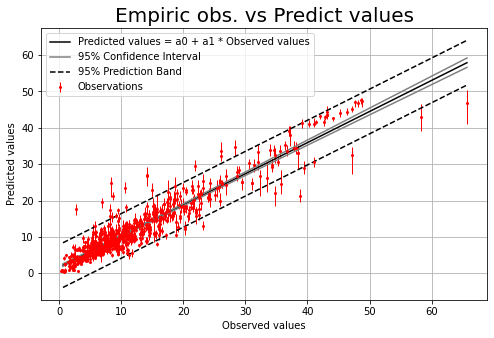

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(0.6, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: BA_sq_m_ha: mean - 2.953, median - 2.953, CI - [2.805-3.114]

SHAP-values for: DBH_cm: mean - 0.629, median - 0.621, CI - [0.526-0.722]

SHAP-values for: H_m: mean - 2.285, median - 2.293, CI - [2.08-2.512]

SHAP-values for: Origin_ID: mean - 0.135, median - 0.138, CI - [0.089-0.173]

SHAP-values for: Species_ID: mean - 4.573, median - 4.59, CI - [4.413-4.716]



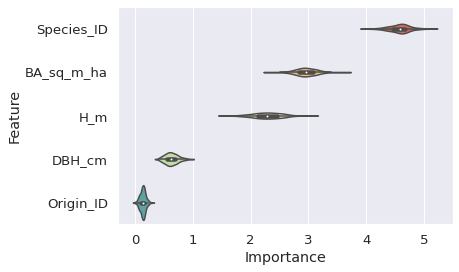

In [25]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['Species_ID', 'BA_sq_m_ha', 'H_m', 'DBH_cm', 'Origin_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [26]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)



In [27]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 54.14, median: 61.0,
 pred. interval (P(0.025)-P(0.975)): 15.975-75.0, 
 conf. interval (p-value=0.95): 33.074-72.794 
***
Aggregate bias statistic: 
 mean: -0.01, median: -0.016,
 pred. interval (P(0.025)-P(0.975)): -0.703-0.557, 
 conf. interval (p-value=0.95): -0.257-0.262 
***
Aggregate RMSE statistic: 
 mean: 3.401, median: 3.381, pred. interval (P(0.025)-P(0.975)): 2.774-4.192, 
 conf. interval (p-value=0.95): 3.076-3.733 
***
Aggregate MSE statistic: 
 mean: 11.729, median: 11.429, pred. interval (P(0.025)-P(0.975)): 7.696-17.569, 
 conf. interval (p-value=0.95): 9.47-13.953 
***
Aggregate R^2 statistic: 
 mean: 0.867, median: 0.873, pred. interval (P(0.025)-P(0.975)): 0.794-0.922, 
 conf. interval (p-value=0.95): 0.838-0.897 
***
Aggregate bias(%) statistic: 
 mean: -0.014, median: -0.131, pred. interval (P(0.025)-P(0.975)): -5.367-4.966, 
 conf. interval (p-value=0.95): -1.998-2.213 
***
Aggregate RMSE(%) statistic: 
 m

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'Distribution of predicted values')

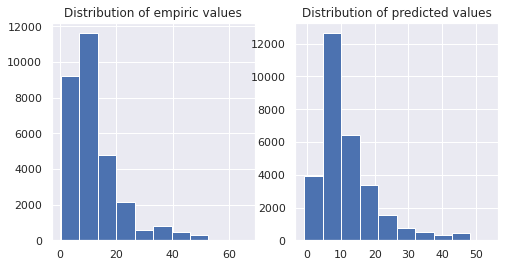

In [28]:
# Preprocessing

results_y['residuals'] = results_y[predictor] - results_y[0]

results_y['residuals_%'] =  results_y['residuals'] / results_y[predictor] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Distribution of empiric values')
axs[1].hist(results_y[0])
axs[1].set_title('Distribution of predicted values')
# plt.show() 

In [29]:
# INPORTANT  - added your intervals
intervals = pd.cut(results_y[predictor], [0, 10, 20, 30, 40, 50])

grouped = results_y.groupby(intervals)

max_obs_in_group = len(results_y)    
    
pre = pd.DataFrame()
pre_rel = pd.DataFrame()

pre = pre.assign(row_number=range(max_obs_in_group))
pre_rel = pre_rel.assign(row_number=range(max_obs_in_group))

for i in range(len(list(grouped))):
    pre[list(grouped)[i][0]] = pd.Series(list(grouped)[i][1]['residuals'])
    pre_rel[list(grouped)[i][0]] = pd.Series(list(grouped)[i][1]['residuals_%'])

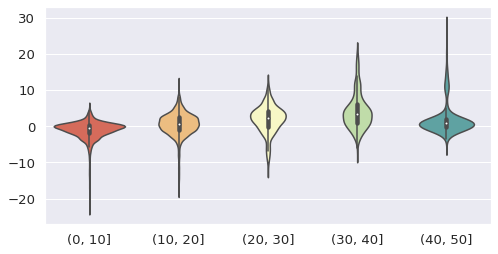

In [30]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre[list(pre.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

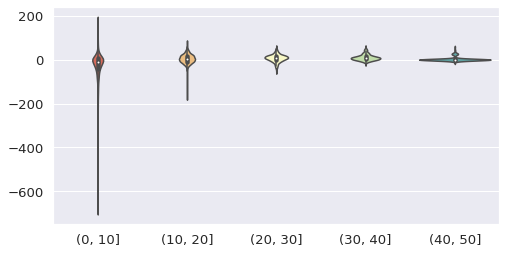

In [31]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel[(pre_rel.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [32]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [33]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [34]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:12.03166
[1]	validation_0-rmse:10.04039
[2]	validation_0-rmse:8.17338
[3]	validation_0-rmse:6.95438
[4]	validation_0-rmse:5.92730
[5]	validation_0-rmse:5.08137
[6]	validation_0-rmse:4.58025
[7]	validation_0-rmse:4.16023
[8]	validation_0-rmse:3.86307
[9]	validation_0-rmse:3.71766
[10]	validation_0-rmse:3.55090
[11]	validation_0-rmse:3.47380


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:3.39712
[13]	validation_0-rmse:3.28470
[14]	validation_0-rmse:3.25427
[15]	validation_0-rmse:3.17358
[16]	validation_0-rmse:3.08852
[17]	validation_0-rmse:3.05597
[18]	validation_0-rmse:3.03085
[19]	validation_0-rmse:2.99067
[20]	validation_0-rmse:2.96072
[21]	validation_0-rmse:2.93471
[22]	validation_0-rmse:2.91035
[23]	validation_0-rmse:2.88487
[24]	validation_0-rmse:2.83973
[25]	validation_0-rmse:2.81534
[26]	validation_0-rmse:2.77918
[27]	validation_0-rmse:2.75733
[28]	validation_0-rmse:2.74878
[29]	validation_0-rmse:2.72504
[30]	validation_0-rmse:2.71152
[31]	validation_0-rmse:2.69510
[32]	validation_0-rmse:2.66531
[33]	validation_0-rmse:2.61672
[34]	validation_0-rmse:2.59978
[35]	validation_0-rmse:2.58655
[36]	validation_0-rmse:2.55748
[37]	validation_0-rmse:2.54397
[38]	validation_0-rmse:2.53056
[39]	validation_0-rmse:2.50721
[40]	validation_0-rmse:2.48015
[41]	validation_0-rmse:2.43752
[42]	validation_0-rmse:2.42913
[43]	validation_0-rmse:2.42024
[44]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [35]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 75


In [36]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

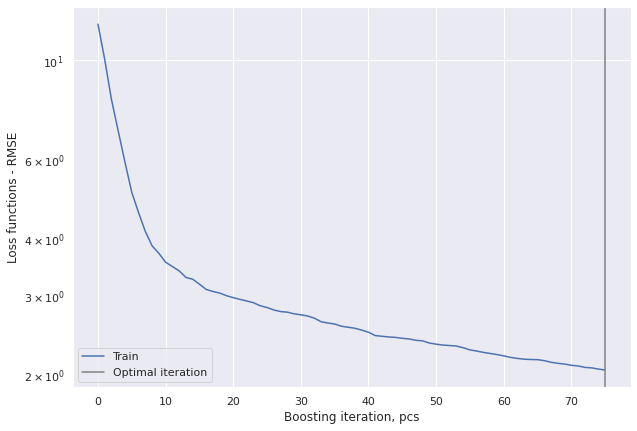

In [37]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [38]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.14
RMSE: 2.0
Relative RMSE(%):  16.944
MSE: 4.2
R square: 95.5%


In [39]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.955
Uncertainty
a0: 0.75+/-0.12
a1: 0.939+/-0.007


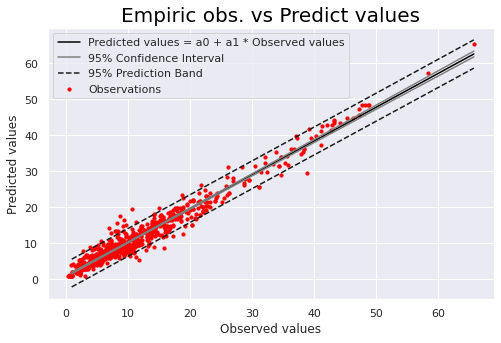

In [40]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0.9, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

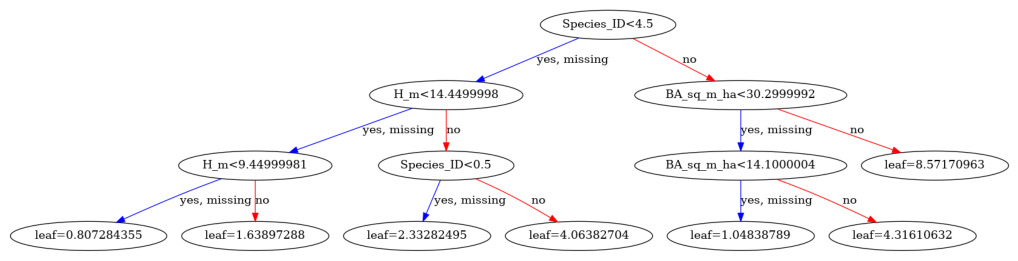

In [44]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [18, 45]
plt.show()

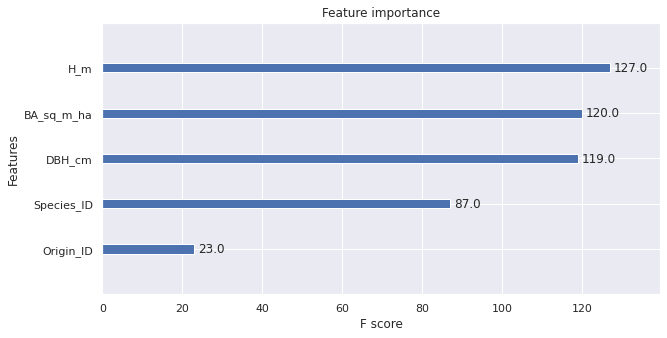

In [46]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

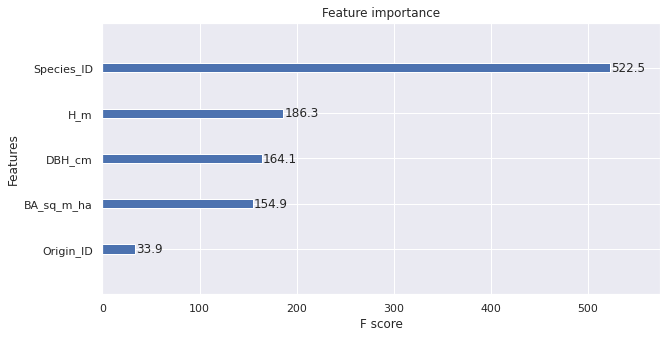

In [47]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

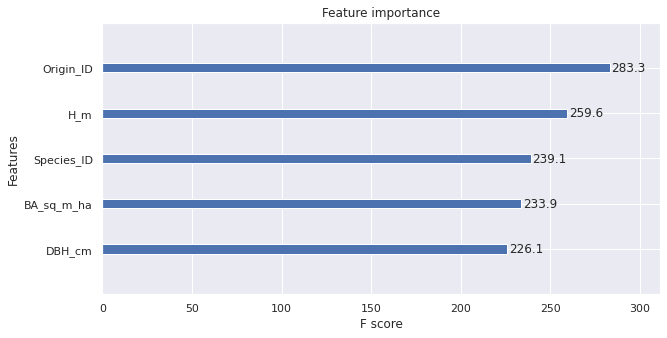

In [48]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [49]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


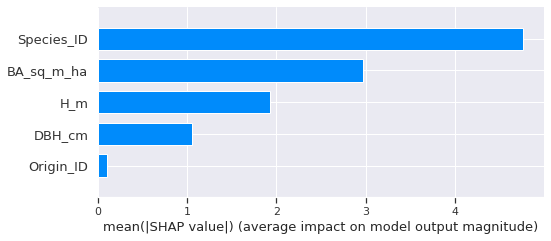

In [50]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

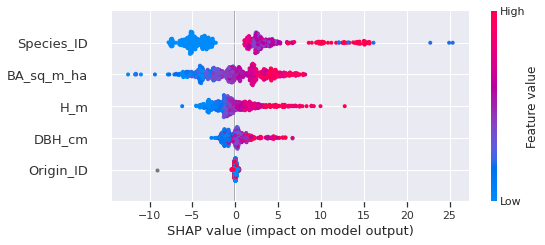

In [51]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

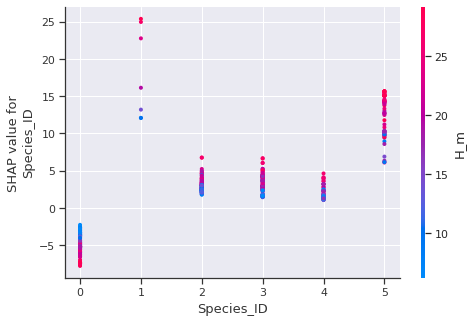

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


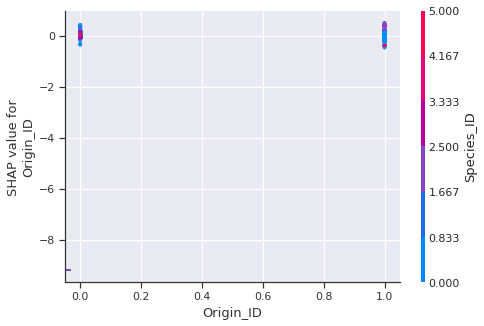

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


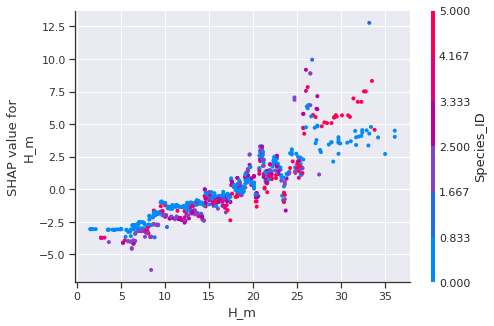

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


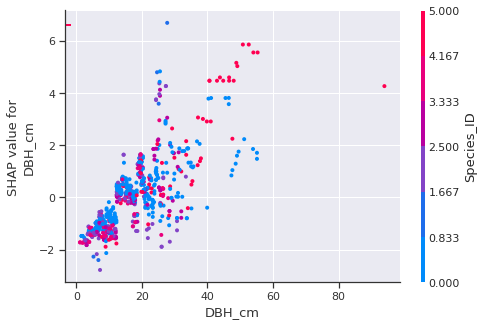

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


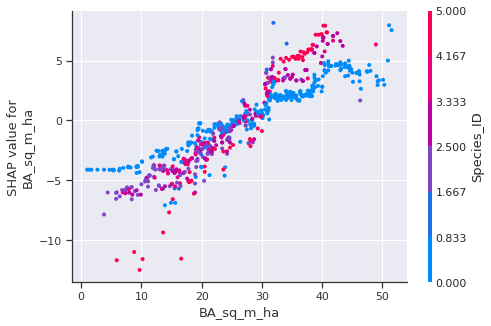

In [52]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [53]:
# Save to JSON
f_xgb_model.save_model("../01_output_data/XGBoost_models/03_M_stem_bark_other_authors_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../01_output_data/XGBoost_models/03_M_stem_bark_other_authors_XGB_model.txt")